In [43]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

from datetime import *

#changes displaying
sns.set_context("poster")

In [259]:
from scipy.stats import pearsonr

In [44]:
#BDR A321
filepath="C:/Users/to09267/Documents/AS2"

file_name='extraction_A321N_CFM_AS2_PC21-56B.xlsx - extraction_A321N_CFM_AS2.csv'


In [45]:
liste_na=['**********','f10.4']

In [46]:
#for python 3
dataset = pd.read_csv(os.path.join(filepath, file_name),sep=',',skiprows=0,header=(0),encoding = 'latin-1',na_values=liste_na)

In [47]:
#recuperation des types
datatype=dataset[:1]
print (datatype)

   AC_NB    AP ATHR BDR_COMMENTS BRAKE  BULLE_SPAT  CAT_ATT       CG  CGZ  \
0  M7877  DUAL   ON          NaN   NaN       21925      NaN  15.6694  NaN   

  COMMENTS  ... W_SPD      WGT WIND_DESCRIP WX_MEA_1_50 WY_MEA_1_50  XR_NWTCH  \
0      NaN  ...   2.0  79.0251          NaN      0.7132      2.2816  490.2981   

     XR_TCH YR_MAX_RO YR_NWTCH  YR_TCH  
0  298.7567    1.0463  -0.0143 -0.2431  

[1 rows x 169 columns]


In [48]:
#suppression des unités du dataset
#dataset = dataset.drop([0])

In [49]:
dataset.head()

AC_NB    AP ATHR BDR_COMMENTS BRAKE  BULLE_SPAT  CAT_ATT       CG  CGZ  \
0  M7877  DUAL   ON          NaN   NaN       21925      NaN  15.6694  NaN   
1  M7877  DUAL   ON          NaN   NaN       20925      NaN  16.0916  NaN   
2  M7877  DUAL   ON          NaN   LOW       21925      NaN  16.1635  NaN   
3  M7877     0  OFF          NaN   PIL           0      NaN  15.7095  NaN   
4  M7877  DUAL   ON          NaN   NaN       21925      NaN  15.5067  NaN   

    COMMENTS  ... W_SPD      WGT WIND_DESCRIP WX_MEA_1_50 WY_MEA_1_50  \
0        NaN  ...   2.0  79.0251          NaN      0.7132      2.2816   
1        NaN  ...   2.0  78.3428          NaN      2.4512      3.9962   
2   Max REV.  ...   2.0  77.7414          NaN      3.9272      2.9747   
3  Idle REV.  ...   5.0  76.7235          NaN      3.1820      7.1491   
4        NaN  ...   5.0  75.9020          NaN      5.8799      9.1898   

   XR_NWTCH    XR_TCH YR_MAX_RO YR_NWTCH  YR_TCH  
0  490.2981  298.7567    1.0463  -0.0143 -0.2431  
1  596.4141  413.4885   -1.9487  -1.9454 -1.5899  
2  587.5341  416.1575   -1.8169  -1.5930 -1.8169  
3  533.9414  371.5349       NaN  -0.0071  0.8773  
4  520.0513  318.0291   -3.6806  -3.6806 -2.6838  

[5 rows x 169 columns]

In [50]:
# pourrait être utilisés pour compléter le dataset avec les runs de certif et/ou les ADIS
#dataruns = pd.read_csv(os.path.join(filepath, "list_of_runs.csv"),sep=',',skiprows=0,header=(0),encoding = 'latin-1',na_values=liste_na)

In [51]:
#dataruns.head()

In [52]:
liste = list(dataset)

for data in liste:
    typ=type (dataset[data][1])
    print (data,typ)  

AC_NB <class 'str'>
AP <class 'str'>
ATHR <class 'str'>
BDR_COMMENTS <class 'float'>
BRAKE <class 'float'>
BULLE_SPAT <class 'numpy.int64'>
CAT_ATT <class 'numpy.float64'>
CG <class 'numpy.float64'>
CGZ <class 'numpy.float64'>
COMMENTS <class 'float'>
CONF <class 'str'>
CONF_LOCSTAR <class 'str'>
CREW <class 'str'>
CTF <class 'str'>
DATE_ESSAI <class 'str'>
DATE_EXPLOIT <class 'str'>
DED_H_GA <class 'numpy.float64'>
DED_WGT_CG <class 'str'>
DED_WIND <class 'str'>
DENSITY_ALT <class 'numpy.float64'>
DH_GA <class 'numpy.float64'>
DIST_LOCSTAR <class 'numpy.float64'>
DPSI_ALIG <class 'numpy.float64'>
DPSI_TCH <class 'numpy.float64'>
DT_50_TCH <class 'numpy.float64'>
DT_ABAT <class 'numpy.float64'>
DT_FLARE <class 'numpy.float64'>
DTRK_LOCSTAR <class 'numpy.float64'>
DVC_100 <class 'numpy.float64'>
DVC_200 <class 'numpy.float64'>
DVC_300 <class 'numpy.float64'>
DVC_400 <class 'numpy.float64'>
DVC_50 <class 'numpy.float64'>
DVC_500 <class 'numpy.float64'>
DVC_MAX_5_50 <class 'numpy.float64'

In [53]:
liste = list(dataset)
print (liste)

['AC_NB', 'AP', 'ATHR', 'BDR_COMMENTS', 'BRAKE', 'BULLE_SPAT', 'CAT_ATT', 'CG', 'CGZ', 'COMMENTS', 'CONF', 'CONF_LOCSTAR', 'CREW', 'CTF', 'DATE_ESSAI', 'DATE_EXPLOIT', 'DED_H_GA', 'DED_WGT_CG', 'DED_WIND', 'DENSITY_ALT', 'DH_GA', 'DIST_LOCSTAR', 'DPSI_ALIG', 'DPSI_TCH', 'DT_50_TCH', 'DT_ABAT', 'DT_FLARE', 'DTRK_LOCSTAR', 'DVC_100', 'DVC_200', 'DVC_300', 'DVC_400', 'DVC_50', 'DVC_500', 'DVC_MAX_5_50', 'DVC_MEA_5_50', 'DVC_MIN_5_50', 'DVC_TCH', 'DVC_X0', 'DVC_X60', 'ENG', 'ENG_CND', 'ETAT_SPAT', 'EXP_NB', 'FLT', 'GMT_REF', 'GS_100', 'GS_200', 'GS_300', 'GS_400', 'GS_500', 'GS_MAX_2_1', 'GS_MAX_3_1', 'GS_MAX_3_2', 'GS_MAX_5_1', 'GSPD_AP_OFF', 'GSPD_LOCSTAR', 'GSPD_NWTCH', 'GSPD_TCH', 'GSPD_YR_MAX', 'H_FLARE', 'H_GA', 'H_MIN_GA', 'HRA_FLARE', 'HRA_GA', 'HRA_X0', 'HRA_X60', 'LOC_100', 'LOC_200', 'LOC_300', 'LOC_400', 'LOC_50', 'LOC_500', 'LOC_MAX_1_T', 'LOC_MAX_2_1', 'LOC_MAX_3_1', 'LOC_MAX_3_15', 'LOC_MAX_3_2', 'LOC_MAX_3_50', 'LOC_MAX_3_T', 'LOC_MAX_5_15', 'LOC_NWTCH', 'LOC_TCH', 'LOC_X0'

In [54]:
def parse_maybe_int(serie):
    result=[]
    for i in serie:
        if np.isnan(i)or i>90000:
            i=None
        else:
            i=int(i)
        result.append(i)
    return result
    
def parse_maybe_float(x):
    if x == '':
        return None
    else:
        return float(x)
    
def parse_range_float(serie):
    result=[]
    for x in serie:
        if x < -9000 or x > 9000 or np.isnan(x):
            y=None
        else:
            y=float(x)
#        print x,y        
        result.append(y)
    return result

def parse_force_float(x):
        return float(x)

In [55]:
#forçage des types
liste = list(dataset)

for data in liste:
    typ=type (dataset[data][1])
    typ_bdr=datatype.loc[0,data]
    typ_bdr=datatype.loc[0,data]
    print (data,typ,typ_bdr)

    
    if typ==np.int64:
        dataset[data]=parse_maybe_int(dataset[data])
    if typ==np.float64:
        dataset[data]=parse_range_float(dataset[data])
        
    if ((typ_bdr=="f10.4") and (typ=='str')):
#        dataset[data]=parse_force_float(dataset[data])
#         dataset[data]=dataset[data].astype(float)
        dataset[data]=pd.to_numeric(dataset[data], errors='coerce')
        
#    if ((typ=='str')):
        dataset[data]=parse_range_float(dataset[data])

AC_NB <class 'str'> M7877
AP <class 'str'> DUAL
ATHR <class 'str'> ON
BDR_COMMENTS <class 'float'> nan
BRAKE <class 'float'> nan
BULLE_SPAT <class 'numpy.int64'> 21925
CAT_ATT <class 'numpy.float64'> nan
CG <class 'numpy.float64'> 15.6694
CGZ <class 'numpy.float64'> nan
COMMENTS <class 'float'> nan
CONF <class 'str'> FULL
CONF_LOCSTAR <class 'str'> LISSE
CREW <class 'str'> AI
CTF <class 'str'> D
DATE_ESSAI <class 'str'> 26/06/2023
DATE_EXPLOIT <class 'str'> 29/06/23 14:59
DED_H_GA <class 'numpy.float64'> nan
DED_WGT_CG <class 'str'> HVY/FWD
DED_WIND <class 'str'> -
DENSITY_ALT <class 'numpy.float64'> nan
DH_GA <class 'numpy.float64'> nan
DIST_LOCSTAR <class 'numpy.float64'> 13.604
DPSI_ALIG <class 'numpy.float64'> 0.9558
DPSI_TCH <class 'numpy.float64'> 0.8373
DT_50_TCH <class 'numpy.float64'> 4.75
DT_ABAT <class 'numpy.float64'> 2.125
DT_FLARE <class 'numpy.float64'> 4.75
DTRK_LOCSTAR <class 'numpy.float64'> 49.157
DVC_100 <class 'numpy.float64'> 1.5253
DVC_200 <class 'numpy.float64'>

In [56]:
liste = list(dataset)

for data in liste:
    typ=type (dataset[data][1])
    print (data,typ) 

AC_NB <class 'str'>
AP <class 'str'>
ATHR <class 'str'>
BDR_COMMENTS <class 'float'>
BRAKE <class 'float'>
BULLE_SPAT <class 'numpy.int64'>
CAT_ATT <class 'NoneType'>
CG <class 'numpy.float64'>
CGZ <class 'NoneType'>
COMMENTS <class 'float'>
CONF <class 'str'>
CONF_LOCSTAR <class 'str'>
CREW <class 'str'>
CTF <class 'str'>
DATE_ESSAI <class 'str'>
DATE_EXPLOIT <class 'str'>
DED_H_GA <class 'NoneType'>
DED_WGT_CG <class 'str'>
DED_WIND <class 'str'>
DENSITY_ALT <class 'numpy.float64'>
DH_GA <class 'numpy.float64'>
DIST_LOCSTAR <class 'numpy.float64'>
DPSI_ALIG <class 'numpy.float64'>
DPSI_TCH <class 'numpy.float64'>
DT_50_TCH <class 'numpy.float64'>
DT_ABAT <class 'numpy.float64'>
DT_FLARE <class 'numpy.float64'>
DTRK_LOCSTAR <class 'numpy.float64'>
DVC_100 <class 'numpy.float64'>
DVC_200 <class 'numpy.float64'>
DVC_300 <class 'numpy.float64'>
DVC_400 <class 'numpy.float64'>
DVC_50 <class 'numpy.float64'>
DVC_500 <class 'numpy.float64'>
DVC_MAX_5_50 <class 'numpy.float64'>
DVC_MEA_5_50 

In [57]:
print (dataset['GMT_REF'])

0       5:40:13
1       5:54:11
2       6:06:30
3       6:30:18
4       6:58:01
         ...   
194    14:05:53
195    14:19:06
196    14:36:18
197    14:49:16
198    15:52:11
Name: GMT_REF, Length: 199, dtype: object


In [111]:
dataset['TEST_NB']=dataset['TEST_NB'].astype(str)
dataset['ETAT_SPAT']=dataset['ETAT_SPAT'].astype(str)

In [112]:
dataset.head()

AC_NB    AP ATHR BDR_COMMENTS BRAKE  BULLE_SPAT CAT_ATT       CG   CGZ  \
0  M7877  DUAL   ON          NaN   NaN       21925    None  15.6694  None   
1  M7877  DUAL   ON          NaN   NaN       20925    None  16.0916  None   
2  M7877  DUAL   ON          NaN   LOW       21925    None  16.1635  None   
3  M7877     0  OFF          NaN   PIL           0    None  15.7095  None   
4  M7877  DUAL   ON          NaN   NaN       21925    None  15.5067  None   

    COMMENTS  ... WY_MEA_1_50  XR_NWTCH    XR_TCH YR_MAX_RO YR_NWTCH  YR_TCH  \
0        NaN  ...      2.2816  490.2981  298.7567    1.0463  -0.0143 -0.2431   
1        NaN  ...      3.9962  596.4141  413.4885   -1.9487  -1.9454 -1.5899   
2   Max REV.  ...      2.9747  587.5341  416.1575   -1.8169  -1.5930 -1.8169   
3  Idle REV.  ...      7.1491  533.9414  371.5349       NaN  -0.0071  0.8773   
4        NaN  ...      9.1898  520.0513  318.0291   -3.6806  -3.6806 -2.6838   

             key WGT_DIS CG_DIS  WGTCG_DIS  
0  M7877_V0165_1     MED    FWD    HVY/MED  
1  M7877_V0165_2     MED    MID    HVY/MED  
2  M7877_V0165_3     MED    MID    HVY/MED  
3  M7877_V0165_4     MED    FWD    HVY/MED  
4  M7877_V0165_5     MED    FWD    HVY/MED  

[5 rows x 173 columns]

In [113]:
def DED_CG(x):
    ded_cg="MID"
    if x <= 16:
        ded_cg="FWD"
    else:
        if x>=30:
            ded_cg="AFT"
    return ded_cg        

In [114]:
def DED_WGT(x):
    ded_wgt="MED"
    if x <= 70:
        ded_wgt="LGT"
    else:
        if x>=80:
            ded_cg="HVY"
    return ded_wgt  

In [115]:
def DED_WGTCG(x,y):
    ded_wgtcg="MED/MED"
    if x <= 70:
        if y<=16:
            ded_wgtcg="LGT/FWD"
        else:
            if y>30:
                ded_wgtcg="LGT/AFT"
            else:
                ded_wgtcg="LGT/MED"
    
    else:
        if x>=80:
            if y<=16:
                ded_wgtcg="HVY/FWD"
        else:
            if y>30:
                ded_wgtcg="HVY/AFT"
            else:
                ded_wgtcg="HVY/MED"
        
    return ded_wgtcg 

In [116]:
def kiss_landing (vztch):
    vznorm=vztch
    if vztch > 0:
        vznorm=0
    return vznorm

In [117]:
def key(ac,flt,test_nb):
    key=ac+"_"+flt+"_"+str(test_nb)
    return key

In [118]:
dataset[["key"]]=dataset.apply(lambda row: pd.Series(key(row["AC_NB"],row["FLT"],row["TEST_NB"])),axis=1)

In [119]:
dataset[["VZTCH"]]=dataset.apply(lambda row: pd.Series(kiss_landing(row["VZTCH"])),axis=1)

In [120]:
dataset.head()

AC_NB    AP ATHR BDR_COMMENTS BRAKE  BULLE_SPAT CAT_ATT       CG   CGZ  \
0  M7877  DUAL   ON          NaN   NaN       21925    None  15.6694  None   
1  M7877  DUAL   ON          NaN   NaN       20925    None  16.0916  None   
2  M7877  DUAL   ON          NaN   LOW       21925    None  16.1635  None   
3  M7877     0  OFF          NaN   PIL           0    None  15.7095  None   
4  M7877  DUAL   ON          NaN   NaN       21925    None  15.5067  None   

    COMMENTS  ... WY_MEA_1_50  XR_NWTCH    XR_TCH YR_MAX_RO YR_NWTCH  YR_TCH  \
0        NaN  ...      2.2816  490.2981  298.7567    1.0463  -0.0143 -0.2431   
1        NaN  ...      3.9962  596.4141  413.4885   -1.9487  -1.9454 -1.5899   
2   Max REV.  ...      2.9747  587.5341  416.1575   -1.8169  -1.5930 -1.8169   
3  Idle REV.  ...      7.1491  533.9414  371.5349       NaN  -0.0071  0.8773   
4        NaN  ...      9.1898  520.0513  318.0291   -3.6806  -3.6806 -2.6838   

             key WGT_DIS CG_DIS  WGTCG_DIS  
0  M7877_V0165_1     MED    FWD    HVY/MED  
1  M7877_V0165_2     MED    MID    HVY/MED  
2  M7877_V0165_3     MED    MID    HVY/MED  
3  M7877_V0165_4     MED    FWD    HVY/MED  
4  M7877_V0165_5     MED    FWD    HVY/MED  

[5 rows x 173 columns]

In [121]:
dataset[['WGT_DIS']]=dataset.apply(lambda row: pd.Series(DED_WGT(row["WGT"])),axis=1)


In [122]:
dataset[['CG_DIS']]=dataset.apply(lambda row: pd.Series(DED_CG(row["CG"])),axis=1)

In [123]:
dataset[['WGTCG_DIS']]=dataset.apply(lambda row: pd.Series(DED_WGTCG(row["WGT"],row["CG"])),axis=1)

In [124]:
dataset.head()

AC_NB    AP ATHR BDR_COMMENTS BRAKE  BULLE_SPAT CAT_ATT       CG   CGZ  \
0  M7877  DUAL   ON          NaN   NaN       21925    None  15.6694  None   
1  M7877  DUAL   ON          NaN   NaN       20925    None  16.0916  None   
2  M7877  DUAL   ON          NaN   LOW       21925    None  16.1635  None   
3  M7877     0  OFF          NaN   PIL           0    None  15.7095  None   
4  M7877  DUAL   ON          NaN   NaN       21925    None  15.5067  None   

    COMMENTS  ... WY_MEA_1_50  XR_NWTCH    XR_TCH YR_MAX_RO YR_NWTCH  YR_TCH  \
0        NaN  ...      2.2816  490.2981  298.7567    1.0463  -0.0143 -0.2431   
1        NaN  ...      3.9962  596.4141  413.4885   -1.9487  -1.9454 -1.5899   
2   Max REV.  ...      2.9747  587.5341  416.1575   -1.8169  -1.5930 -1.8169   
3  Idle REV.  ...      7.1491  533.9414  371.5349       NaN  -0.0071  0.8773   
4        NaN  ...      9.1898  520.0513  318.0291   -3.6806  -3.6806 -2.6838   

             key WGT_DIS CG_DIS  WGTCG_DIS  
0  M7877_V0165_1     MED    FWD    HVY/MED  
1  M7877_V0165_2     MED    MID    HVY/MED  
2  M7877_V0165_3     MED    MID    HVY/MED  
3  M7877_V0165_4     MED    FWD    HVY/MED  
4  M7877_V0165_5     MED    FWD    HVY/MED  

[5 rows x 173 columns]

In [125]:
result_wind_axis = dataset.groupby('WGTCG_DIS').agg({'WX_MEA_1_50': ['min', 'max']}) 
print (result_wind_axis)
result_wind_lat = dataset.groupby('WGTCG_DIS').agg({'WY_MEA_1_50': ['min', 'max']}) 
print (result_wind_lat)

          WX_MEA_1_50         
                  min      max
WGTCG_DIS                     
HVY/AFT       -1.9965   3.7322
HVY/MED      -24.5856  16.2116
LGT/AFT      -23.8215  15.4349
LGT/FWD       -8.4157   6.0314
LGT/MED      -19.1839   2.4706
          WY_MEA_1_50         
                  min      max
WGTCG_DIS                     
HVY/AFT       -8.6589   1.5368
HVY/MED      -17.8195  12.8592
LGT/AFT      -18.4239   3.5932
LGT/FWD       -5.2461  -1.0934
LGT/MED      -18.9073   2.8879


In [126]:
print (dataset["FLT"].unique())

['V0165' 'V0169' 'V0171' 'V0172' 'V0175' 'V0176' 'V0178' 'V0179' 'V0180'
 'V0181' 'V0183' 'V0185' 'V0186' 'V0189' 'V0190']


In [127]:
#selection des données pertinentes pour l'analyse
list_of_flights=['V0165', 'V0169', 'V0171', 'V0172', 'V0175', 'V0176', 'V0178', 'V0179', 'V0180',
 'V0181', 'V0183' ,'V0185', 'V0186', 'V0189', 'V0190', 'V0202', 'V0203', 'V0204',
 'V0205', 'V0206', 'V0207', 'V0208', 'V0209', 'V0210', 'V0211']

In [128]:
dataset=dataset[((dataset.TEST=='LDG')| (dataset.TEST=='RO'))&(dataset.FLT.isin(list_of_flights)&(dataset.AC_NB=="M7877"))]

In [129]:
dataset.describe()

BULLE_SPAT          CG  DENSITY_ALT  DH_GA  DIST_LOCSTAR   DPSI_ALIG  \
count    126.000000  126.000000    50.000000    0.0    124.000000  125.000000   
mean   21737.857143   24.756351  1572.441388    NaN     11.272260   -0.664172   
std     1956.106164   10.977268   623.154127    NaN      3.151123    2.934413   
min        0.000000   12.017400   369.184300    NaN      5.792900   -9.847000   
25%    21928.000000   15.452200  1207.311150    NaN      9.023450   -2.212900   
50%    21928.000000   16.154550  1517.639500    NaN     11.267500   -0.087900   
75%    21928.000000   37.655825  2004.964025    NaN     12.990175    1.203000   
max    21929.000000   41.851200  3062.261200    NaN     22.279100    6.069900   

         DPSI_TCH   DT_50_TCH     DT_ABAT    DT_FLARE  ...       W_LAT  \
count  126.000000  126.000000  125.000000  125.000000  ...  126.000000   
mean    -0.291680    5.852183    2.203000    5.684000  ...   -3.511111   
std      1.510412    1.122096    0.518961    1.140195  ...    7.970578   
min     -5.098000    3.875000    1.000000    3.750000  ...  -23.100000   
25%     -1.308600    5.000000    1.875000    4.875000  ...   -5.800000   
50%     -0.294850    5.625000    2.125000    5.500000  ...   -2.500000   
75%      0.532125    6.718750    2.500000    6.500000  ...    0.850000   
max      3.681000    8.500000    3.375000    8.375000  ...   13.000000   

            W_SPD         WGT  WX_MEA_1_50  WY_MEA_1_50    XR_NWTCH  \
count  126.000000  126.000000   126.000000   126.000000  126.000000   
mean     9.555556   70.375357    -3.381715    -3.039040  543.327645   
std      6.895280    7.049918     9.195687     7.112067   64.048227   
min      0.000000   56.484200   -24.585600   -18.907300  428.124800   
25%      4.000000   63.625350    -9.876625    -6.090050  502.888375   
50%      7.000000   71.340950    -0.595550    -1.791850  536.090200   
75%     15.000000   77.040650     1.783450     1.502075  570.729550   
max     25.000000   79.997000    16.211600    12.859200  816.503900   

           XR_TCH   YR_MAX_RO    YR_NWTCH      YR_TCH  
count  126.000000  125.000000  126.000000  126.000000  
mean   361.331440    0.681982    0.388253    0.321598  
std     76.115971    2.345027    1.869716    1.489720  
min    202.496900   -5.224800   -5.215800   -4.549200  
25%    308.781250   -1.632700   -0.856875   -0.372500  
50%    344.370950    1.387200    0.469750    0.258900  
75%    414.376125    2.143800    1.353550    1.231475  
max    634.233900    6.169600    6.120700    5.428500  

[8 rows x 129 columns]

In [130]:
print (dataset['GMT_REF'])

0      5:40:13
1      5:54:11
2      6:06:30
3      6:30:18
4      6:58:01
        ...   
126    6:00:53
127    6:16:50
128    6:30:13
129    6:43:58
133    8:03:54
Name: GMT_REF, Length: 126, dtype: object


In [131]:
#to verify if data have been properly cleaned no more 99999
dataset.describe()


BULLE_SPAT          CG  DENSITY_ALT  DH_GA  DIST_LOCSTAR   DPSI_ALIG  \
count    126.000000  126.000000    50.000000    0.0    124.000000  125.000000   
mean   21737.857143   24.756351  1572.441388    NaN     11.272260   -0.664172   
std     1956.106164   10.977268   623.154127    NaN      3.151123    2.934413   
min        0.000000   12.017400   369.184300    NaN      5.792900   -9.847000   
25%    21928.000000   15.452200  1207.311150    NaN      9.023450   -2.212900   
50%    21928.000000   16.154550  1517.639500    NaN     11.267500   -0.087900   
75%    21928.000000   37.655825  2004.964025    NaN     12.990175    1.203000   
max    21929.000000   41.851200  3062.261200    NaN     22.279100    6.069900   

         DPSI_TCH   DT_50_TCH     DT_ABAT    DT_FLARE  ...       W_LAT  \
count  126.000000  126.000000  125.000000  125.000000  ...  126.000000   
mean    -0.291680    5.852183    2.203000    5.684000  ...   -3.511111   
std      1.510412    1.122096    0.518961    1.140195  ...    7.970578   
min     -5.098000    3.875000    1.000000    3.750000  ...  -23.100000   
25%     -1.308600    5.000000    1.875000    4.875000  ...   -5.800000   
50%     -0.294850    5.625000    2.125000    5.500000  ...   -2.500000   
75%      0.532125    6.718750    2.500000    6.500000  ...    0.850000   
max      3.681000    8.500000    3.375000    8.375000  ...   13.000000   

            W_SPD         WGT  WX_MEA_1_50  WY_MEA_1_50    XR_NWTCH  \
count  126.000000  126.000000   126.000000   126.000000  126.000000   
mean     9.555556   70.375357    -3.381715    -3.039040  543.327645   
std      6.895280    7.049918     9.195687     7.112067   64.048227   
min      0.000000   56.484200   -24.585600   -18.907300  428.124800   
25%      4.000000   63.625350    -9.876625    -6.090050  502.888375   
50%      7.000000   71.340950    -0.595550    -1.791850  536.090200   
75%     15.000000   77.040650     1.783450     1.502075  570.729550   
max     25.000000   79.997000    16.211600    12.859200  816.503900   

           XR_TCH   YR_MAX_RO    YR_NWTCH      YR_TCH  
count  126.000000  125.000000  126.000000  126.000000  
mean   361.331440    0.681982    0.388253    0.321598  
std     76.115971    2.345027    1.869716    1.489720  
min    202.496900   -5.224800   -5.215800   -4.549200  
25%    308.781250   -1.632700   -0.856875   -0.372500  
50%    344.370950    1.387200    0.469750    0.258900  
75%    414.376125    2.143800    1.353550    1.231475  
max    634.233900    6.169600    6.120700    5.428500  

[8 rows x 129 columns]

In [132]:
print (dataset["ETAT_SPAT"].unique())

['0' '36942' '34950' '36672' '34911' '34903' '34881' '36903' '36998'
 '36997' '34904']


Wind & wgt/CG conditions


In [133]:
result_wind_axis = dataset.groupby('WGTCG_DIS').agg({'WX_MEA_1_50': ['min', 'max','count']}) 
print (result_wind_axis)
result_wind_lat = dataset.groupby('WGTCG_DIS').agg({'WY_MEA_1_50': ['min', 'max','count']}) 
print (result_wind_lat)

          WX_MEA_1_50               
                  min      max count
WGTCG_DIS                           
HVY/AFT       -1.9965   3.7322    10
HVY/MED      -24.5856  16.2116    56
LGT/AFT      -23.8215  15.4349    33
LGT/FWD       -8.4157   6.0314     9
LGT/MED      -19.1839   2.4706    18
          WY_MEA_1_50               
                  min      max count
WGTCG_DIS                           
HVY/AFT       -8.6589   1.5368    10
HVY/MED      -17.8195  12.8592    56
LGT/AFT      -18.4239   3.5932    33
LGT/FWD       -5.2461  -1.0934     9
LGT/MED      -18.9073   2.8879    18


In [134]:
liste_totale=['AC_NB', 'AP', 'ATHR', 'BDR_COMMENTS', 'BRAKE', 'BULLE_SPAT', 'CAT_ATT', 'CG', 'CGZ', 'COMMENTS', 'CONF', 'CONF_LOCSTAR', 'CREW', 'CTF', 'DATE_ESSAI', 'DATE_EXPLOIT', 'DED_H_GA', 'DED_WGT_CG', 'DED_WIND', 'DENSITY_ALT', 'DH_GA', 'DIST_LOCSTAR', 'DPSI_ALIG', 'DPSI_TCH', 'DT_50_TCH', 'DT_ABAT', 'DT_FLARE', 'DTRK_LOCSTAR', 'DVC_100', 'DVC_200', 'DVC_300', 'DVC_400', 'DVC_50', 'DVC_500', 'DVC_MAX_5_50', 'DVC_MEA_5_50', 'DVC_MIN_5_50', 'DVC_TCH', 'DVC_X0', 'DVC_X60', 'ENG', 'ENG_CND', 'ETAT_SPAT', 'EXP_NB', 'FLT', 'GMT_REF', 'GS_100', 'GS_200', 'GS_300', 'GS_400', 'GS_500', 'GS_MAX_2_1', 'GS_MAX_3_1', 'GS_MAX_3_2', 'GS_MAX_5_1', 'GSPD_AP_OFF', 'GSPD_LOCSTAR', 'GSPD_NWTCH', 'GSPD_TCH', 'GSPD_YR_MAX', 'H_FLARE', 'H_GA', 'H_MIN_GA', 'HRA_FLARE', 'HRA_GA', 'HRA_X0', 'HRA_X60', 'LOC_100', 'LOC_200', 'LOC_300', 'LOC_400', 'LOC_50', 'LOC_500', 'LOC_MAX_1_T', 'LOC_MAX_2_1', 'LOC_MAX_3_1', 'LOC_MAX_3_15', 'LOC_MAX_3_2', 'LOC_MAX_3_50', 'LOC_MAX_3_T', 'LOC_MAX_5_15', 'LOC_NWTCH', 'LOC_TCH', 'LOC_X0', 'LOC_X60', 'MMR_MODE', 'NZB_DEROT_AV', 'NZB_TCH_TP', 'OVER_LOCSTAR', 'PHI_MAX_ALIG', 'PHI_MIN_ALIG', 'PHI_TCH', 'PS0', 'QMAX_DEROT', 'QMIN_DEROT', 'REF_FICHIER', 'REV', 'RWY', 'RWY_CND', 'SPARE1', 'SPARE2', 'SPARE3', 'SPD_SEL_MAN', 'STD_ELAC1', 'STD_ELAC2', 'STD_FCU', 'STD_FMGCE1', 'STD_FMGCE2', 'TEST', 'TEST_NB', 'TEST_VAL', 'TETA_10', 'TETA_100', 'TETA_15', 'TETA_20', 'TETA_200', 'TETA_25', 'TETA_30', 'TETA_35', 'TETA_40', 'TETA_45', 'TETA_5', 'TETA_50', 'TETA_60', 'TETA_70', 'TETA_80', 'TETA_90', 'TETA_TCH', 'TETA_X0', 'TETA_X60', 'TS0', 'VSEL', 'VX_TCH', 'VY_NWTCH', 'VY_TCH', 'VZTCH', 'VZTJ_10', 'VZTJ_100', 'VZTJ_15', 'VZTJ_20', 'VZTJ_200', 'VZTJ_25', 'VZTJ_30', 'VZTJ_35', 'VZTJ_40', 'VZTJ_45', 'VZTJ_5', 'VZTJ_50', 'VZTJ_60', 'VZTJ_70', 'VZTJ_80', 'VZTJ_90', 'VZTJ_TCH', 'VZTJ_X0', 'VZTJ_X60', 'W_AXIS', 'W_GUST', 'W_HDG', 'W_LAT', 'W_SPD', 'WGT', 'WIND_DESCRIP', 'WX_MEA_1_50', 'WY_MEA_1_50', 'XR_NWTCH', 'XR_TCH', 'YR_MAX_RO', 'YR_NWTCH', 'YR_TCH','key']
print (liste_totale)

['AC_NB', 'AP', 'ATHR', 'BDR_COMMENTS', 'BRAKE', 'BULLE_SPAT', 'CAT_ATT', 'CG', 'CGZ', 'COMMENTS', 'CONF', 'CONF_LOCSTAR', 'CREW', 'CTF', 'DATE_ESSAI', 'DATE_EXPLOIT', 'DED_H_GA', 'DED_WGT_CG', 'DED_WIND', 'DENSITY_ALT', 'DH_GA', 'DIST_LOCSTAR', 'DPSI_ALIG', 'DPSI_TCH', 'DT_50_TCH', 'DT_ABAT', 'DT_FLARE', 'DTRK_LOCSTAR', 'DVC_100', 'DVC_200', 'DVC_300', 'DVC_400', 'DVC_50', 'DVC_500', 'DVC_MAX_5_50', 'DVC_MEA_5_50', 'DVC_MIN_5_50', 'DVC_TCH', 'DVC_X0', 'DVC_X60', 'ENG', 'ENG_CND', 'ETAT_SPAT', 'EXP_NB', 'FLT', 'GMT_REF', 'GS_100', 'GS_200', 'GS_300', 'GS_400', 'GS_500', 'GS_MAX_2_1', 'GS_MAX_3_1', 'GS_MAX_3_2', 'GS_MAX_5_1', 'GSPD_AP_OFF', 'GSPD_LOCSTAR', 'GSPD_NWTCH', 'GSPD_TCH', 'GSPD_YR_MAX', 'H_FLARE', 'H_GA', 'H_MIN_GA', 'HRA_FLARE', 'HRA_GA', 'HRA_X0', 'HRA_X60', 'LOC_100', 'LOC_200', 'LOC_300', 'LOC_400', 'LOC_50', 'LOC_500', 'LOC_MAX_1_T', 'LOC_MAX_2_1', 'LOC_MAX_3_1', 'LOC_MAX_3_15', 'LOC_MAX_3_2', 'LOC_MAX_3_50', 'LOC_MAX_3_T', 'LOC_MAX_5_15', 'LOC_NWTCH', 'LOC_TCH', 'LOC_X0'

In [135]:
liste_guidance_perfo=['AC_NB','FLT','TEST_NB','TEST','RWY','CAT_ATT','W_HDG','W_SPD','W_GUST','WGT','CG','AP', 'ATHR','VSEL','SPD_SEL_MAN','ENG_CND','DVC_MIN_5_50','DVC_MEA_5_50','DVC_MAX_5_50','LOC_MAX_3_15','GS_MAX_3_1','CREW','COMMENTS','key']

In [136]:
dataset_guidance_perfo=dataset[liste_guidance_perfo]

In [137]:
s = dataset_guidance_perfo.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props": [("background-color", "grey"), ("color", "white"),
                                          ("border", "3px solid black"),
                                          ("font-size", "6pt"), ("font-style", "italic")]
                            },
                            {
                                'selector': 'th', 
                                'props': [("border", "3px solid black")]
                            },
                            {
                                "selector":"th.row_heading",
                                "props": [("background-color", "white"), ("color", "BLACK"),
                                          ("border", "2px solid black"),
                                          ("font-size", "6pt"), ("font-style", "italic")]
                            },
                            {
                                            "selector" :"td",
                                            "props": [("border","1px solid black"),
                                                      ("color", "blue"),
                                                      ("background-color", "white"),('text-align','center')]
                                        }
                        ]).set_properties(color="black", border="1px solid black").format(precision=1, na_rep="")

s

In [138]:
print (type(s))

<class 'pandas.io.formats.style.Styler'>


In [139]:

#s.to_xlsx(os.path.join(filepath, file_name + '_format' + '.xlsx'),index=False) 

## import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data=dataset,hue="CONF",x_vars="W_AXIS",y_vars="W_LAT",size=4, aspect=3)
plt.suptitle("Winds [kn]")
plt.grid(True)
plt.show()
head = -int(min(dataset['W_AXIS']))
tail = int(max (dataset['W_AXIS']))
cross = int(max(-min(dataset['W_LAT']),max(dataset['W_LAT'])))
print 'Max experimented winds:', tail,'T',head,"H",cross, "X"

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


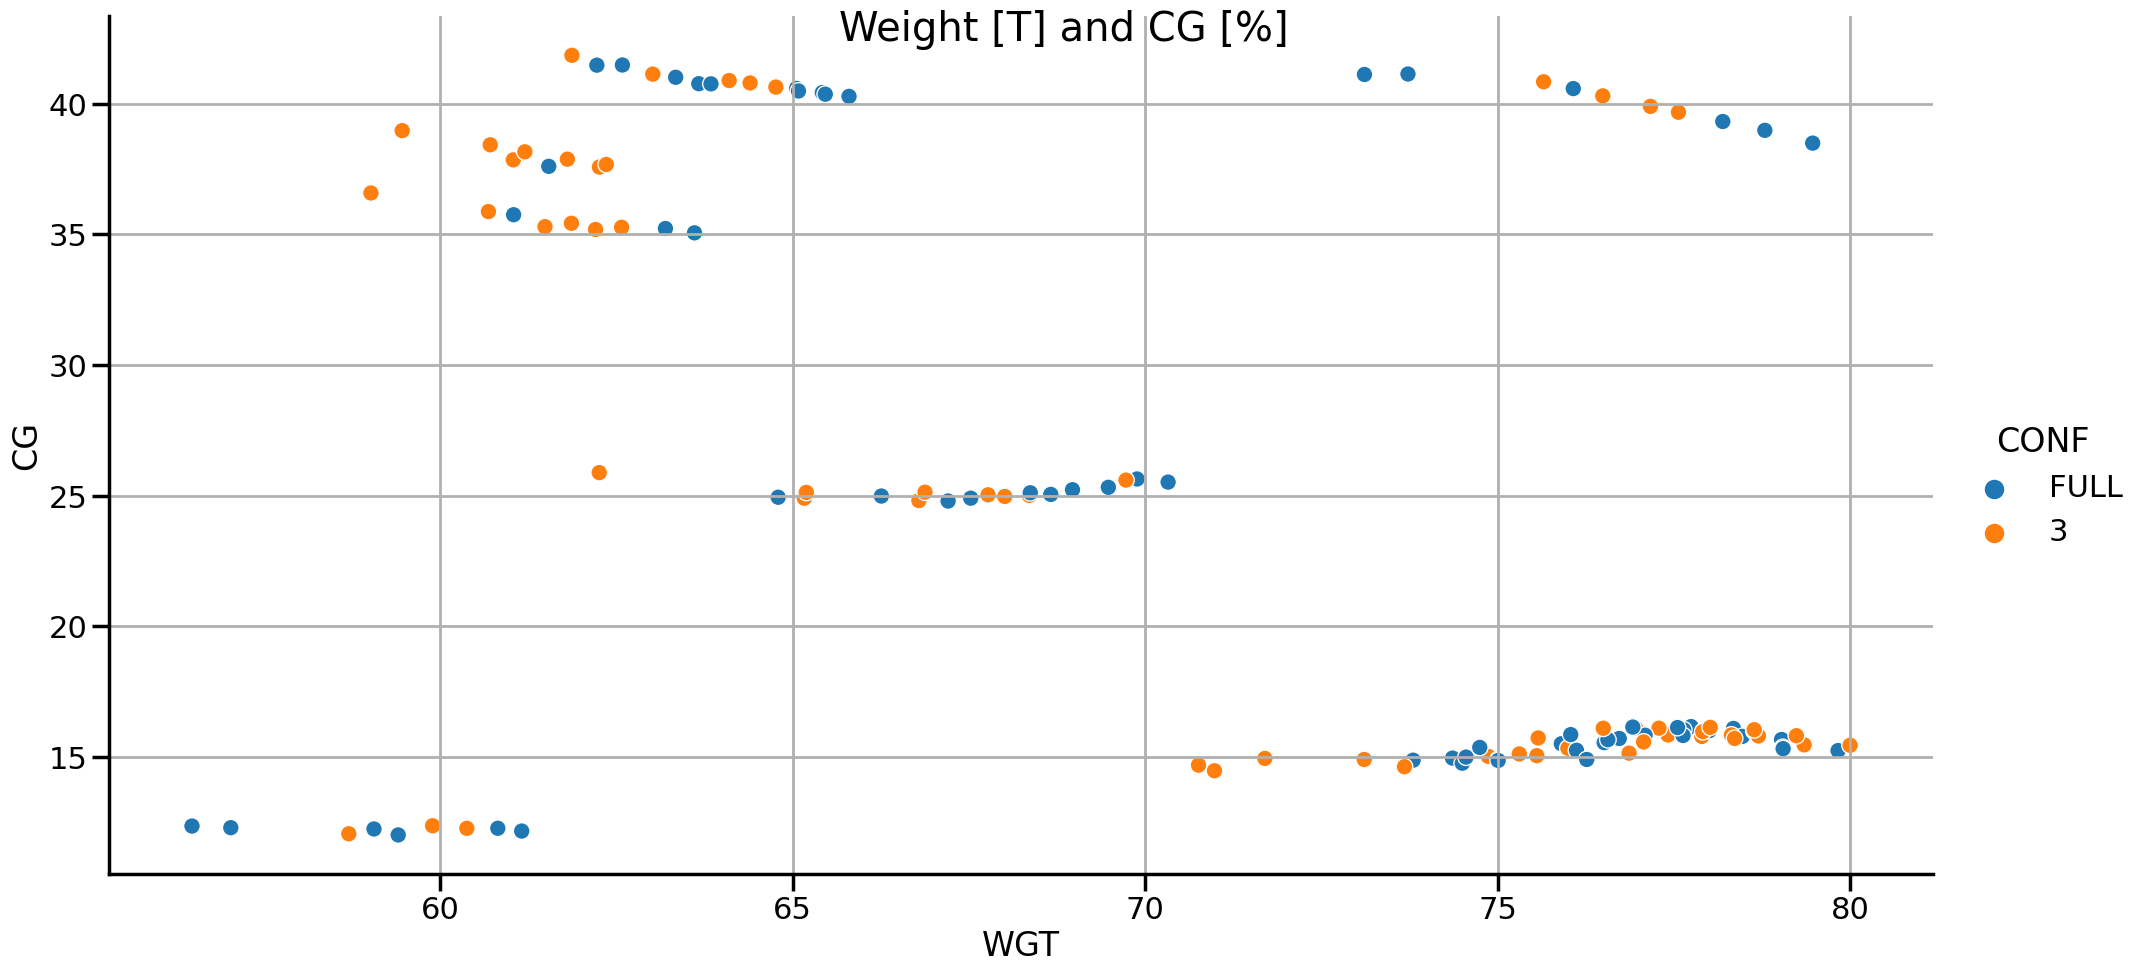

Min/Max experimented Weight: 56 / 79 T
Min/Max experimented CG: 12 / 41 %


In [140]:
sns.pairplot(data=dataset,hue="CONF",x_vars="WGT",y_vars="CG",size=10, aspect=2)
plt.suptitle('Weight [T] and CG [%]')
plt.grid(True)
plt.show()
print ('Min/Max experimented Weight:', int(min(dataset['WGT'])),'/',int(max(dataset['WGT'])),'T')
print ('Min/Max experimented CG:',int(min(dataset['CG'])),'/',int(max(dataset['CG'])),'%')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


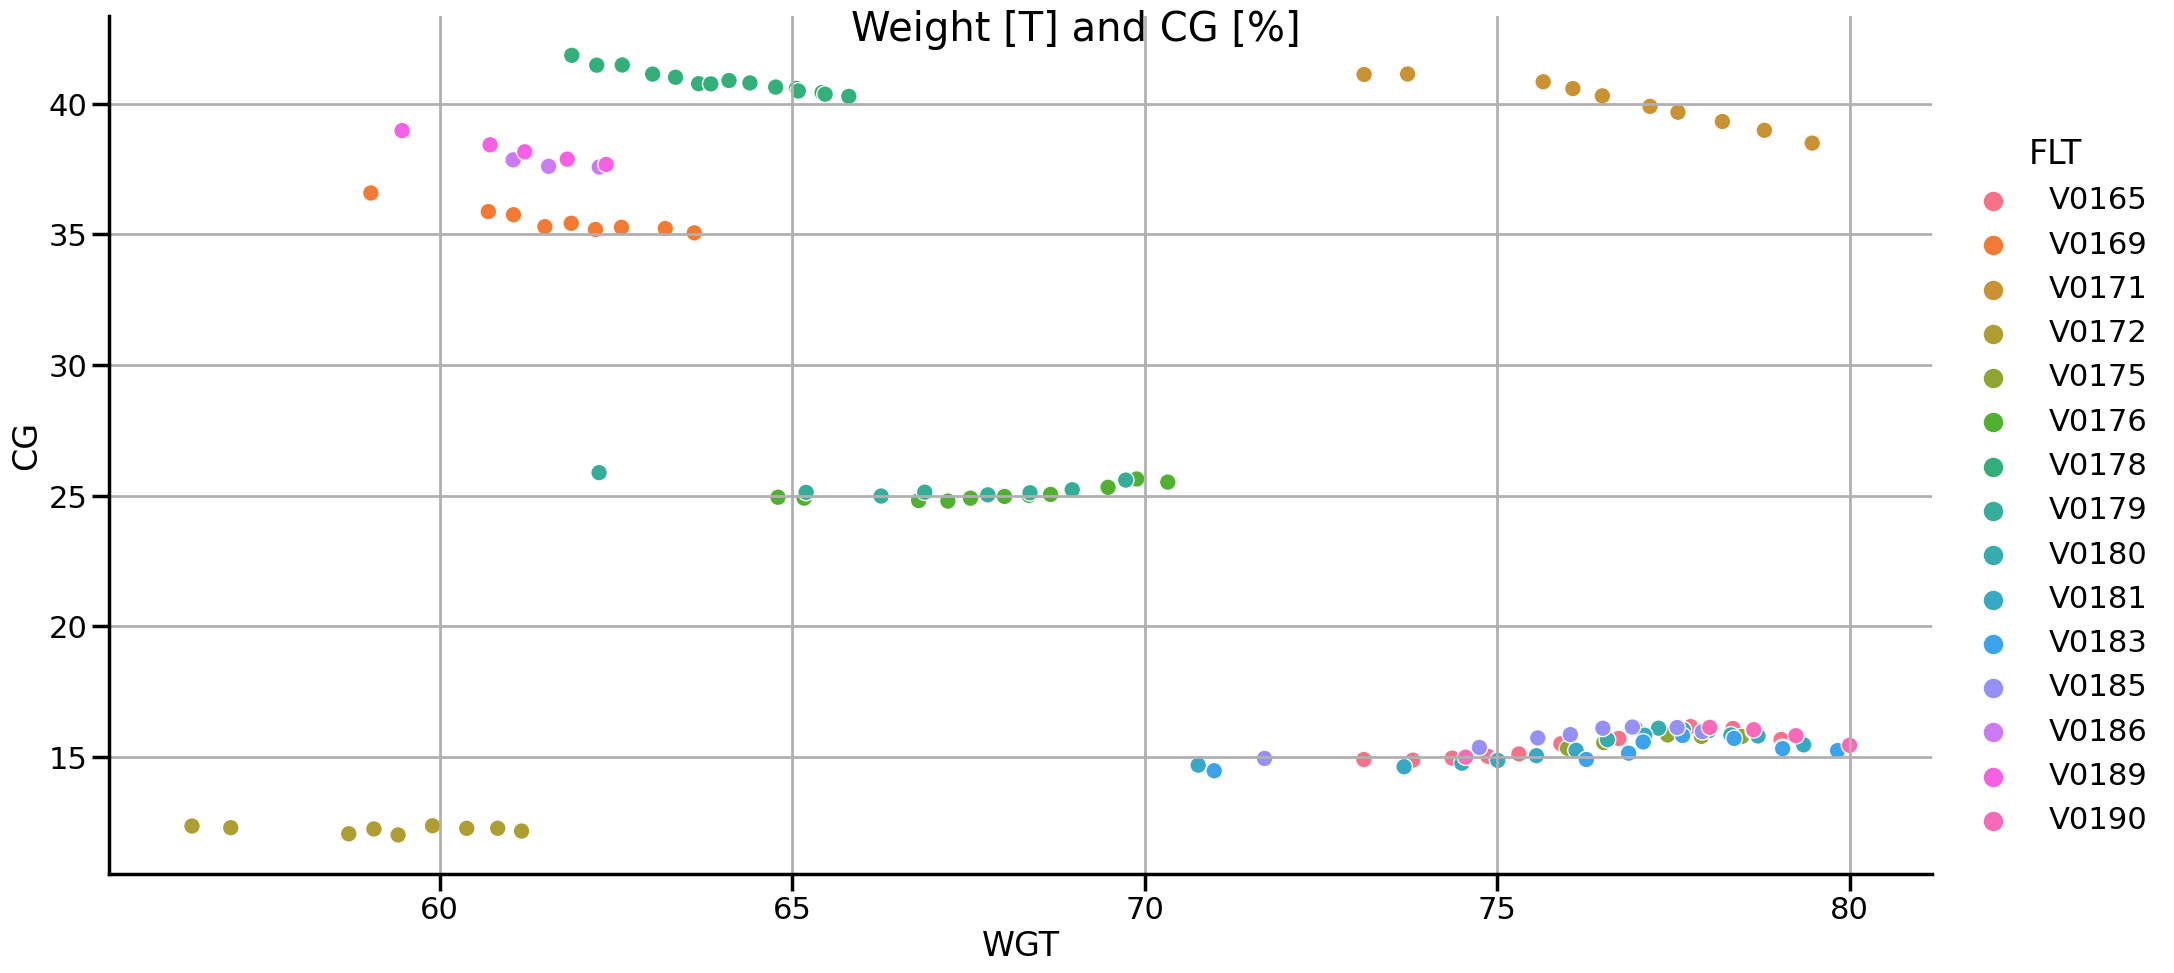

Min/Max experimented Weight: 56 / 79 T
Min/Max experimented CG: 12 / 41 %


In [141]:
sns.pairplot(data=dataset,hue="FLT",x_vars="WGT",y_vars="CG",size=10, aspect=2)
plt.suptitle('Weight [T] and CG [%]')
plt.grid(True)
plt.show()
print ('Min/Max experimented Weight:', int(min(dataset['WGT'])),'/',int(max(dataset['WGT'])),'T')
print ('Min/Max experimented CG:',int(min(dataset['CG'])),'/',int(max(dataset['CG'])),'%')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


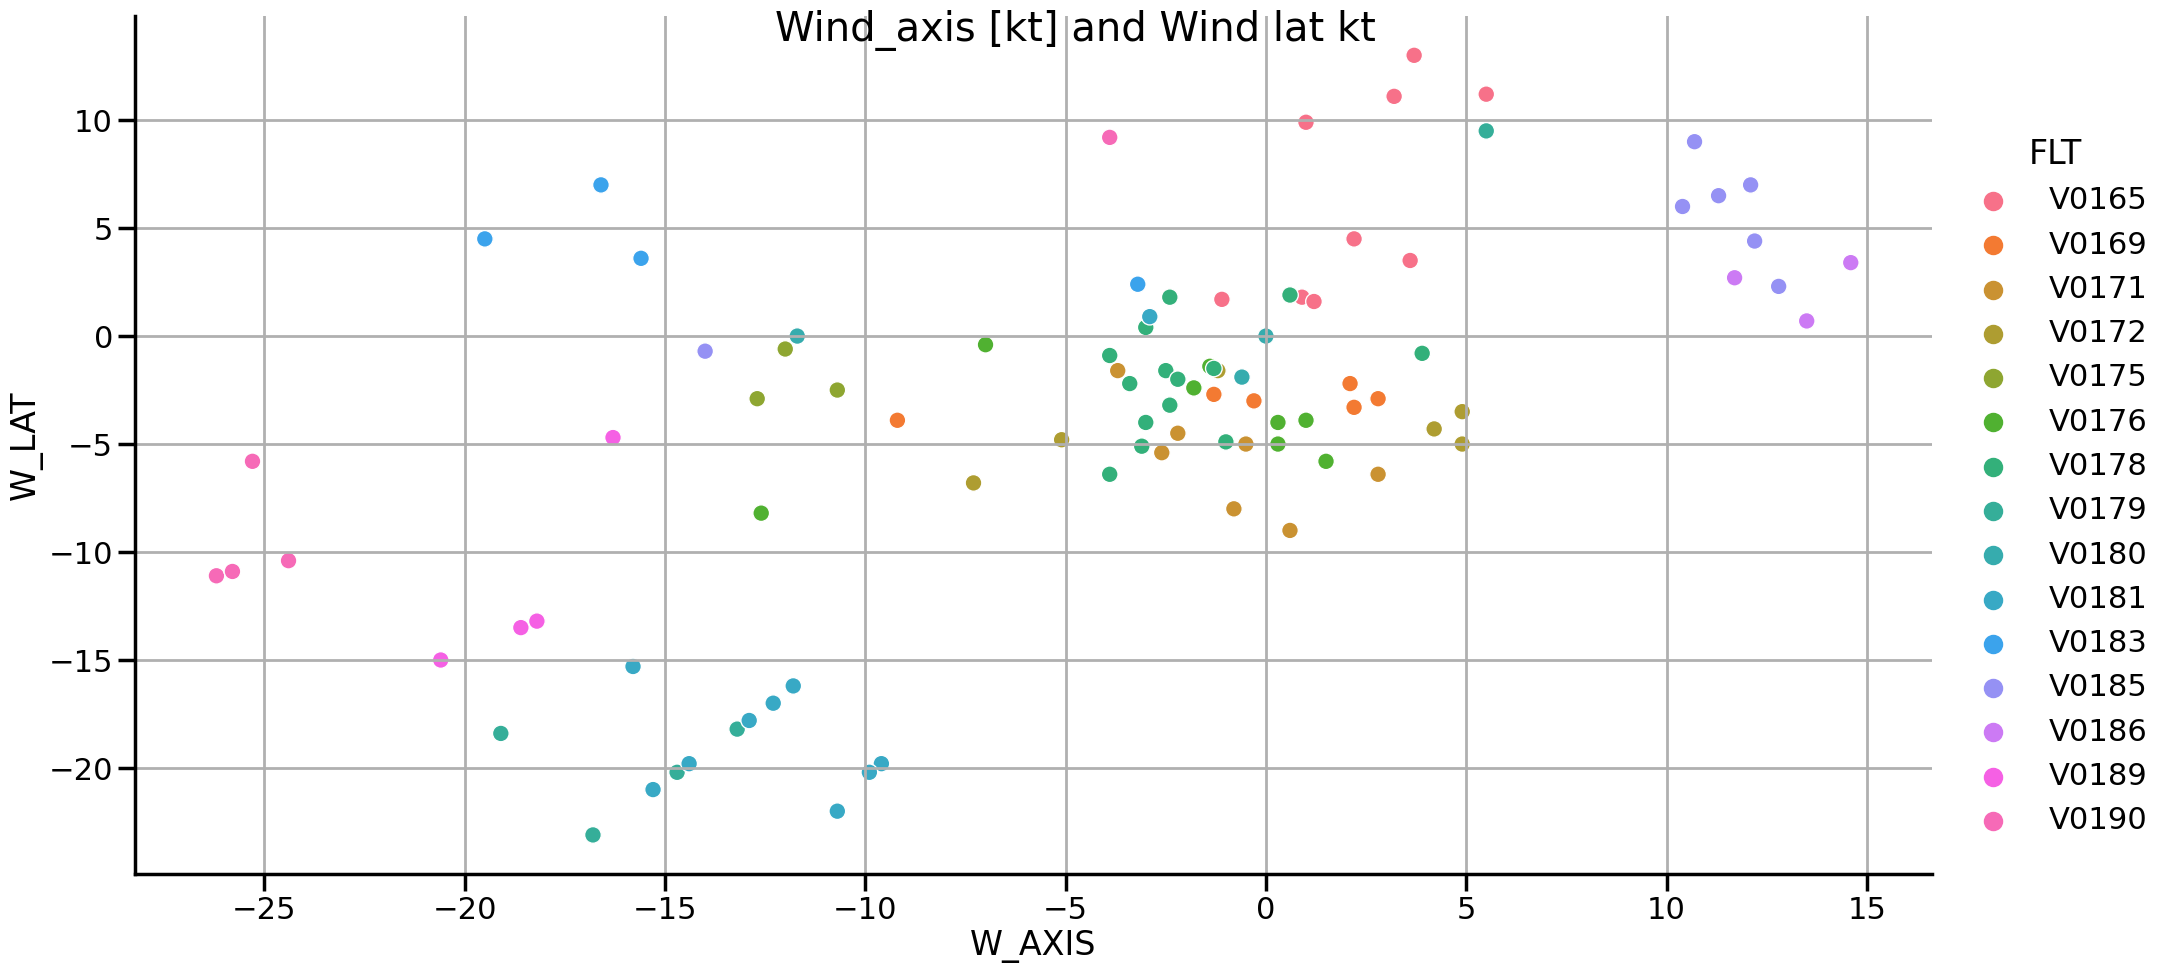

Min/Max experimented longi Wind: -26 / 14 kt
Min/Max experimented lat Wind: -23 / 13 kt


In [142]:
sns.pairplot(data=dataset,hue="FLT",x_vars="W_AXIS",y_vars="W_LAT",size=10, aspect=2)
plt.suptitle('Wind_axis [kt] and Wind lat kt')
plt.grid(True)
plt.show()
print ('Min/Max experimented longi Wind:', int(min(dataset['W_AXIS'])),'/',int(max(dataset['W_AXIS'])),'kt')
print ('Min/Max experimented lat Wind:',int(min(dataset['W_LAT'])),'/',int(max(dataset['W_LAT'])),'kt')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


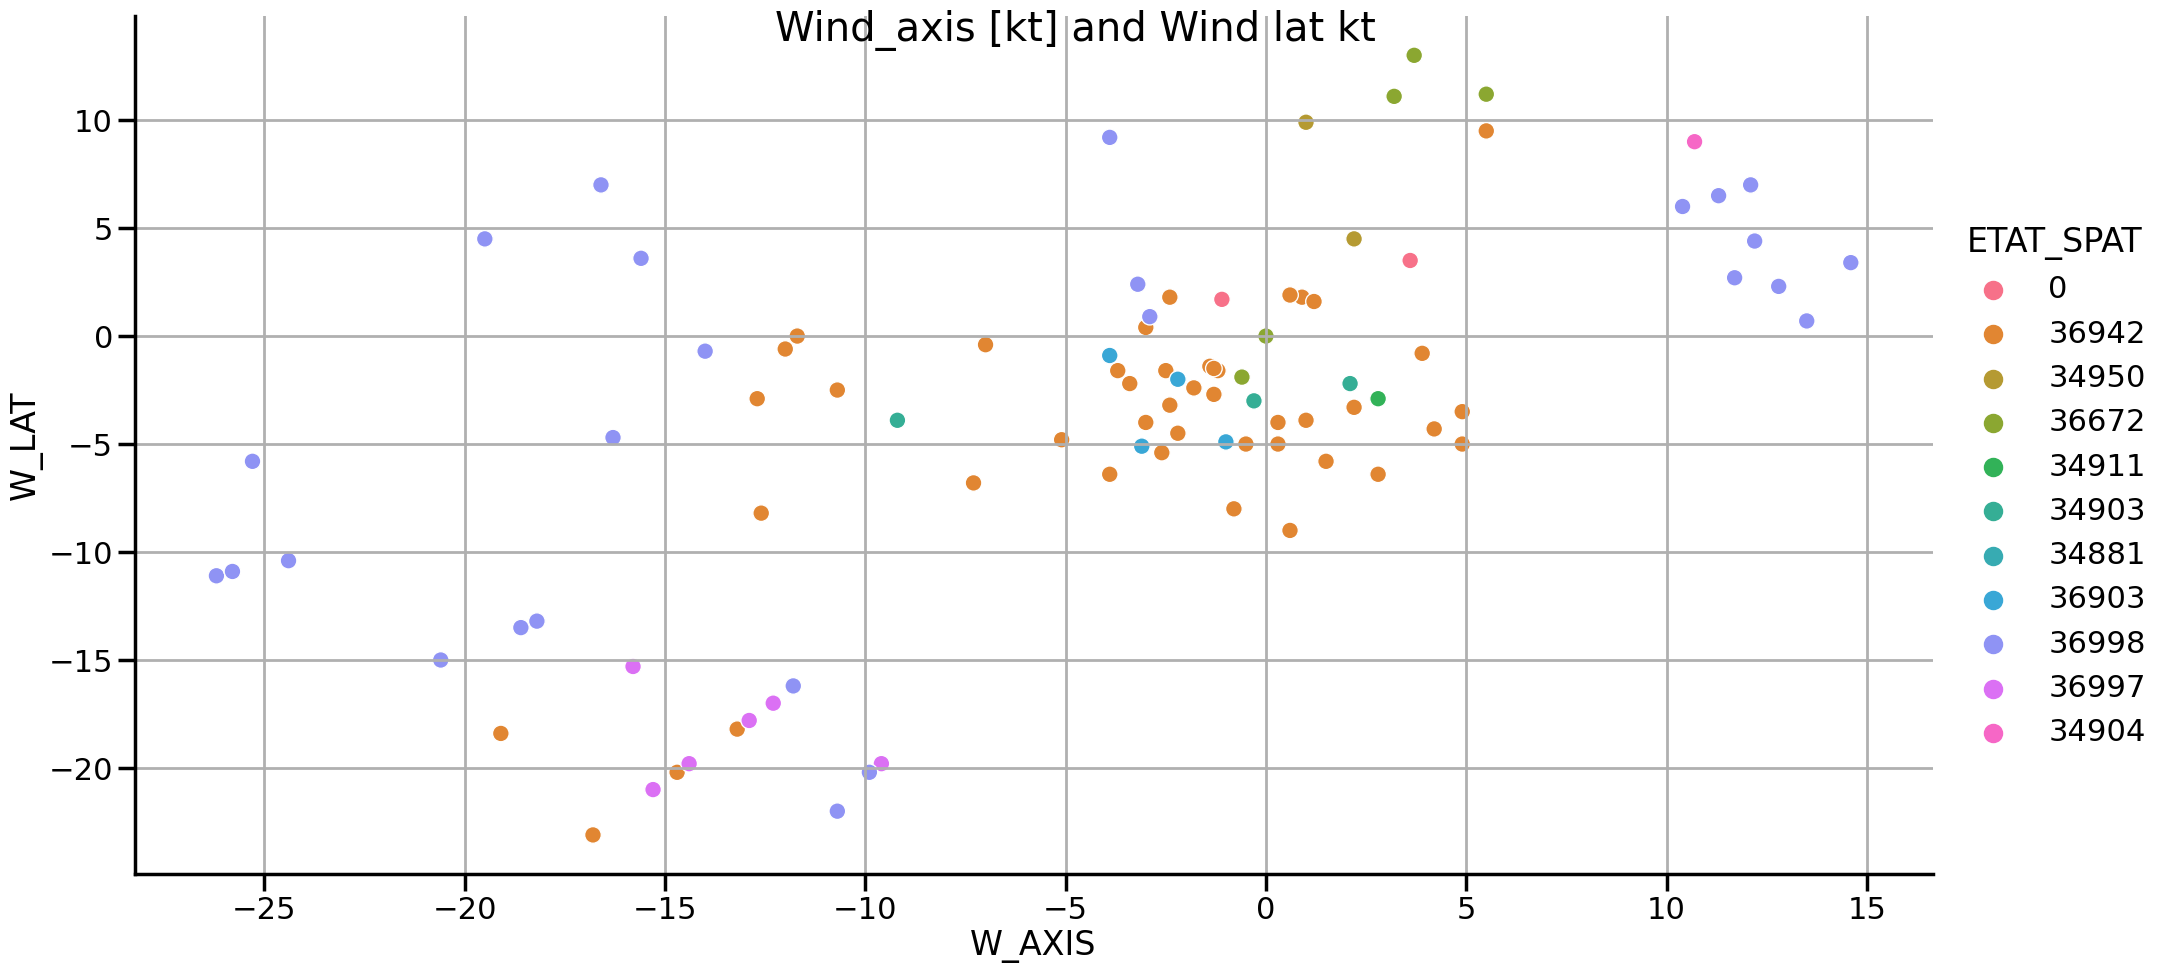

Min/Max experimented longi Wind: -26 / 14 kt
Min/Max experimented lat Wind: -23 / 13 kt


In [143]:
sns.pairplot(data=dataset,hue="ETAT_SPAT",x_vars="W_AXIS",y_vars="W_LAT",size=10, aspect=2)
plt.suptitle('Wind_axis [kt] and Wind lat kt')
plt.grid(True)
plt.show()
print ('Min/Max experimented longi Wind:', int(min(dataset['W_AXIS'])),'/',int(max(dataset['W_AXIS'])),'kt')
print ('Min/Max experimented lat Wind:',int(min(dataset['W_LAT'])),'/',int(max(dataset['W_LAT'])),'kt')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


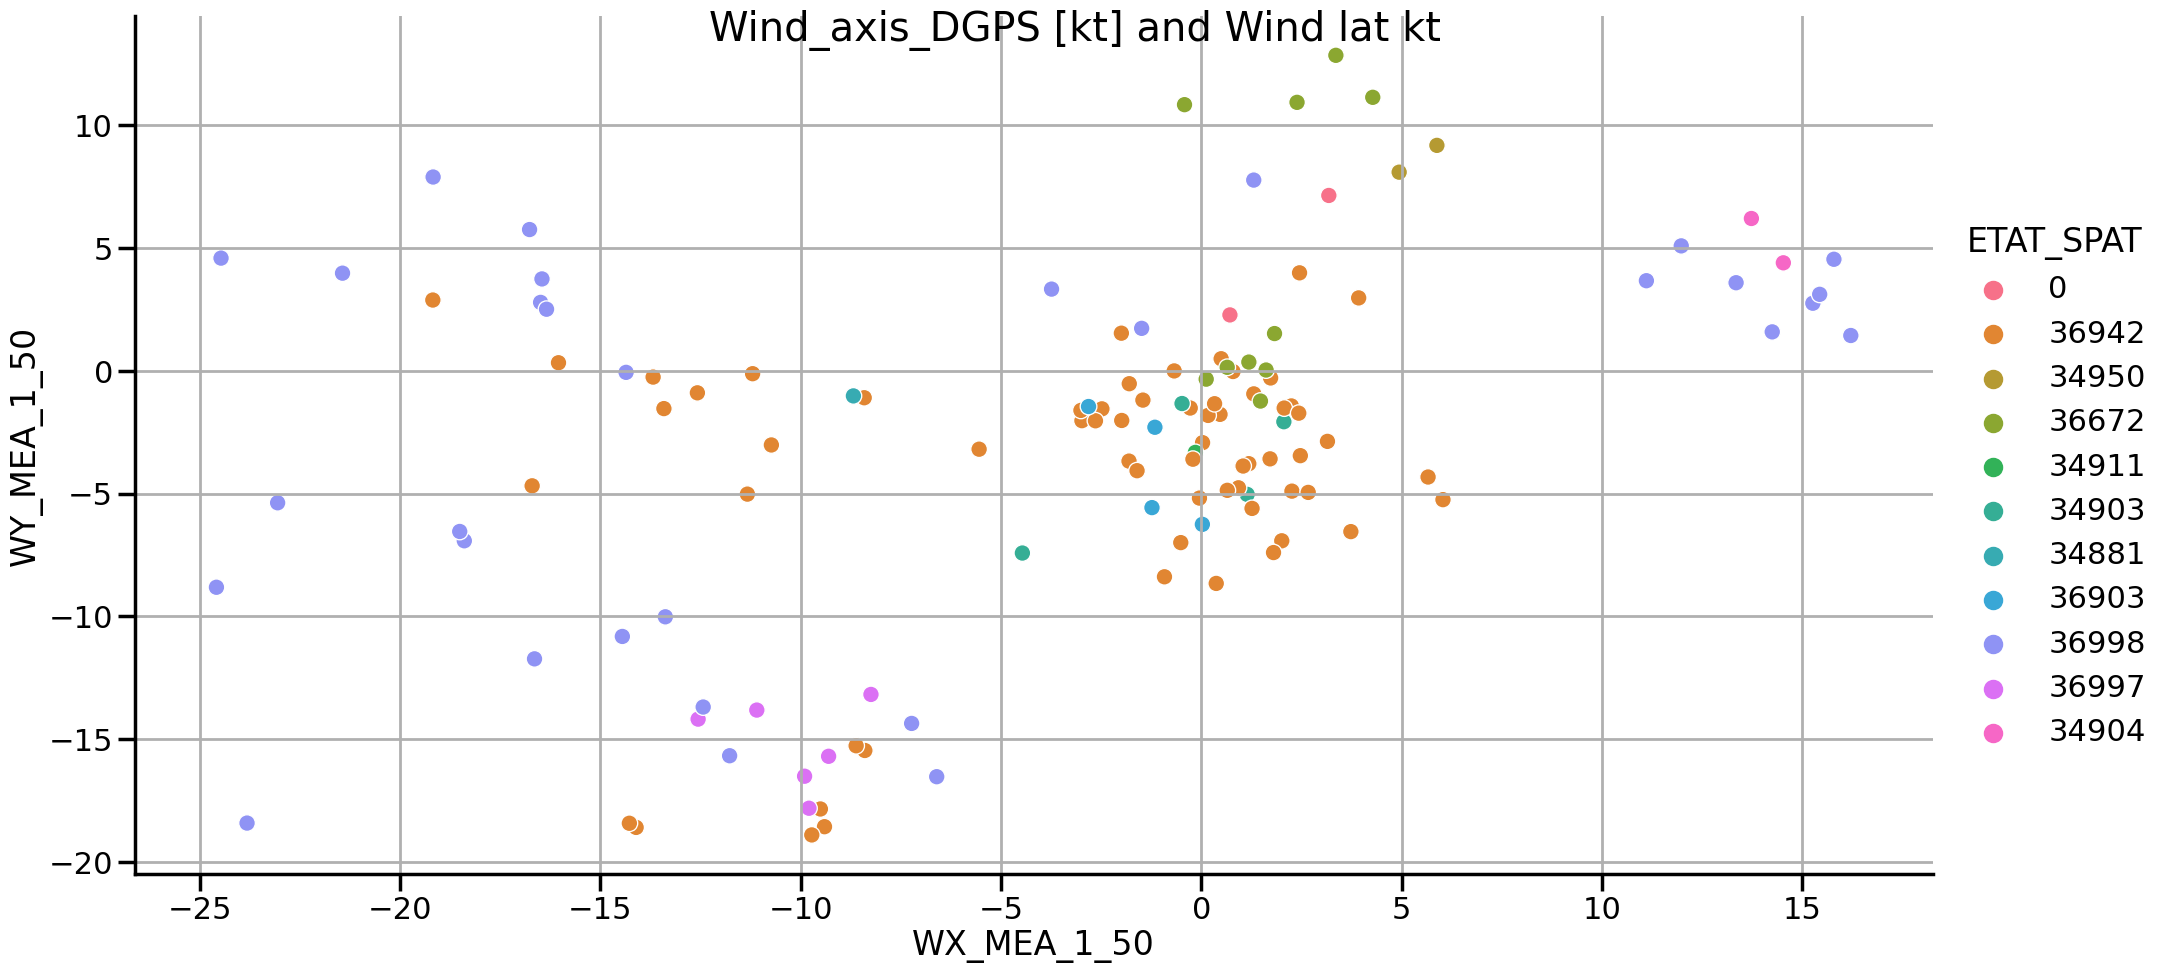

Min/Max experimented longi Wind: -24 / 16 kt
Min/Max experimented lat Wind: -18 / 12 kt


In [146]:
sns.pairplot(data=dataset,hue="ETAT_SPAT",x_vars="WX_MEA_1_50",y_vars="WY_MEA_1_50",size=10, aspect=2)
plt.suptitle('Wind_axis_DGPS [kt] and Wind lat kt')
plt.grid(True)
plt.show()
print ('Min/Max experimented longi Wind:', int(min(dataset['WX_MEA_1_50'])),'/',int(max(dataset['WX_MEA_1_50'])),'kt')
print ('Min/Max experimented lat Wind:',int(min(dataset['WY_MEA_1_50'])),'/',int(max(dataset['WY_MEA_1_50'])),'kt')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


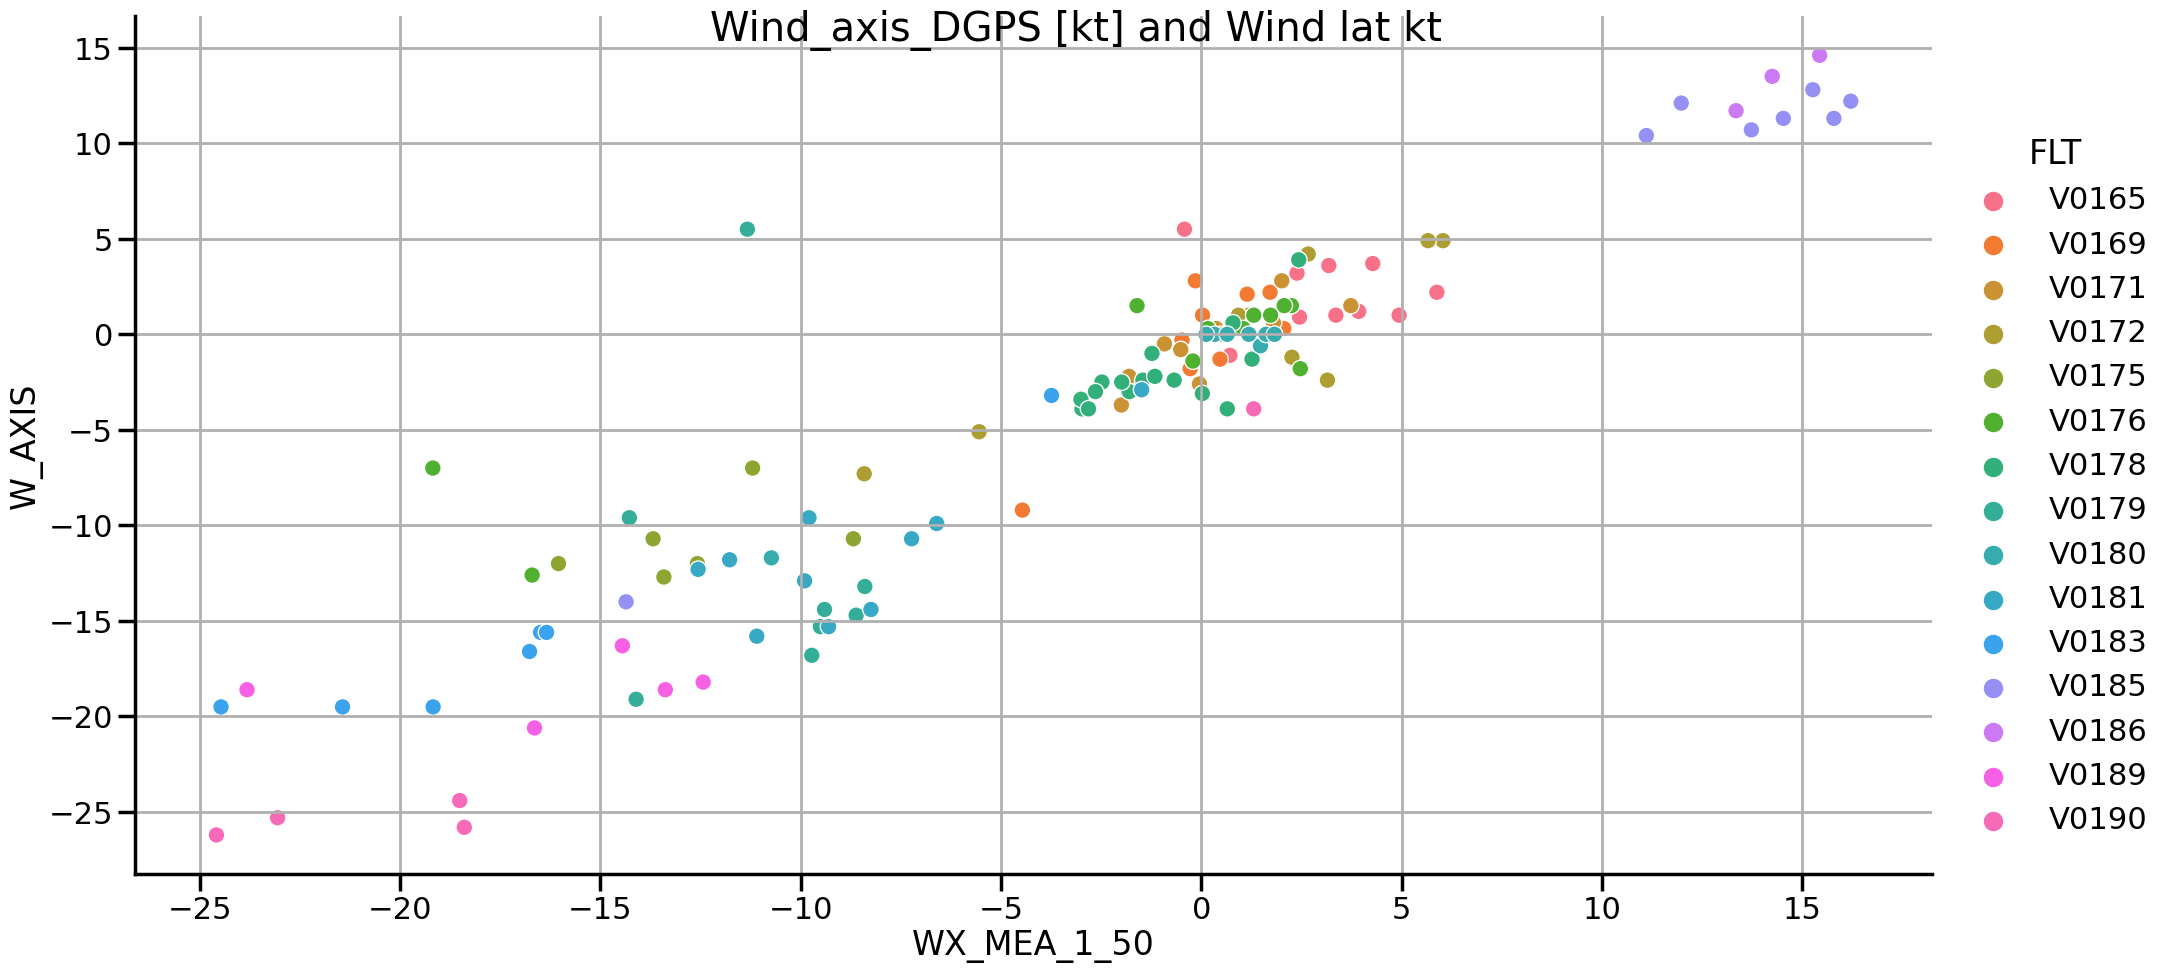

In [145]:
sns.pairplot(data=dataset,hue="FLT",x_vars="WX_MEA_1_50",y_vars="W_AXIS",size=10, aspect=2)
plt.suptitle('Wind_axis_DGPS [kt] and Wind lat kt')
plt.grid(True)
plt.show()


C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


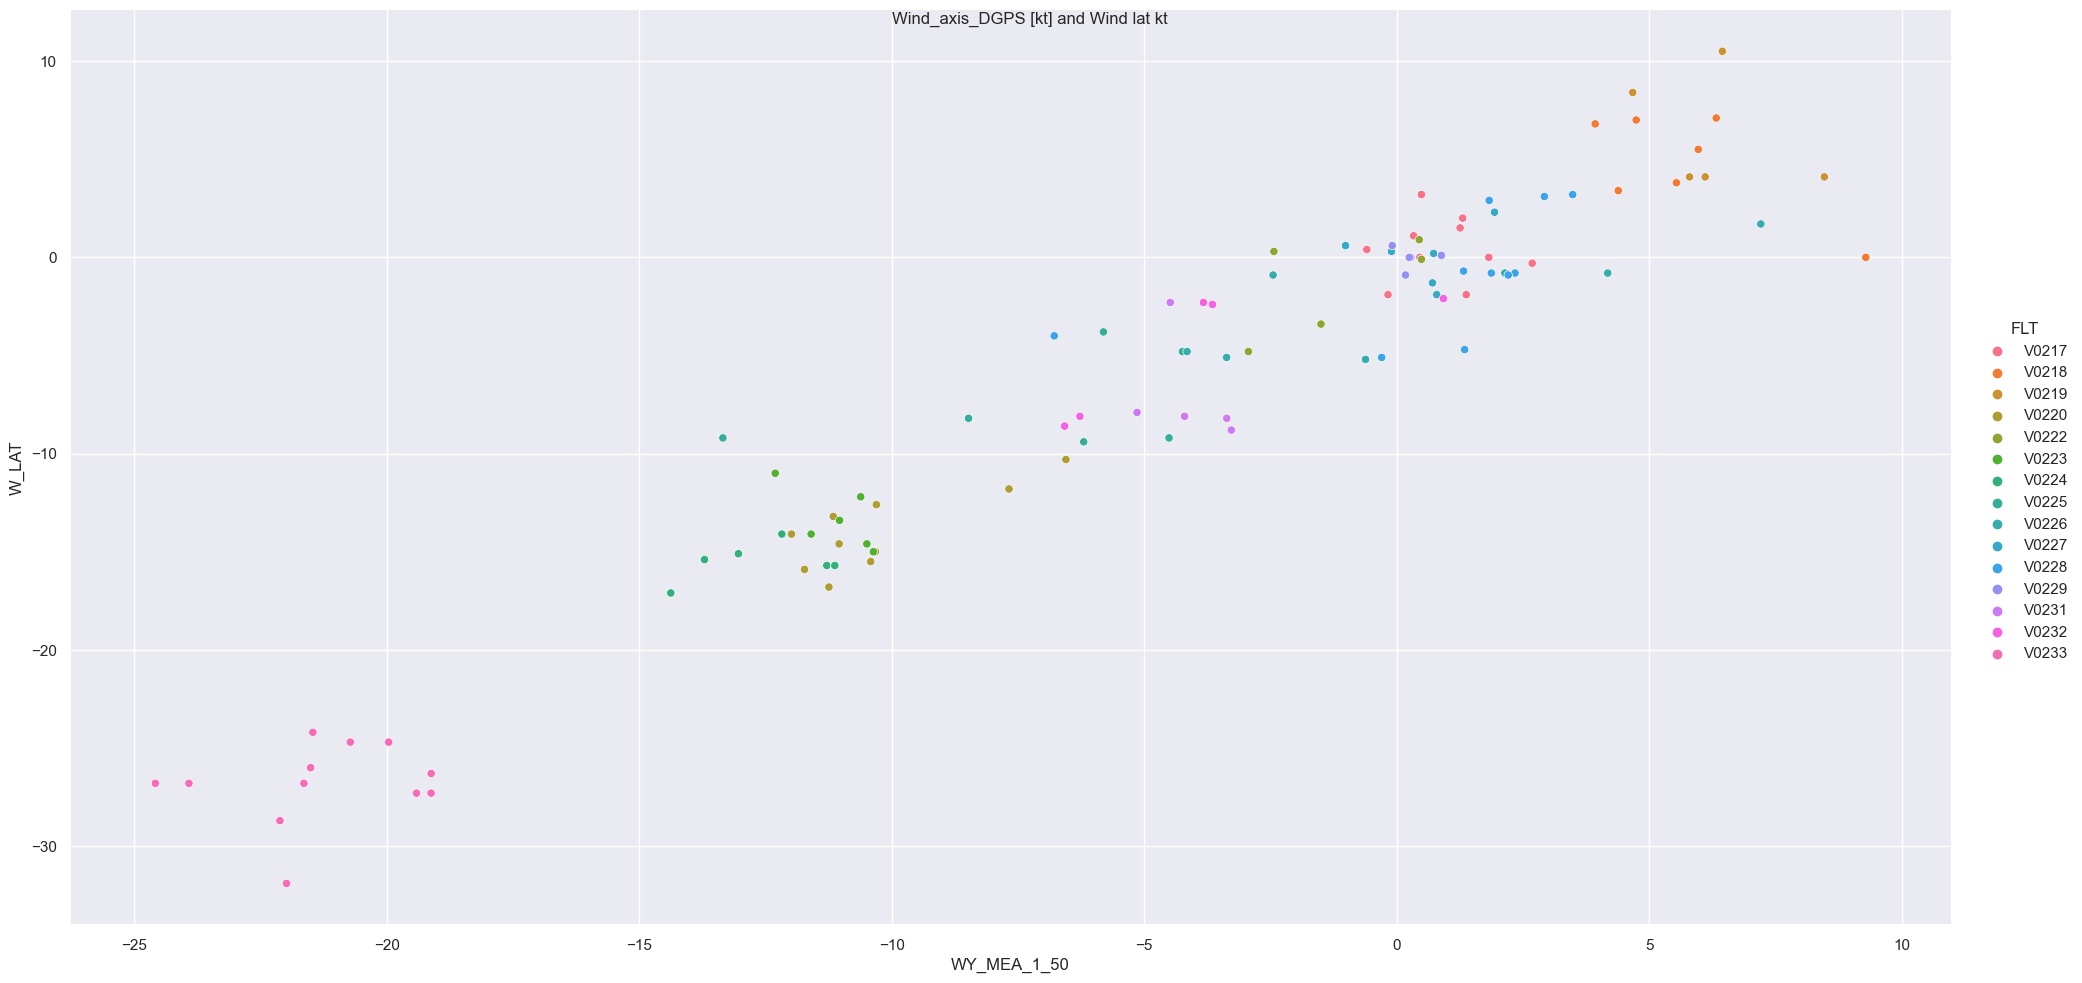

In [696]:
sns.pairplot(data=dataset,hue="FLT",x_vars="WY_MEA_1_50",y_vars="W_LAT",size=10, aspect=2)
plt.suptitle('Wind_axis_DGPS [kt] and Wind lat kt')
plt.grid(True)
plt.show()

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


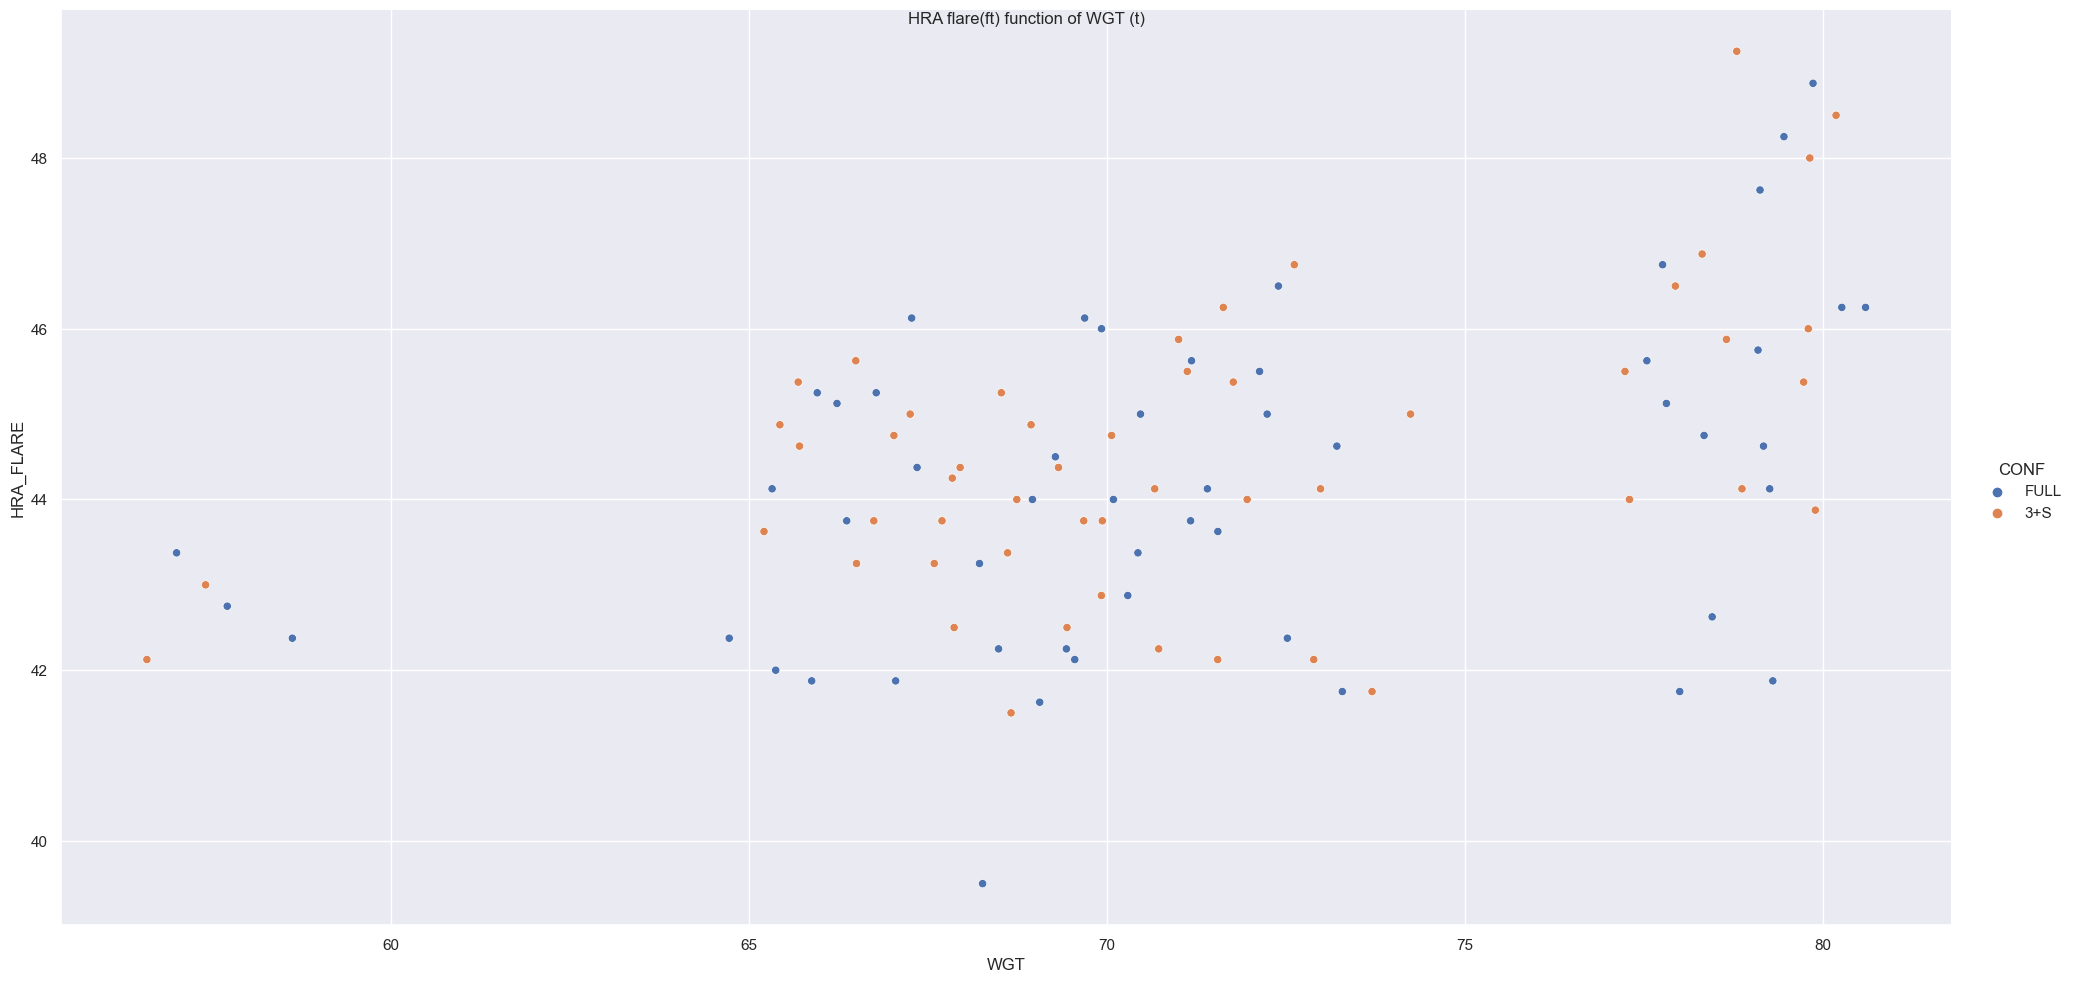

Min/Max experimented Weight: 56 / 80 T
Min/Max experimented Hraflare: 39 / 49 ft


In [697]:
sns.pairplot(data=dataset,hue="CONF",x_vars="WGT",y_vars="HRA_FLARE",size=10, aspect=2)
plt.suptitle('HRA flare(ft) function of WGT (t)')
plt.grid(True)
plt.show()
print ('Min/Max experimented Weight:', int(min(dataset['WGT'])),'/',int(max(dataset['WGT'])),'T')
print ('Min/Max experimented Hraflare:',int(min(dataset['HRA_FLARE'])),'/',int(max(dataset['HRA_FLARE'])),'ft')

    Flare coverage in WGT/CG ranges from Med /Aft to Hvy /FWd

In [149]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [210]:
result_XRTCH = dataset.groupby('ETAT_SPAT').agg({'XR_TCH': ['min', 'max','count','mean','std']}) 
print (result_XRTCH)
result_VZTCH = dataset.groupby('ETAT_SPAT').agg({'VZTCH': ['min', 'max','count','mean','std']}) 
print (result_VZTCH)

             XR_TCH                                        
                min       max count        mean         std
ETAT_SPAT                                                  
0          298.7567  371.5349     2  335.145800   51.461959
34881      305.2458  305.2458     1  305.245800         NaN
34903      330.7404  530.7161     4  400.651375   88.722265
34904      499.1150  535.9256     2  517.520300   26.029025
34911      333.4972  333.4972     1  333.497200         NaN
34950      318.0291  522.4251     2  420.227100  144.529798
36672      286.2831  328.7622    10  307.163360   12.871560
36903      326.7722  453.0651     4  379.159825   60.980265
36942      253.7021  526.5628    63  366.704510   58.354997
36997      236.2837  478.5716     6  335.393433  113.023032
36998      202.4969  634.2339    31  356.051900   97.329786
            VZTCH                                  
              min     max count      mean       std
ETAT_SPAT                                          
0   

based on previous result 36998 is scattered in X, VZ so can be rejected (-8.9 ft/s, 202m)

In [212]:
(min_x, min_x_idx)= (dataset['XR_TCH'].min(),dataset['XR_TCH'].idxmin())
print (min_x,min_x_idx,dataset.loc[min_x_idx,"FLT"],dataset.loc[min_x_idx,"TEST_NB"],dataset.loc[min_x_idx,"GMT_REF"],dataset.loc[min_x_idx,"key"],dataset.loc[min_x_idx,"W_AXIS"],dataset.loc[min_x_idx,"ETAT_SPAT"])

202.4969 92 V0181 4 14:54:21 M7877_V0181_4 -11.8 36998


In [213]:
(min_vz, min_vz_idx)= (dataset['VZTCH'].min(),dataset['VZTCH'].idxmax())
print (min_vz,min_vz_idx,dataset.loc[min_vz_idx,"FLT"],dataset.loc[min_vz_idx,"TEST_NB"],dataset.loc[min_vz_idx,"GMT_REF"],dataset.loc[min_vz_idx,"key"],dataset.loc[min_vz_idx,"W_AXIS"])

-8.9616 76 V0179 5 9:41:25 M7877_V0179_5 -14.7


In [150]:
dataset[['HRA_FLARE','HRA_X0']].describe()

HRA_FLARE      HRA_X0
count  125.000000  126.000000
mean    42.170000   38.969246
std      1.180145    4.631892
min     39.375000   21.375000
25%     41.375000   35.687500
50%     42.125000   39.000000
75%     43.000000   41.843750
max     44.875000   49.625000

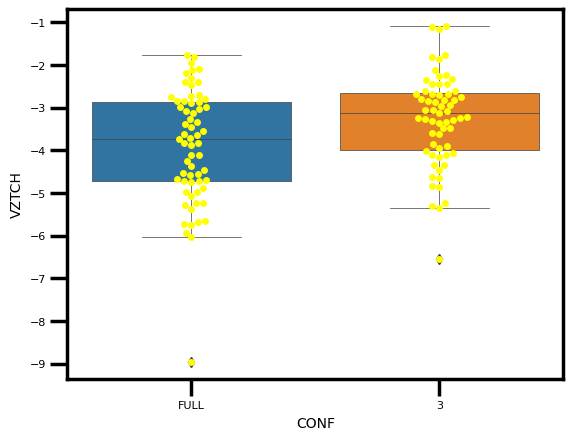

In [151]:
 ax = sns.boxplot(data=dataset, y="VZTCH", x="CONF",linewidth=.5)
 ax = sns.swarmplot(data=dataset, y="VZTCH", x="CONF", color="yellow")
plt.show()

In [152]:
liste_maj=[]
liste_min=['vztj_200','vztj_100','vztj_90','vztj_80','vztj_70','vztj_60','vztj_50','vztj_45','vztj_40','vztj_35','vztj_30','vztj_25','vztj_20','vztj_15','vztj_10','vztj_5','vztj_tch','conf']
for elem in liste_min:
    liste_maj.append(elem.upper())
print(liste_maj)

['VZTJ_200', 'VZTJ_100', 'VZTJ_90', 'VZTJ_80', 'VZTJ_70', 'VZTJ_60', 'VZTJ_50', 'VZTJ_45', 'VZTJ_40', 'VZTJ_35', 'VZTJ_30', 'VZTJ_25', 'VZTJ_20', 'VZTJ_15', 'VZTJ_10', 'VZTJ_5', 'VZTJ_TCH', 'CONF']


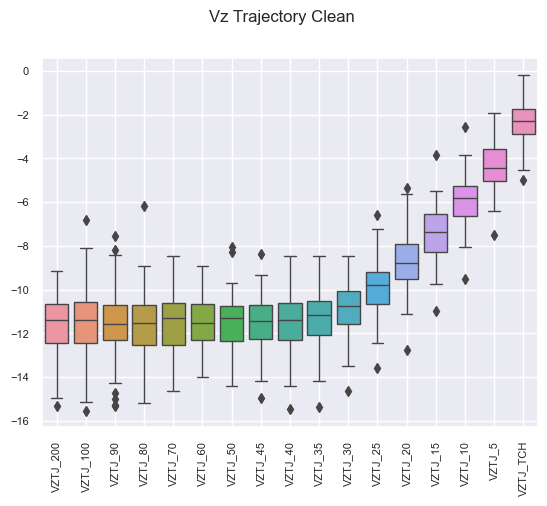

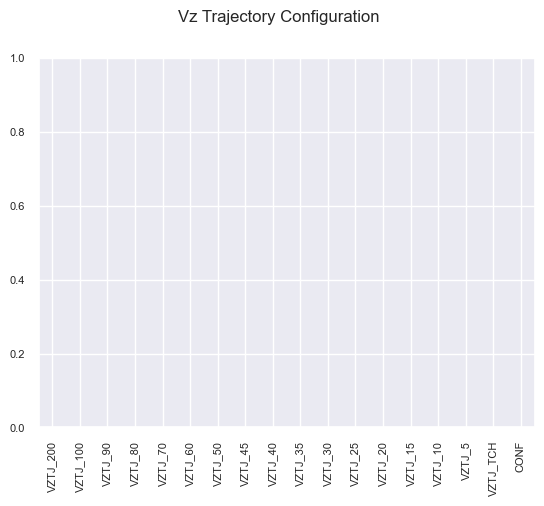

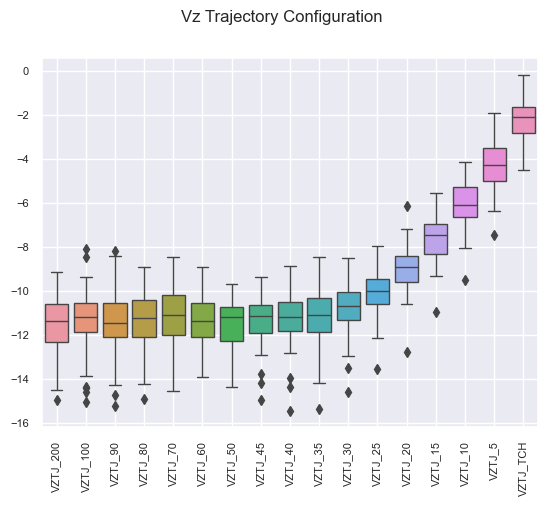

In [727]:

# lecture du dataset
vztraj=dataset[['VZTJ_200', 'VZTJ_100', 'VZTJ_90', 'VZTJ_80', 'VZTJ_70', 'VZTJ_60', 'VZTJ_50', 'VZTJ_45', 'VZTJ_40', 'VZTJ_35', 'VZTJ_30', 'VZTJ_25', 'VZTJ_20', 'VZTJ_15', 'VZTJ_10', 'VZTJ_5', 'VZTJ_TCH', 'CONF']]


vztraj_conf3=vztraj.query('CONF==3 and VZTJ_100>-20')
vztraj_conff=vztraj.query('CONF=="FULL" and VZTJ_100>-20')
vztraj_clean=vztraj.query('VZTJ_100>-20')


#prints vztraj_clean
ax =sns.boxplot(data=vztraj_clean,linewidth=1)
#inserts headline
plt.suptitle("Vz Trajectory Clean")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

#prints vztraj_conf3
ax = sns.boxplot(data=vztraj_conf3,linewidth=1)
plt.suptitle("Vz Trajectory Configuration")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

#prints vztraj_conff
ax = sns.boxplot(data=vztraj_conff,linewidth=1)
plt.suptitle("Vz Trajectory Configuration")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

In [153]:
liste_maj=[]
liste_min=['teta_200','teta_100','teta_90','teta_80','teta_70','teta_60','teta_50','teta_45','teta_40','teta_35','teta_30','teta_25','teta_20','teta_15','teta_10','teta_5','teta_x0','teta_x60','teta_tch']
for elem in liste_min:
    liste_maj.append(elem.upper())
print(liste_maj)

['TETA_200', 'TETA_100', 'TETA_90', 'TETA_80', 'TETA_70', 'TETA_60', 'TETA_50', 'TETA_45', 'TETA_40', 'TETA_35', 'TETA_30', 'TETA_25', 'TETA_20', 'TETA_15', 'TETA_10', 'TETA_5', 'TETA_X0', 'TETA_X60', 'TETA_TCH']


In [154]:

liste_guidance=["AC_NB","FLT","TEST_NB","TEST","RWY","W_HDG","W_SPD","W_GUST","W_AXIS","W_LAT","WGT","CG","CONF","AP","ATHR","VSEL","ENG_CND","DVC_MIN_5_50","DVC_MEA_5_50","DVC_MAX_5_50","LOC_MAX_3_15","GS_MAX_3_1","CREW","COMMENTS"]


In [155]:
#building list guidance performance
guidance_perfo=dataset[liste_guidance]
#guidance_perfo.insert(0, "Run",0)
print (guidance_perfo)
#guidance_perfo.head()


     AC_NB    FLT TEST_NB TEST      RWY  W_HDG  W_SPD  W_GUST  W_AXIS  W_LAT  \
0    M7877  V0165       1  LDG   LFLC26  320.0    2.0     2.0    -1.1    1.7   
1    M7877  V0165       2  LDG   LFLC26   20.0    2.0     2.0     0.9    1.8   
2    M7877  V0165       3   RO   LFLC26   30.0    2.0     2.0     1.2    1.6   
3    M7877  V0165       4   RO   LFLC26   40.0    5.0     5.0     3.6    3.5   
4    M7877  V0165       5  LDG   LFLC26   20.0    5.0     5.0     2.2    4.5   
..     ...    ...     ...  ...      ...    ...    ...     ...     ...    ...   
126  M7877  V0190       1  LDG  LFBO14R  120.0   23.0    34.0   -26.2  -11.1   
127  M7877  V0190       2  LDG  LFBO14R  120.0   23.0    33.0   -25.8  -10.9   
128  M7877  V0190       3  LDG  LFBO14R  120.0   22.0    31.0   -24.4  -10.4   
129  M7877  V0190       4   RO  LFBO14R  130.0   20.0    32.0   -25.3   -5.8   
133  M7877  V0190       8   RO  LFBO14R  210.0   10.0    10.0    -3.9    9.2   

     ...  ATHR    VSEL ENG_CND DVC_MIN_

In [156]:
#building list landing performance
landing_perfo=dataset[["AC_NB","FLT","TEST_NB","TEST","RWY","W_HDG","W_SPD","W_GUST","W_AXIS","W_LAT","WGT","CG","CONF","AP","ATHR","VSEL","ENG_CND","XR_TCH","VZTCH","YR_TCH","VY_TCH","PHI_TCH","CREW","COMMENTS"]]
print (landing_perfo)

     AC_NB    FLT TEST_NB TEST      RWY  W_HDG  W_SPD  W_GUST  W_AXIS  W_LAT  \
0    M7877  V0165       1  LDG   LFLC26  320.0    2.0     2.0    -1.1    1.7   
1    M7877  V0165       2  LDG   LFLC26   20.0    2.0     2.0     0.9    1.8   
2    M7877  V0165       3   RO   LFLC26   30.0    2.0     2.0     1.2    1.6   
3    M7877  V0165       4   RO   LFLC26   40.0    5.0     5.0     3.6    3.5   
4    M7877  V0165       5  LDG   LFLC26   20.0    5.0     5.0     2.2    4.5   
..     ...    ...     ...  ...      ...    ...    ...     ...     ...    ...   
126  M7877  V0190       1  LDG  LFBO14R  120.0   23.0    34.0   -26.2  -11.1   
127  M7877  V0190       2  LDG  LFBO14R  120.0   23.0    33.0   -25.8  -10.9   
128  M7877  V0190       3  LDG  LFBO14R  120.0   22.0    31.0   -24.4  -10.4   
129  M7877  V0190       4   RO  LFBO14R  130.0   20.0    32.0   -25.3   -5.8   
133  M7877  V0190       8   RO  LFBO14R  210.0   10.0    10.0    -3.9    9.2   

     ...  ATHR    VSEL ENG_CND    XR_TC

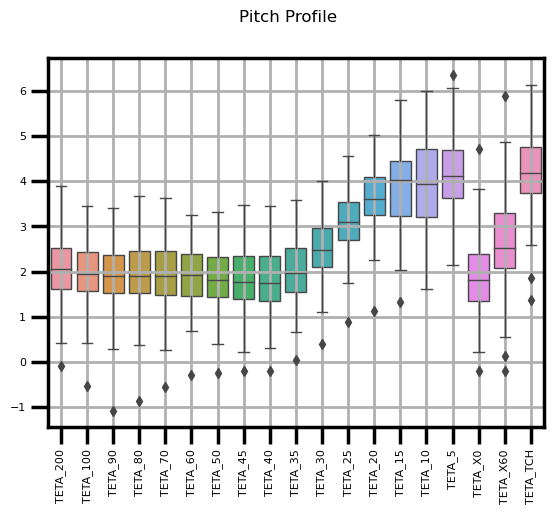

In [157]:
#plots boxplot pitch profile
teta_pitch=dataset[['TETA_200', 'TETA_100', 'TETA_90', 'TETA_80', 'TETA_70', 'TETA_60', 'TETA_50', 'TETA_45', 'TETA_40', 'TETA_35', 'TETA_30', 'TETA_25', 'TETA_20', 'TETA_15', 'TETA_10', 'TETA_5', 'TETA_X0', 'TETA_X60', 'TETA_TCH']]
ax = sns.boxplot(data=teta_pitch,linewidth=1)
plt.suptitle("Pitch Profile")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()



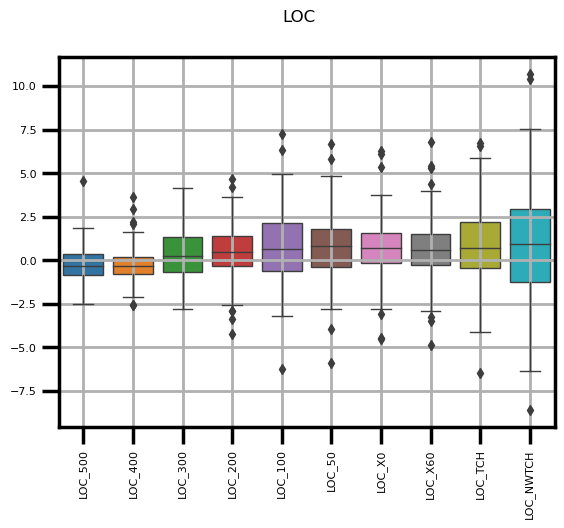

In [158]:
#plots boxplot Loc
loc=dataset[["LOC_500","LOC_400","LOC_300","LOC_200","LOC_100","LOC_50","LOC_X0","LOC_X60","LOC_TCH","LOC_NWTCH"]]
ax = sns.boxplot(data=loc,linewidth=1)
plt.suptitle("LOC")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()


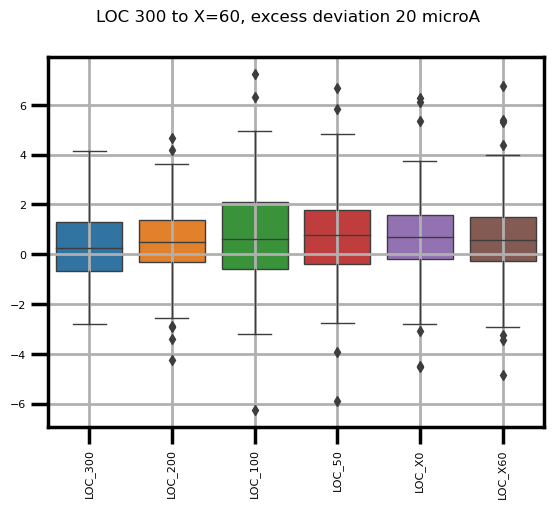

In [159]:
#plots boxplot Loc 300 to X=60 (20 microA Loc)
loc20=dataset[["LOC_300","LOC_200","LOC_100","LOC_50","LOC_X0","LOC_X60"]]
ax = sns.boxplot(data=loc20,linewidth=1)
plt.suptitle("LOC 300 to X=60, excess deviation 20 microA")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()


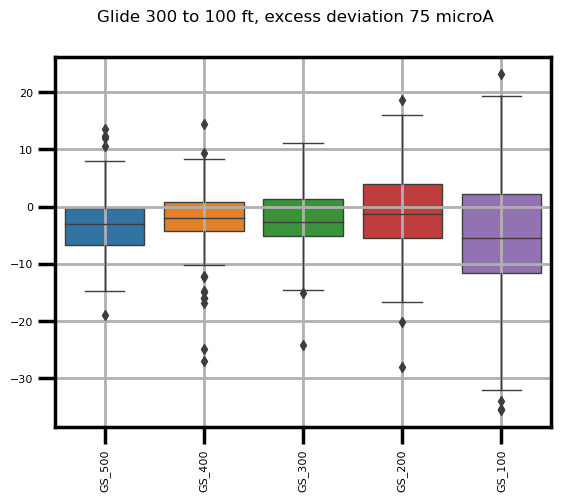

In [160]:
#plots Boxplot GS
gs=dataset[["GS_500","GS_400","GS_300","GS_200","GS_100"]]
ax = sns.boxplot(data=gs,linewidth=1)
plt.suptitle("Glide 300 to 100 ft, excess deviation 75 microA")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

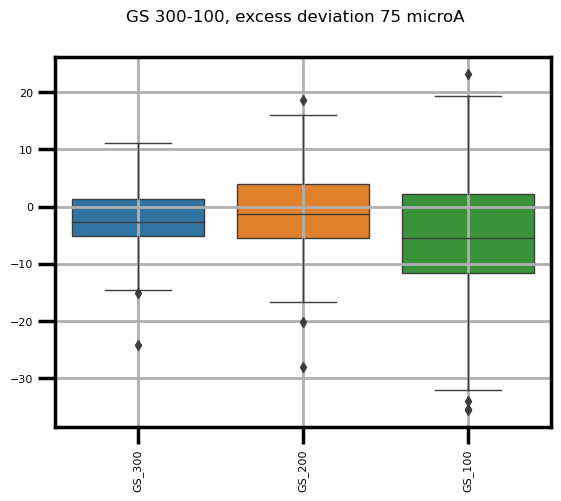

In [161]:
#plots Boxplot GS 300 to 100 75 microA
gs75=dataset[["GS_300","GS_200","GS_100"]]
ax = sns.boxplot(data=gs75,linewidth=1)
plt.suptitle("GS 300-100, excess deviation 75 microA")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

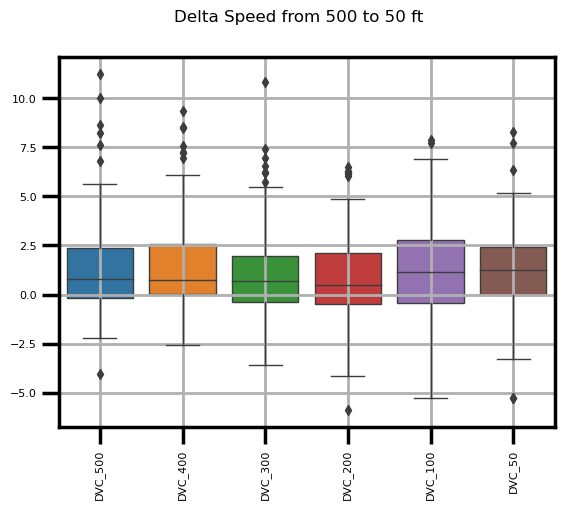

In [163]:
#plots boxplot DVC
#plots boxplot Loc
dvc=dataset[["DVC_500","DVC_400","DVC_300","DVC_200","DVC_100","DVC_50"]]
ax = sns.boxplot(data=dvc,linewidth=1)
plt.suptitle("Delta Speed from 500 to 50 ft")
#gets labels
locs, labels = plt.xticks()
#rotates labels for readableness
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()


In [164]:
print ('Min/Max experimented XR_TCH:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')

print ('Min/Max experimented YR_TCH:',int(min(dataset['YR_TCH'])),'/',int(max(dataset['YR_TCH'])),'m')

Min/Max experimented XR_TCH: 202 / 634 m
Min/Max experimented YR_TCH: -4 / 5 m


In [165]:
print('mean_XTP',dataset['XR_TCH'].mean())
print('stdev_XTP',dataset['XR_TCH'].std())
print('NB_XTP',dataset['XR_TCH'].count())

mean_XTP 361.3314396825398
stdev_XTP 76.11597133782011
NB_XTP 126


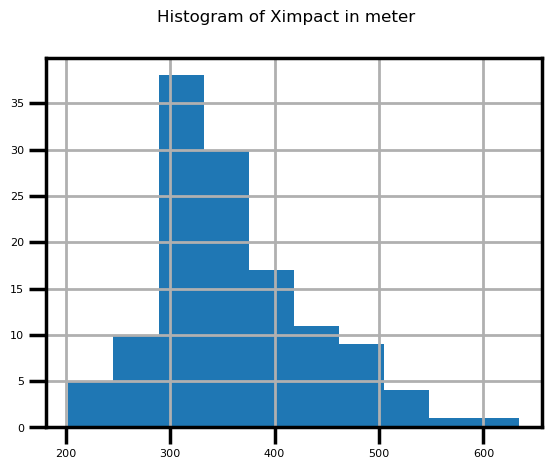

In [166]:
# visualize histogramme for LOCDEV

plt.hist(dataset['XR_TCH'].dropna(),bins=10)
plt.suptitle('Histogram of Ximpact in meter')
plt.grid(True)
plt.show()

In [167]:
sns.set_theme(font_scale=1)

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


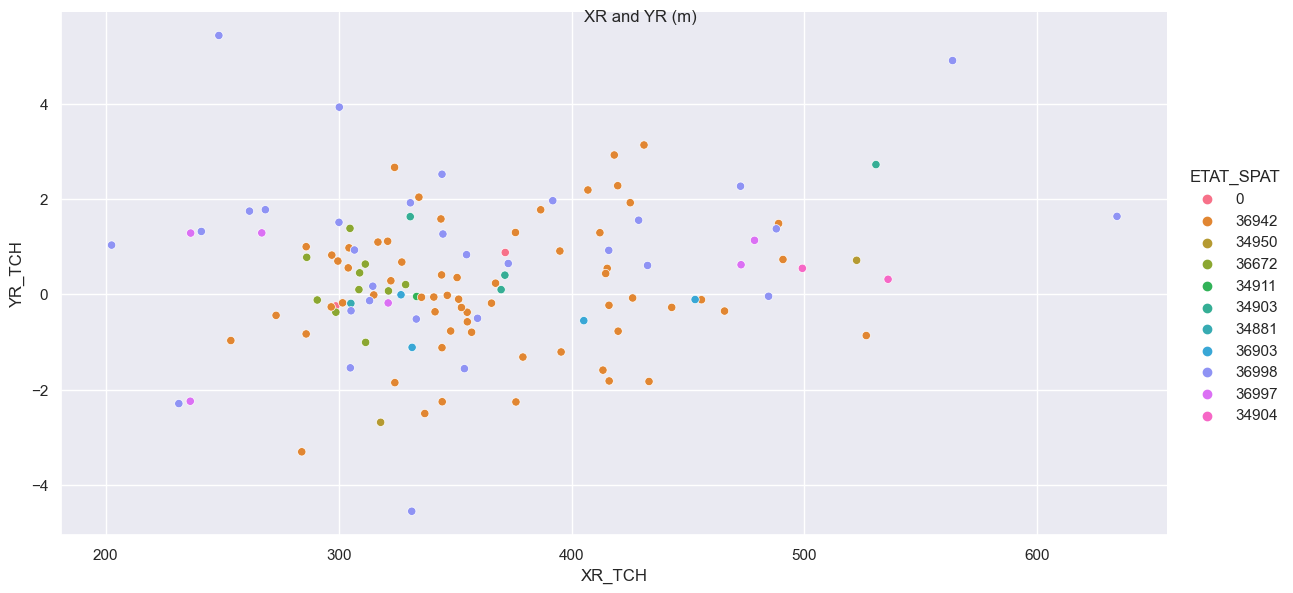

Min/Max experimented XR_TCH: 202 / 634 m
Min/Max experimented YR_TCH: -4 / 5 m


In [169]:
sns.pairplot(data=dataset,hue="ETAT_SPAT",x_vars="XR_TCH",y_vars="YR_TCH",size=6, aspect=2)
plt.suptitle('XR and YR (m)')
plt.grid(True)
plt.show()
print ('Min/Max experimented XR_TCH:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max experimented YR_TCH:',int(min(dataset['YR_TCH'])),'/',int(max(dataset['YR_TCH'])),'m')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


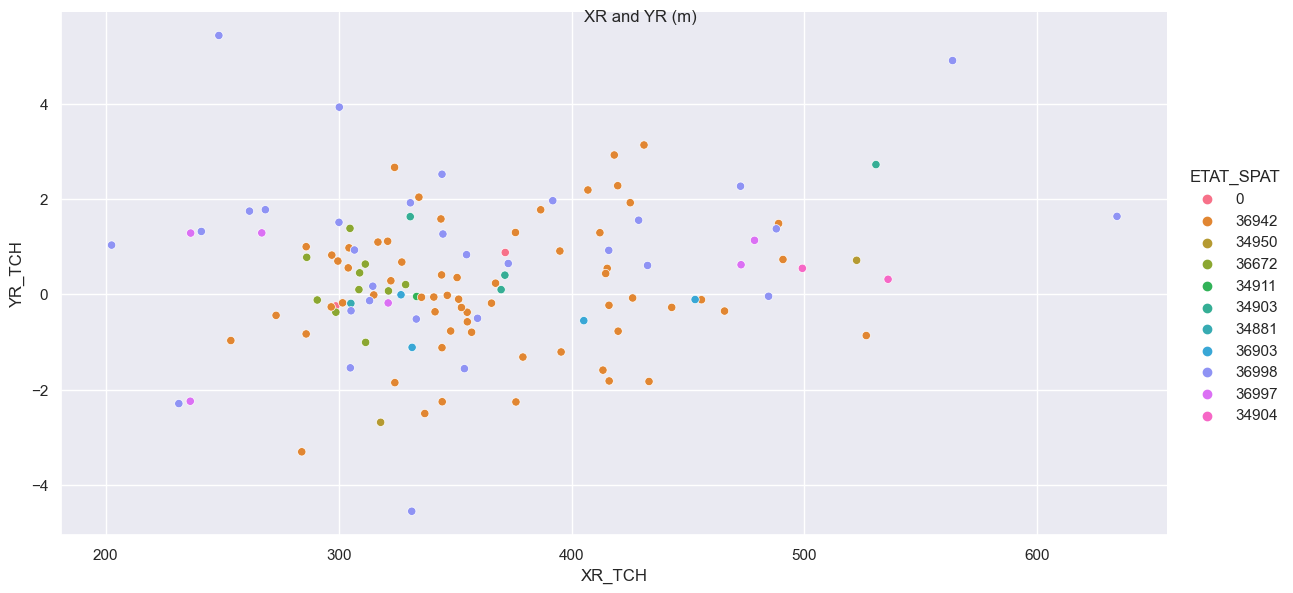

Min/Max Ximpact: 202 / 634 m
Min/Max Yimpact: -4 / 5 m


In [170]:
sns.pairplot(data=dataset,hue="ETAT_SPAT",x_vars="XR_TCH",y_vars="YR_TCH",size=6, aspect=2)
plt.suptitle('XR and YR (m)')
plt.grid(True)
plt.show()
print ('Min/Max Ximpact:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max Yimpact:',int(min(dataset['YR_TCH'])),'/',int(max(dataset['YR_TCH'])),'m')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


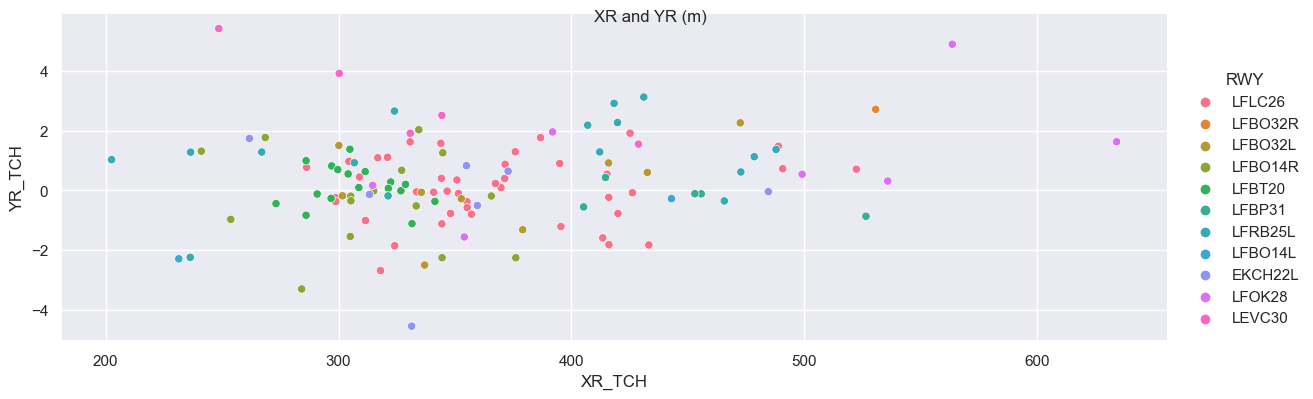

Min/Max Ximpact: 202 / 634 m
Min/Max Yimpact: -4 / 5 m


In [171]:
sns.pairplot(data=dataset,hue="RWY",x_vars="XR_TCH",y_vars="YR_TCH",size=4, aspect=3)
plt.suptitle('XR and YR (m)')
plt.grid(True)
plt.show()
print ('Min/Max Ximpact:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max Yimpact:',int(min(dataset['YR_TCH'])),'/',int(max(dataset['YR_TCH'])),'m')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


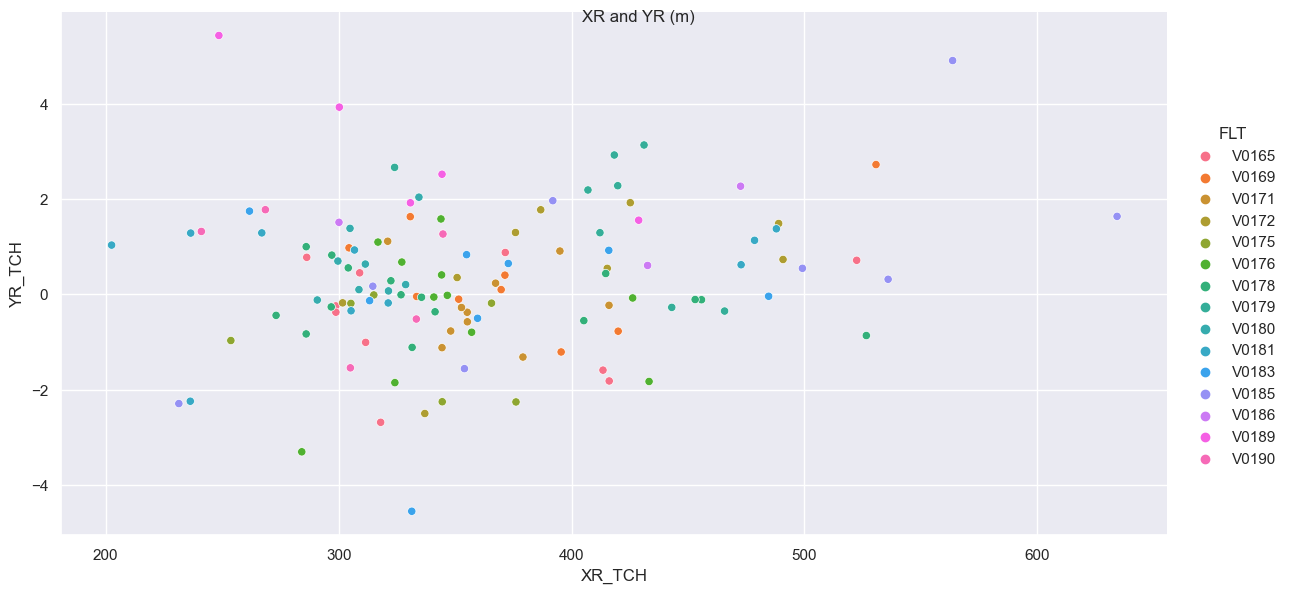

Min/Max Ximpact: 202 / 634 m
Min/Max Yimpact: -4 / 5 m


In [172]:
sns.pairplot(data=dataset,hue="FLT",x_vars="XR_TCH",y_vars="YR_TCH",size=6, aspect=2)
plt.suptitle('XR and YR (m)')
plt.grid(True)
plt.show()
print ('Min/Max Ximpact:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max Yimpact:',int(min(dataset['YR_TCH'])),'/',int(max(dataset['YR_TCH'])),'m')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


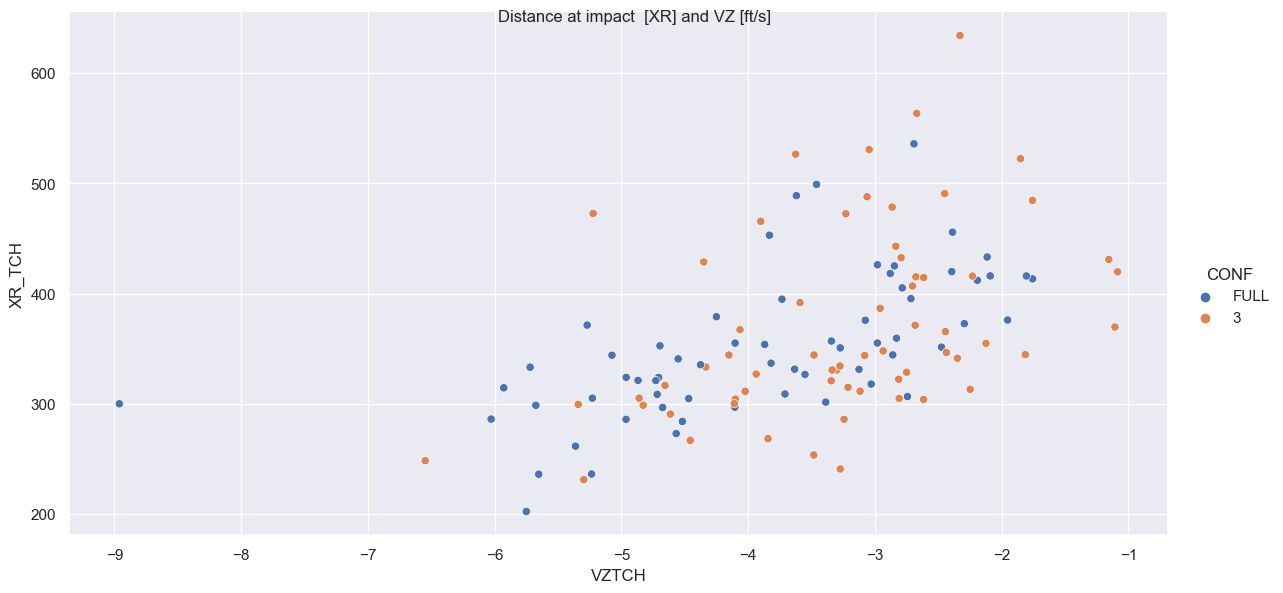

Min/Max experimented XR_TCH: 202 / 634 m
Min/Max Vzimpact: -8.9616 / -1.085 ft/s


In [173]:
sns.pairplot(data=dataset,hue="CONF",x_vars="VZTCH",y_vars="XR_TCH",size=6, aspect=2)
plt.suptitle('Distance at impact  [XR] and VZ [ft/s]')
plt.grid(True)
plt.show()
print ('Min/Max experimented XR_TCH:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max Vzimpact:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


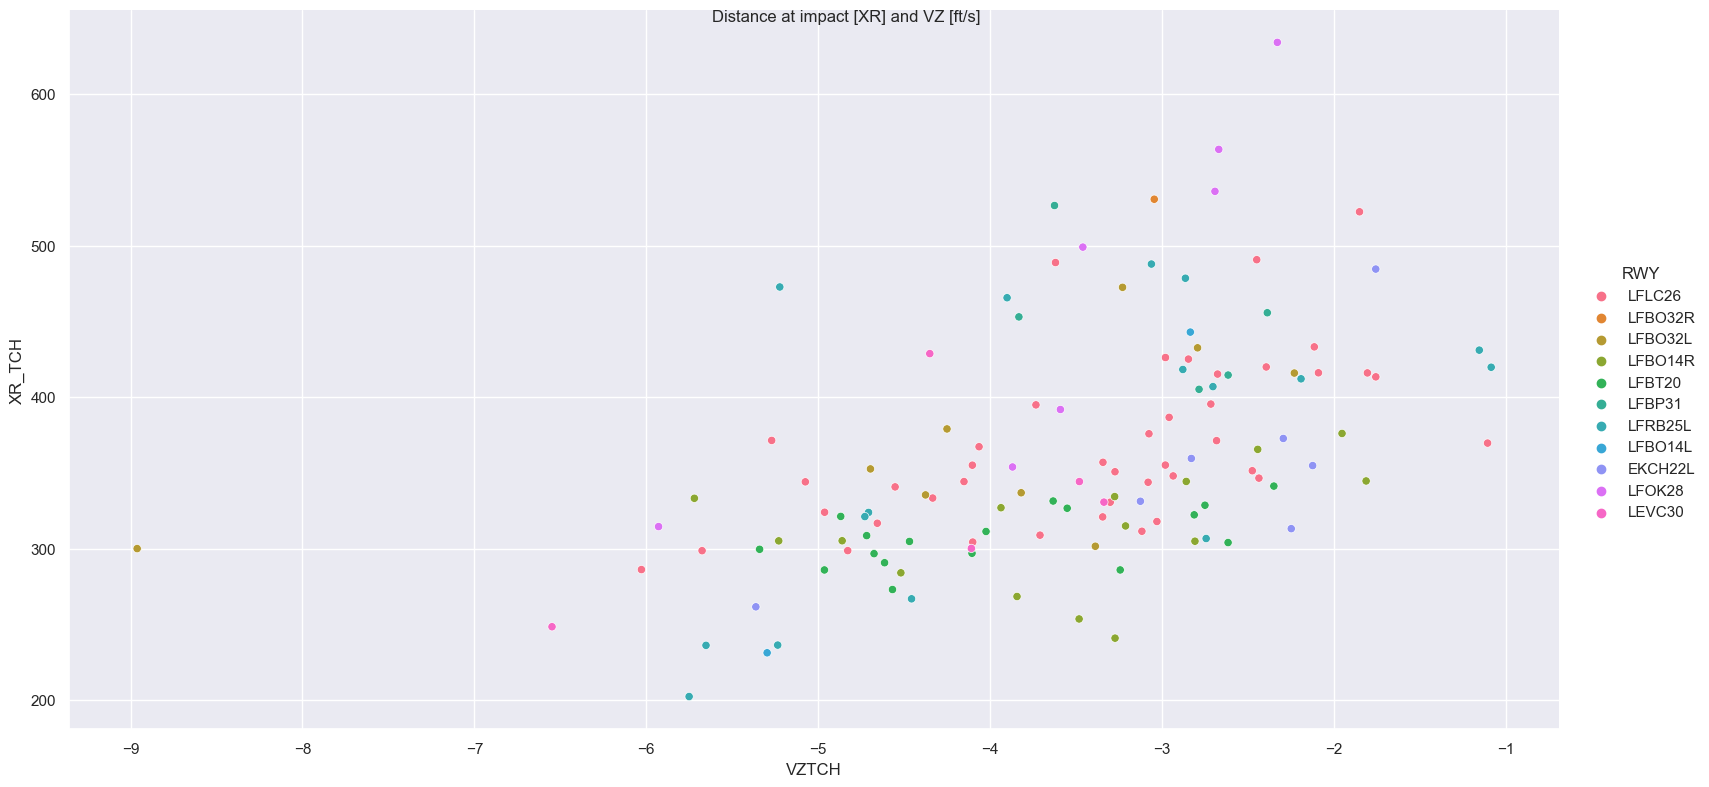

Min/Max experimented XR_TCH: 202 / 634 m
Min/Max experimented VZ: -8.9616 / -1.085 ft/s


In [174]:
sns.pairplot(data=dataset,hue="RWY",x_vars="VZTCH",y_vars="XR_TCH",size=8, aspect=2)
plt.suptitle('Distance at impact [XR] and VZ [ft/s]')
plt.grid(True)
plt.show()
print ('Min/Max experimented XR_TCH:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


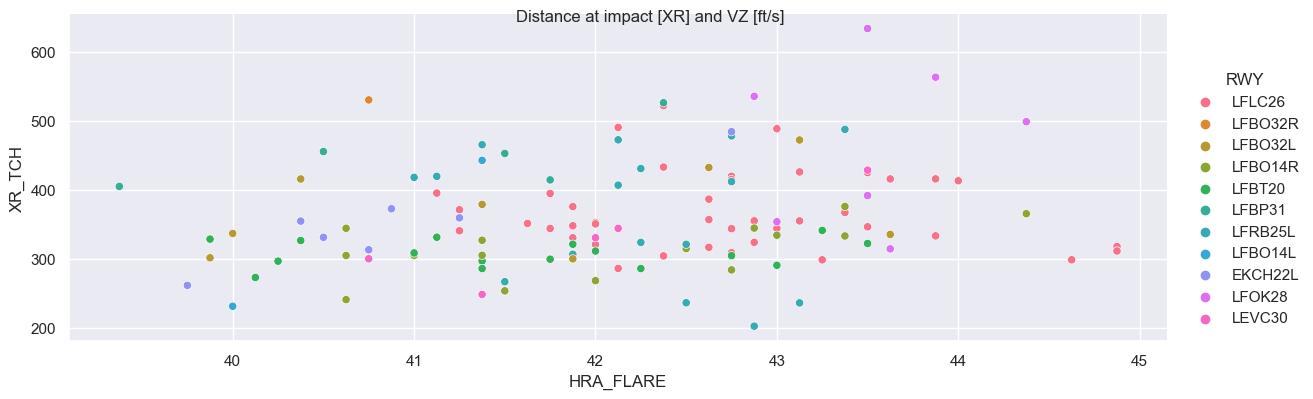

Min/Max experimented XR_TCH: 202 / 634 m
Min/Max experimented HRA_FLARE: 39.375 / 44.875 ft


In [175]:
sns.pairplot(data=dataset,hue="RWY",x_vars="HRA_FLARE",y_vars="XR_TCH",size=4, aspect=3)
plt.suptitle('Distance at impact [XR] and VZ [ft/s]')
plt.grid(True)
plt.show()
print ('Min/Max experimented XR_TCH:', int(min(dataset['XR_TCH'])),'/',int(max(dataset['XR_TCH'])),'m')
print ('Min/Max experimented HRA_FLARE:',(min(dataset['HRA_FLARE'])),'/',(max(dataset['HRA_FLARE'])),'ft')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


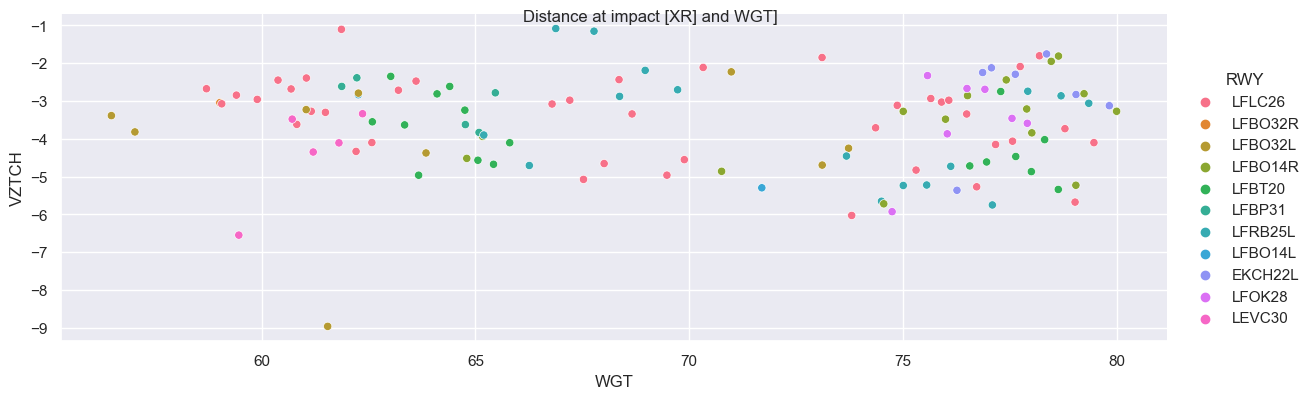

Min/Max experimented VZTCH: -8 / -1 ft/s
Min/Max experimented WGT: 56.4842 / 79.997 tons


In [176]:
sns.pairplot(data=dataset,hue="RWY",x_vars="WGT",y_vars="VZTCH",size=4, aspect=3)
plt.suptitle('Distance at impact [XR] and WGT]')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZTCH:', int(min(dataset['VZTCH'])),'/',int(max(dataset['VZTCH'])),'ft/s')
print ('Min/Max experimented WGT:',(min(dataset['WGT'])),'/',(max(dataset['WGT'])),'tons')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


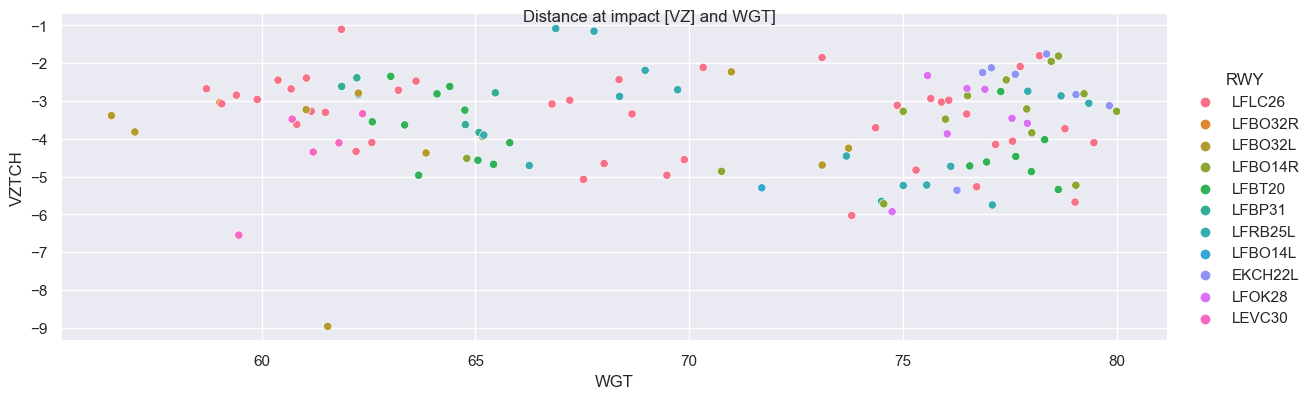

Min/Max experimented XR_TCH: -8 / -1 m
Min/Max experimented WGT: 56.4842 / 79.997 tons


In [177]:
sns.pairplot(data=dataset,hue="RWY",x_vars="WGT",y_vars="VZTCH",size=4, aspect=3)
plt.suptitle('Distance at impact [VZ] and WGT]')
plt.grid(True)
plt.show()
print ('Min/Max experimented XR_TCH:', int(min(dataset['VZTCH'])),'/',int(max(dataset['VZTCH'])),'m')
print ('Min/Max experimented WGT:',(min(dataset['WGT'])),'/',(max(dataset['WGT'])),'tons')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


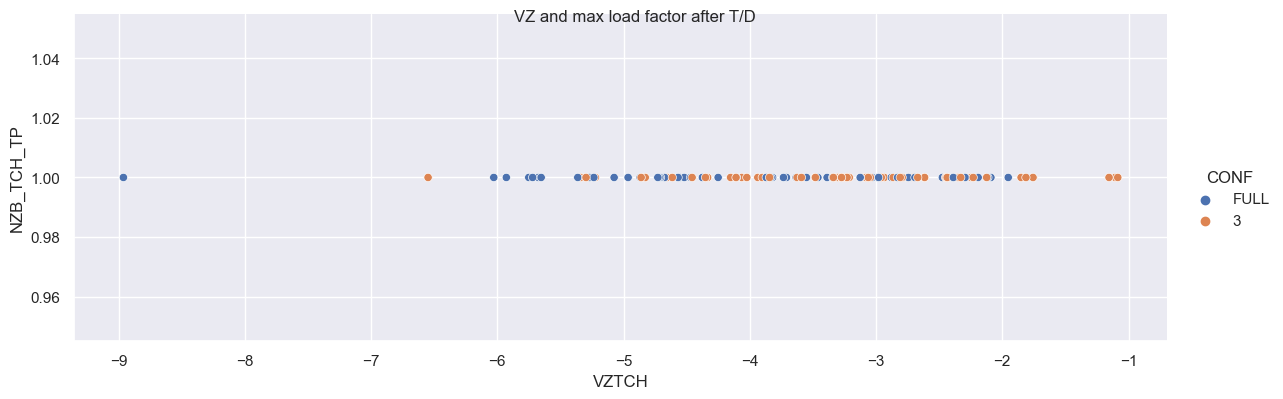

Min/Max experimented NZ: 1.0 / 1.0 g
Min/Max experimented VZ: -8.9616 / -1.085 ft/s


In [178]:
sns.pairplot(data=dataset,hue="CONF",x_vars="VZTCH",y_vars="NZB_TCH_TP",size=4, aspect=3)
plt.suptitle('VZ and max load factor after T/D')
plt.grid(True)
plt.show()
print ('Min/Max experimented NZ:', (min(dataset["NZB_TCH_TP"])),'/',(max(dataset["NZB_TCH_TP"])),'g')
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


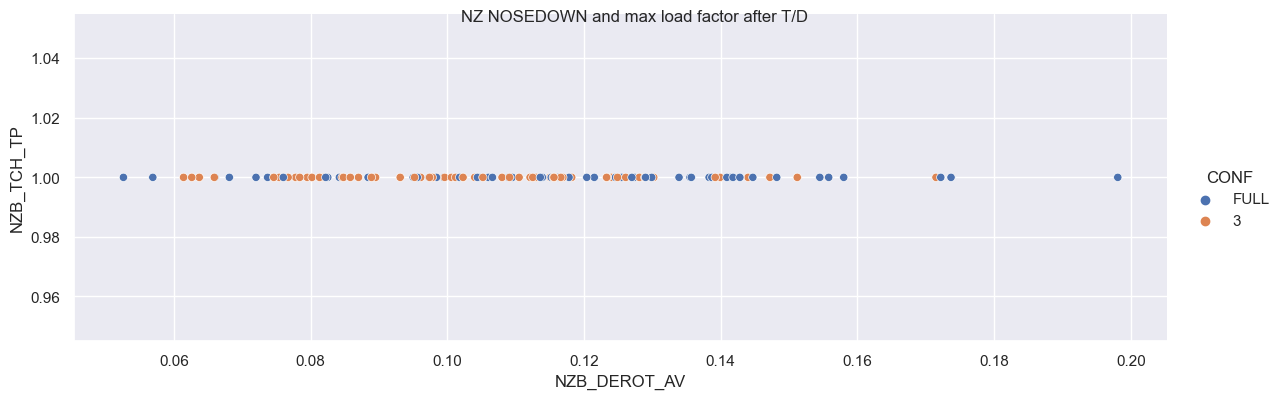

Min/Max experimented NZ: 1.0 / 1.0 g
Min/Max experimented NZ NOSE DOWN: 0.0526 / 0.1981 g


In [179]:
sns.pairplot(data=dataset,hue="CONF",x_vars="NZB_DEROT_AV",y_vars="NZB_TCH_TP",size=4, aspect=3)
plt.suptitle('NZ NOSEDOWN and max load factor after T/D')
plt.grid(True)
plt.show()
print ('Min/Max experimented NZ:', (min(dataset["NZB_TCH_TP"])),'/',(max(dataset["NZB_TCH_TP"])),'g')
print ('Min/Max experimented NZ NOSE DOWN:',(min(dataset['NZB_DEROT_AV'])),'/',(max(dataset['NZB_DEROT_AV'])),'g')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


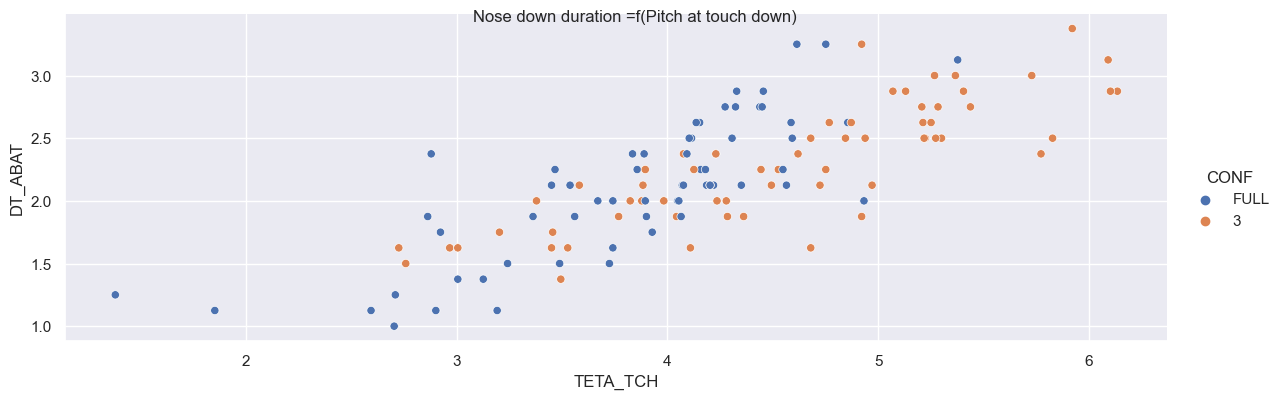

Min/Max nosedown duration: 1.0 / 3.375 s
Min/Max Pitch: 1.3788 / 6.1359 deg


In [180]:
sns.pairplot(data=dataset,hue="CONF",x_vars="TETA_TCH",y_vars="DT_ABAT",size=4, aspect=3)
plt.suptitle('Nose down duration =f(Pitch at touch down)')
plt.grid(True)
plt.show()
print ('Min/Max nosedown duration:', (min(dataset["DT_ABAT"])),'/',(max(dataset["DT_ABAT"])),'s')
print ('Min/Max Pitch:',(min(dataset['TETA_TCH'])),'/',(max(dataset['TETA_TCH'])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


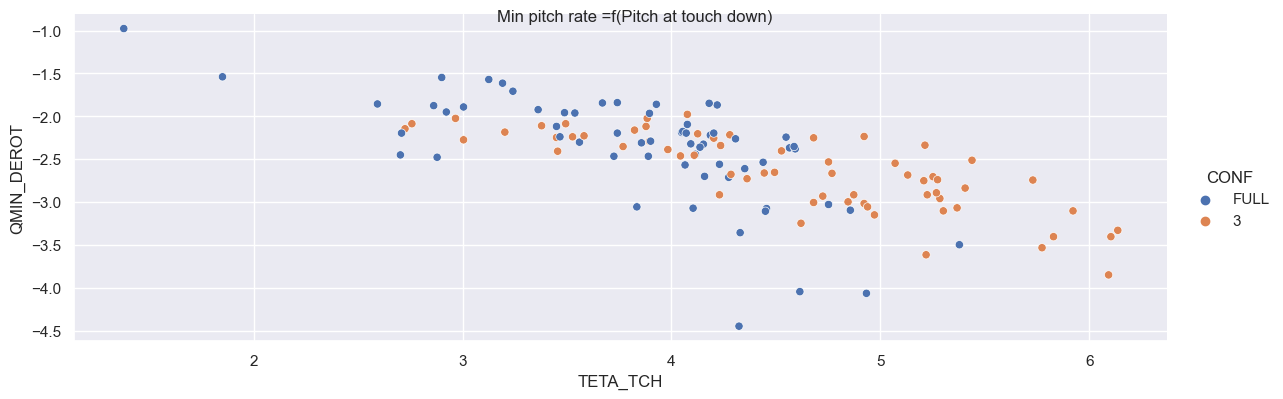

Min/Max nosedown pitch rate: -4.4453 / -0.9766 deg/s
Min/Max Pitch: 1.3788 / 6.1359 deg


In [181]:
sns.pairplot(data=dataset,hue="CONF",x_vars="TETA_TCH",y_vars="QMIN_DEROT",size=4, aspect=3)
plt.suptitle('Min pitch rate =f(Pitch at touch down)')
plt.grid(True)
plt.show()
print ('Min/Max nosedown pitch rate:', (min(dataset["QMIN_DEROT"])),'/',(max(dataset["QMIN_DEROT"])),'deg/s')
print ('Min/Max Pitch:',(min(dataset['TETA_TCH'])),'/',(max(dataset['TETA_TCH'])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


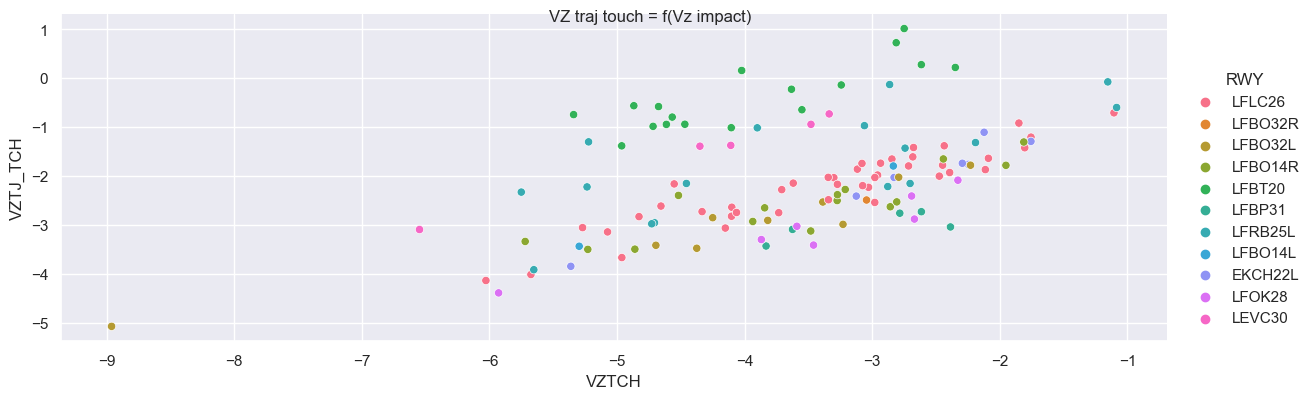

Min/Max experimented VZ traj touch: -5.0776 / 1.0161 ft/s
Min/Max experimented VZ: -8.9616 / -1.085 ft/s


In [183]:
sns.pairplot(data=dataset,hue="RWY",x_vars="VZTCH",y_vars="VZTJ_TCH",size=4, aspect=3)
plt.suptitle('VZ traj touch = f(Vz impact)')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZ traj touch:', (min(dataset["VZTJ_TCH"])),'/',(max(dataset["VZTJ_TCH"])),'ft/s')
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


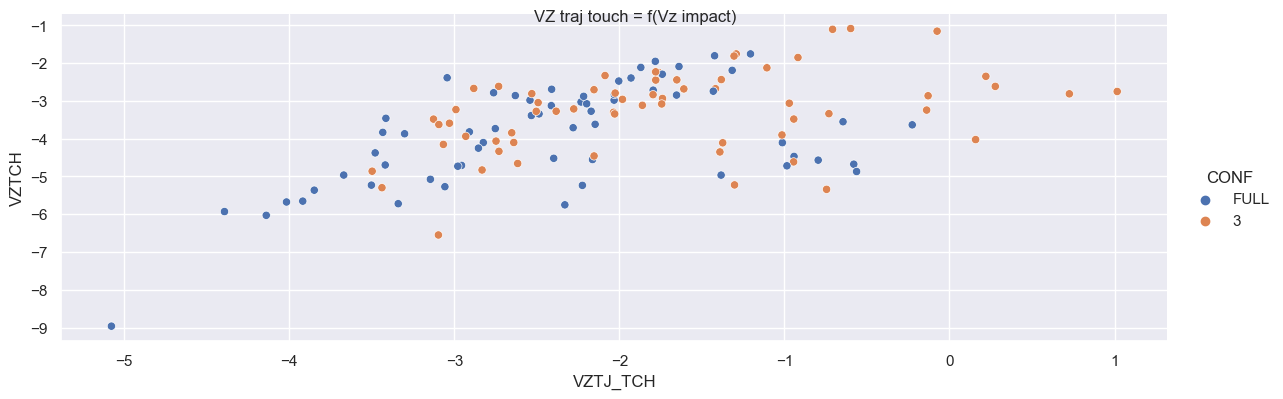

Min/Max experimented VZ traj touch: -5.0776 / 1.0161 ft/s
Min/Max experimented VZ: -8.9616 / -1.085 ft/s


In [184]:
sns.pairplot(data=dataset,hue="CONF",x_vars="VZTJ_TCH",y_vars="VZTCH",size=4, aspect=3)
plt.suptitle('VZ traj touch = f(Vz impact)')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZ traj touch:', (min(dataset["VZTJ_TCH"])),'/',(max(dataset["VZTJ_TCH"])),'ft/s')
print ('Min/Max experimented VZ:',(min(dataset['VZTCH'])),'/',(max(dataset['VZTCH'])),'ft/s')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


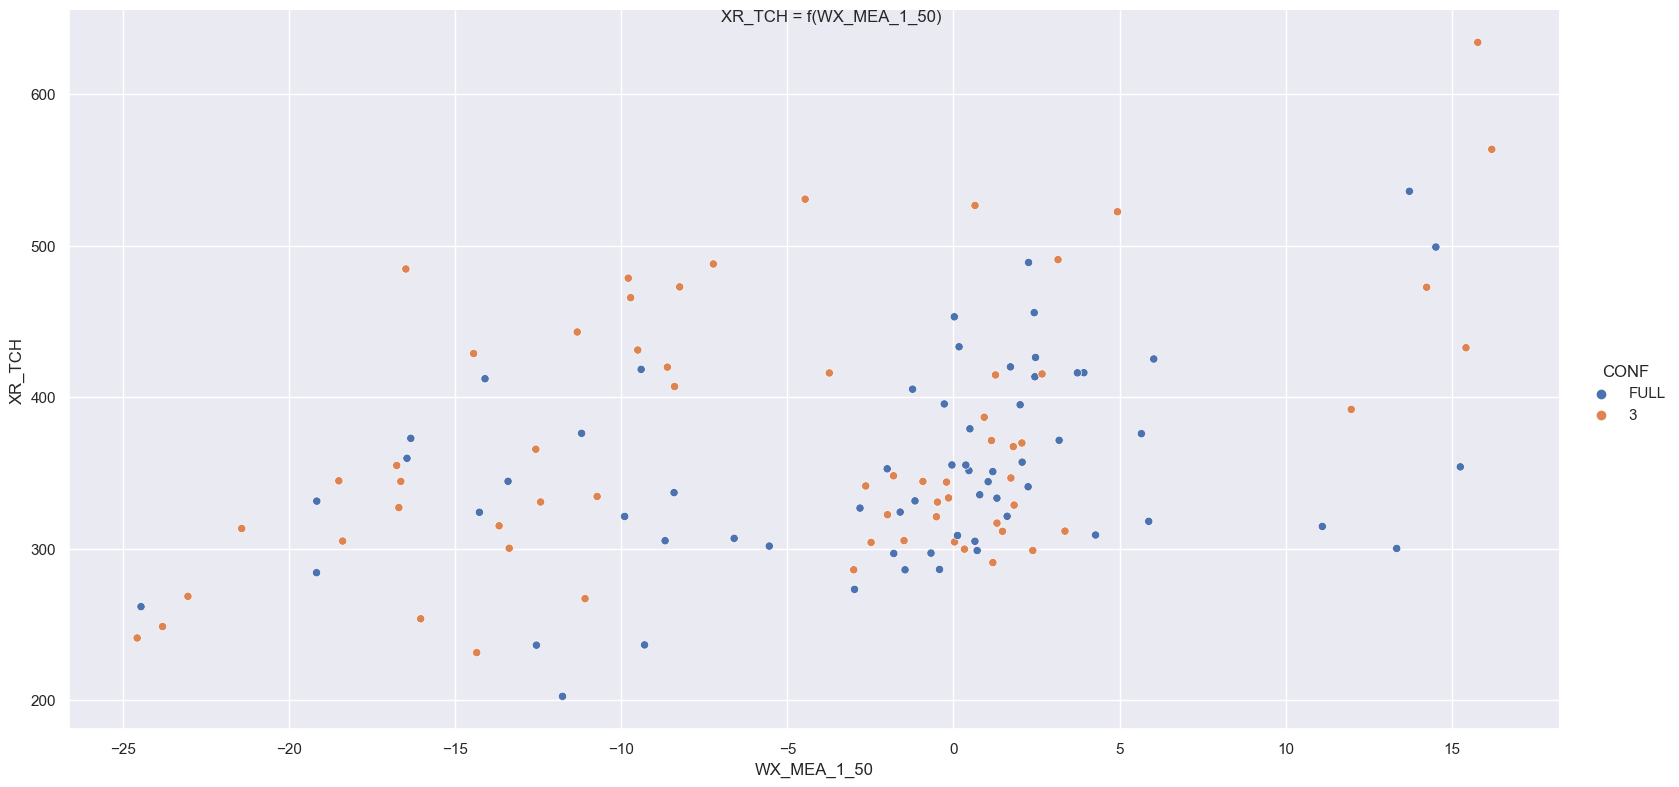

Min/Max experimented VZ traj touch: 202.4969 / 634.2339 ft/s
Min/Max experimented Wind: -24.5856 / 16.2116 kt


In [185]:
sns.pairplot(data=dataset,hue="CONF",x_vars="WX_MEA_1_50",y_vars="XR_TCH",size=8, aspect=2)
plt.suptitle('XR_TCH = f(WX_MEA_1_50)')
plt.grid(True)
plt.show()
print ('Min/Max experimented VZ traj touch:', (min(dataset["XR_TCH"])),'/',(max(dataset["XR_TCH"])),'ft/s')
print ('Min/Max experimented Wind:',(min(dataset['WX_MEA_1_50'])),'/',(max(dataset['WX_MEA_1_50'])),'kt')

In [186]:
print (dataset['WX_MEA_1_50'],dataset['WY_MEA_1_50'])

0       0.7132
1       2.4512
2       3.9272
3       3.1820
4       5.8799
        ...   
126   -24.5856
127   -18.3978
128   -18.5126
129   -23.0578
133     1.3078
Name: WX_MEA_1_50, Length: 126, dtype: float64 0      2.2816
1      3.9962
2      2.9747
3      7.1491
4      9.1898
        ...  
126   -8.8155
127   -6.9216
128   -6.5419
129   -5.3734
133    7.7754
Name: WY_MEA_1_50, Length: 126, dtype: float64


C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


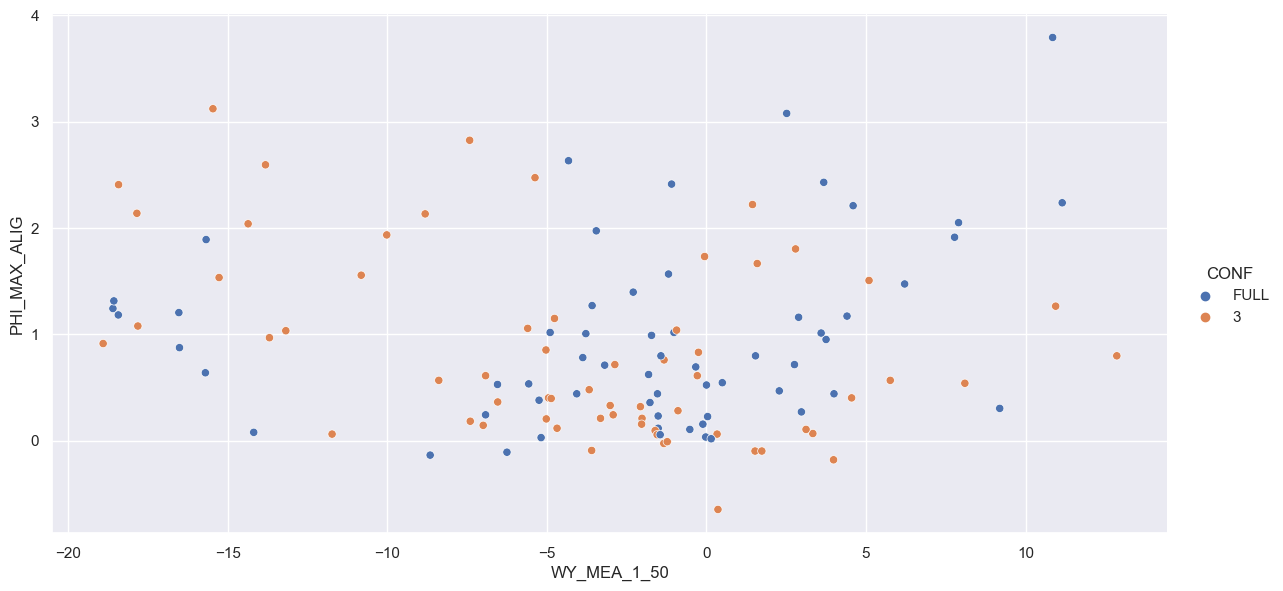

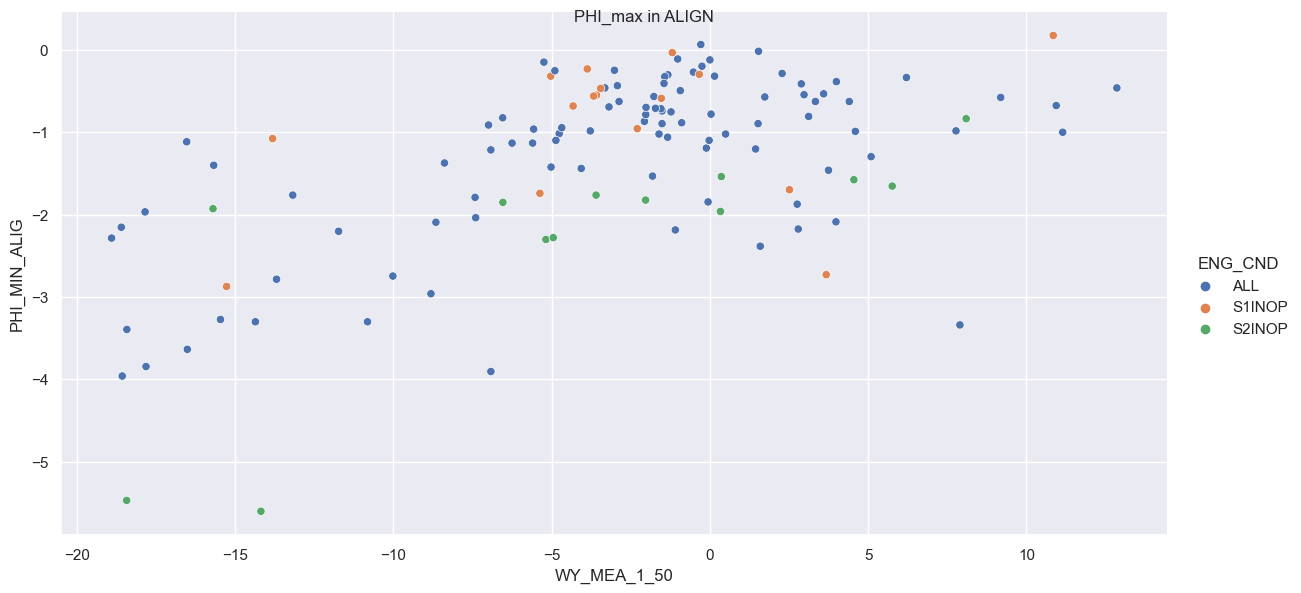

Min/Max experimented PHI: -5.603 / 3.7903 deg


In [187]:
sns.pairplot(data=dataset,hue="CONF",x_vars="WY_MEA_1_50",y_vars="PHI_MAX_ALIG",size=6, aspect=2)
sns.pairplot(data=dataset,hue="ENG_CND",x_vars="WY_MEA_1_50",y_vars="PHI_MIN_ALIG",size=6, aspect=2)
plt.suptitle('PHI_max in ALIGN')
plt.grid(True)
plt.show()
print ('Min/Max experimented PHI:', (min(dataset["PHI_MIN_ALIG"])),'/',(max(dataset["PHI_MAX_ALIG"])),'deg')


C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


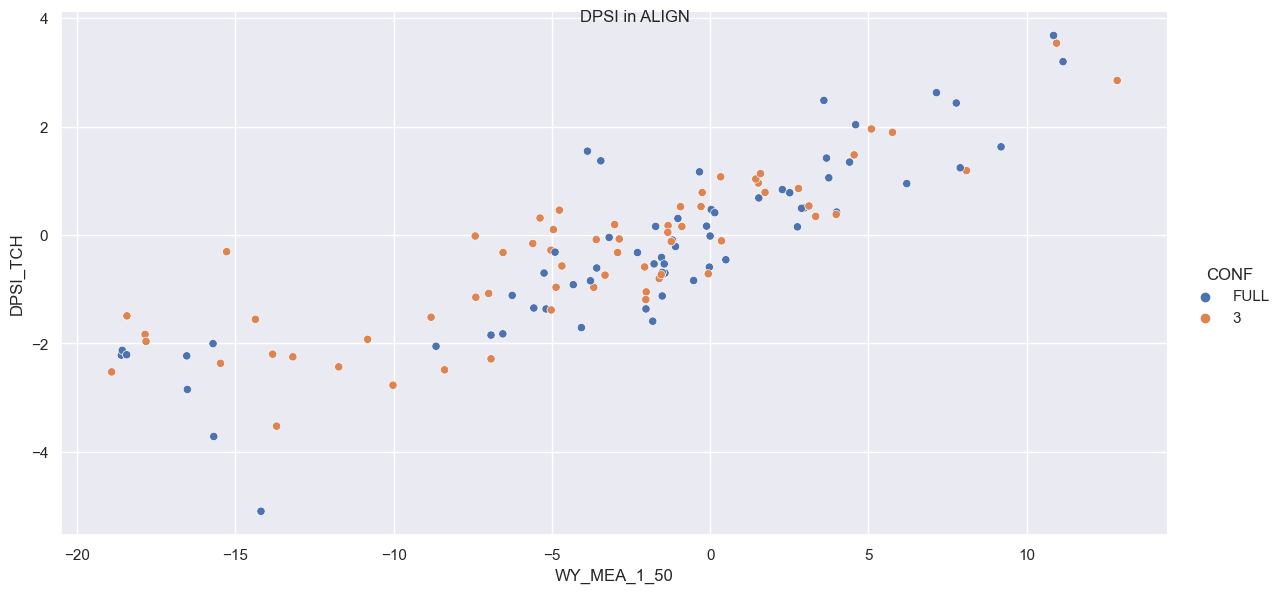

Min/Max experimented DPSI ALIGN: -9.847 / 6.0699 deg
Min/Max experimented DPSI TOUCH: -5.098 / 3.681 deg


In [188]:
sns.pairplot(data=dataset,hue="CONF",x_vars="WY_MEA_1_50",y_vars="DPSI_TCH",size=6, aspect=2)
plt.suptitle('DPSI in ALIGN')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI ALIGN:', (min(dataset["DPSI_ALIG"])),'/',(max(dataset["DPSI_ALIG"])),'deg')
print ('Min/Max experimented DPSI TOUCH:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_TCH"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


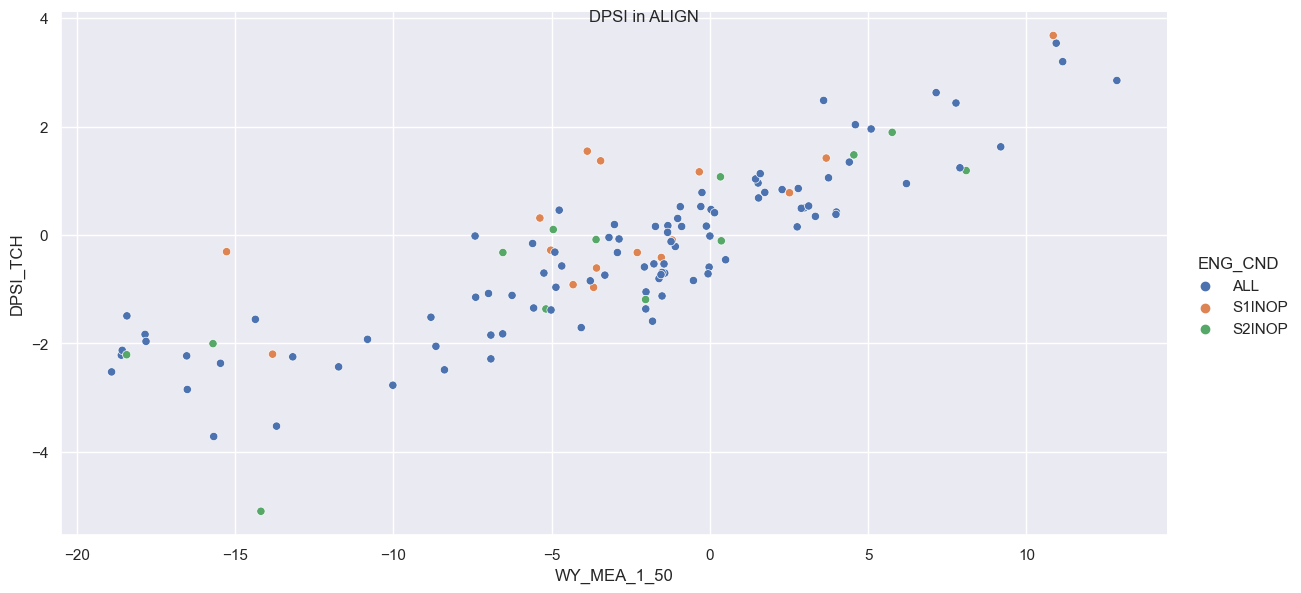

Min/Max experimented DPSI ALIGN: -9.847 / 6.0699 deg
Min/Max experimented DPSI TOUCH: -5.098 / 3.681 deg


In [189]:

sns.pairplot(data=dataset,hue="ENG_CND",x_vars="WY_MEA_1_50",y_vars="DPSI_TCH",size=6, aspect=2)
plt.suptitle('DPSI in ALIGN')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI ALIGN:', (min(dataset["DPSI_ALIG"])),'/',(max(dataset["DPSI_ALIG"])),'deg')
print ('Min/Max experimented DPSI TOUCH:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_TCH"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


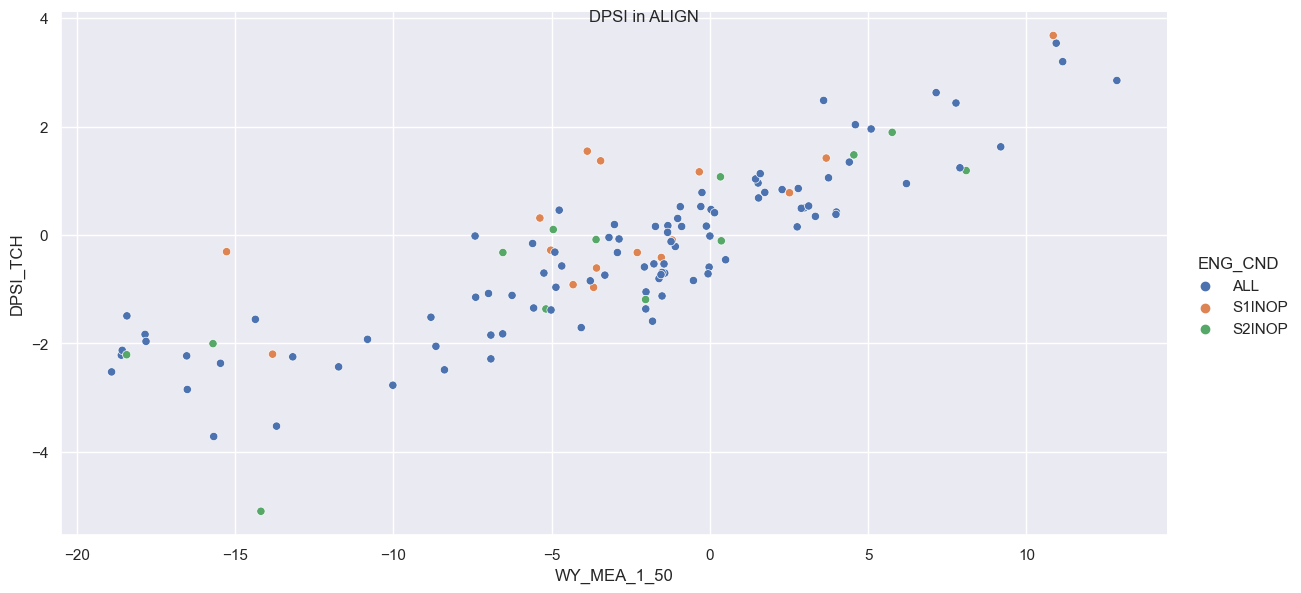

Min/Max experimented DPSI ALIGN: -9.847 / 6.0699 deg
Min/Max experimented DPSI TOUCH: -5.098 / 3.681 deg


In [190]:
sns.pairplot(data=dataset,hue="ENG_CND",x_vars="WY_MEA_1_50",y_vars="DPSI_TCH",size=6, aspect=2)
plt.suptitle('DPSI in ALIGN')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI ALIGN:', (min(dataset["DPSI_ALIG"])),'/',(max(dataset["DPSI_ALIG"])),'deg')
print ('Min/Max experimented DPSI TOUCH:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_TCH"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


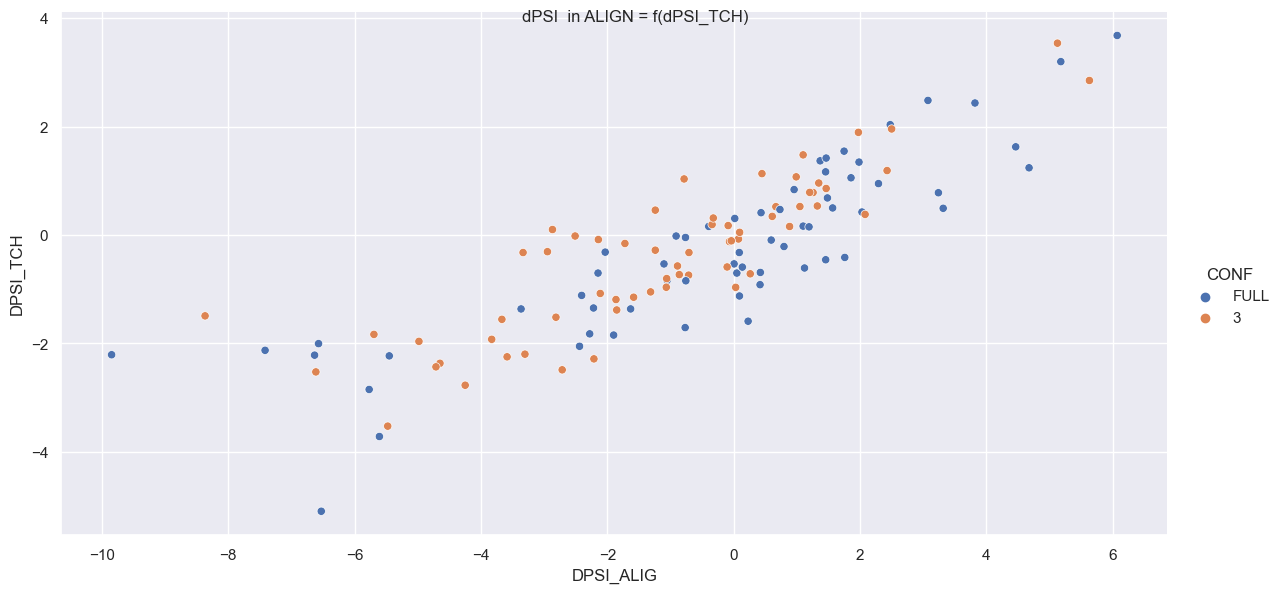

Min/Max experimented PHI: -5.098 / 6.0699 deg


In [191]:
sns.pairplot(data=dataset,hue="CONF",x_vars="DPSI_ALIG",y_vars="DPSI_TCH",size=6, aspect=2)

plt.suptitle('dPSI  in ALIGN = f(dPSI_TCH)')
plt.grid(True)
plt.show()
print ('Min/Max experimented PHI:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_ALIG"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


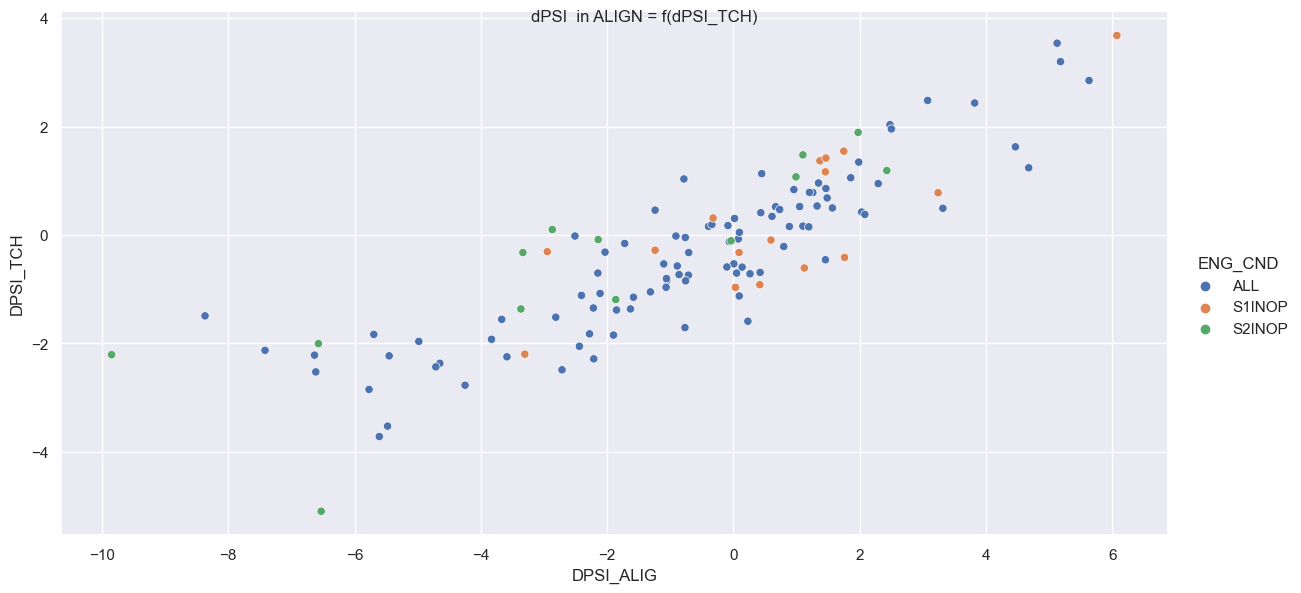

Min/Max experimented DPSI: -5.098 / 6.0699 deg


In [192]:
sns.pairplot(data=dataset,hue="ENG_CND",x_vars="DPSI_ALIG",y_vars="DPSI_TCH",size=6, aspect=2)

plt.suptitle('dPSI  in ALIGN = f(dPSI_TCH)')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_ALIG"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


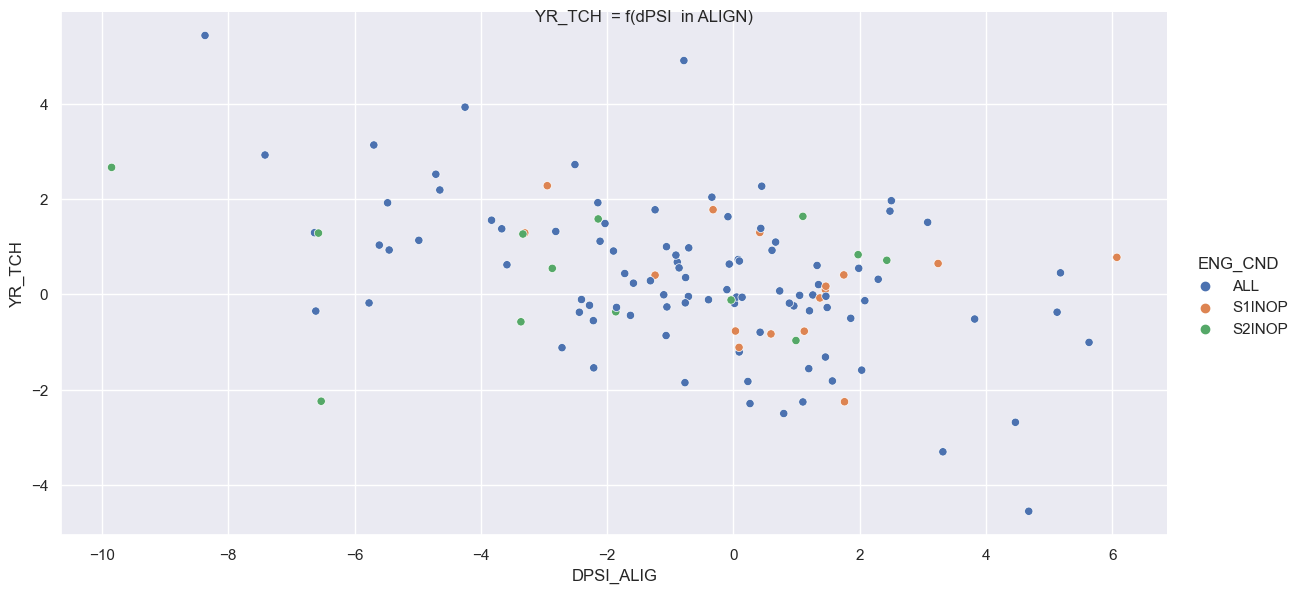

Min/Max experimented DPSI: -5.098 / 6.0699 deg


In [193]:
sns.pairplot(data=dataset,hue="ENG_CND",x_vars="DPSI_ALIG",y_vars="YR_TCH",size=6, aspect=2)

plt.suptitle('YR_TCH  = f(dPSI  in ALIGN)')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_ALIG"])),'deg')

C:\ProgramData\MiniforgeEnvs\test_analysis.env\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


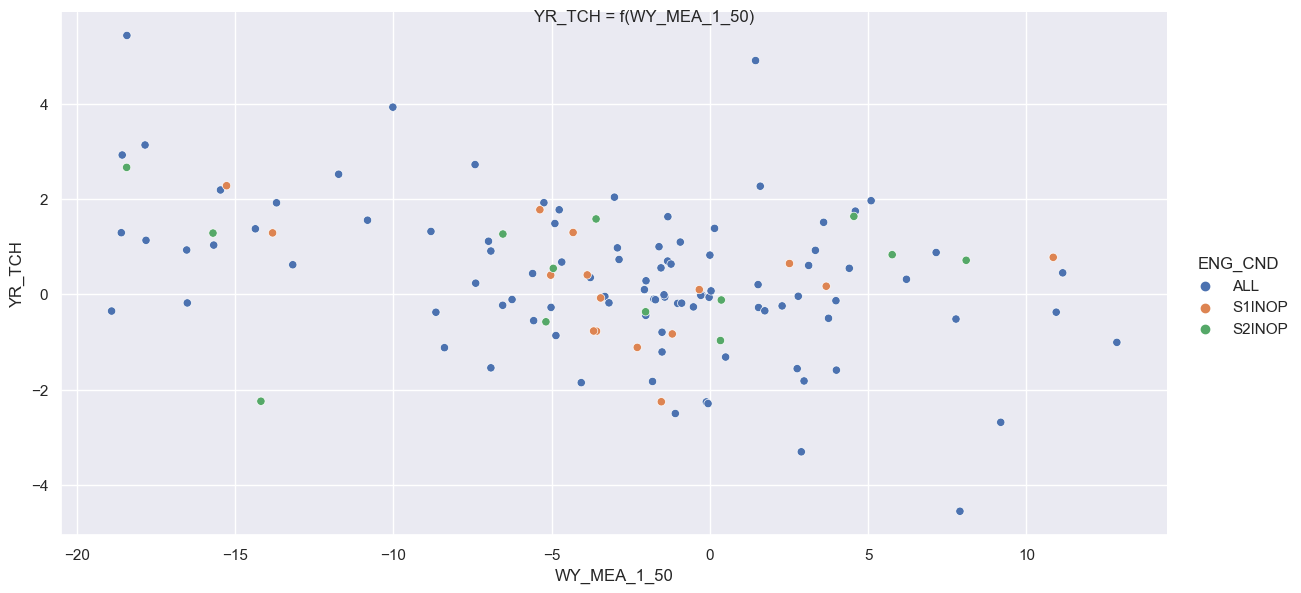

Min/Max experimented DPSI: -5.098 / 6.0699 deg


In [194]:
sns.pairplot(data=dataset,hue="ENG_CND",x_vars="WY_MEA_1_50",y_vars="YR_TCH",size=6, aspect=2)

plt.suptitle('YR_TCH = f(WY_MEA_1_50)')
plt.grid(True)
plt.show()
print ('Min/Max experimented DPSI:', (min(dataset["DPSI_TCH"])),'/',(max(dataset["DPSI_ALIG"])),'deg')


In [195]:
print (liste)

['AC_NB', 'AP', 'ATHR', 'BDR_COMMENTS', 'BRAKE', 'BULLE_SPAT', 'CAT_ATT', 'CG', 'CGZ', 'COMMENTS', 'CONF', 'CONF_LOCSTAR', 'CREW', 'CTF', 'DATE_ESSAI', 'DATE_EXPLOIT', 'DED_H_GA', 'DED_WGT_CG', 'DED_WIND', 'DENSITY_ALT', 'DH_GA', 'DIST_LOCSTAR', 'DPSI_ALIG', 'DPSI_TCH', 'DT_50_TCH', 'DT_ABAT', 'DT_FLARE', 'DTRK_LOCSTAR', 'DVC_100', 'DVC_200', 'DVC_300', 'DVC_400', 'DVC_50', 'DVC_500', 'DVC_MAX_5_50', 'DVC_MEA_5_50', 'DVC_MIN_5_50', 'DVC_TCH', 'DVC_X0', 'DVC_X60', 'ENG', 'ENG_CND', 'ETAT_SPAT', 'EXP_NB', 'FLT', 'GMT_REF', 'GS_100', 'GS_200', 'GS_300', 'GS_400', 'GS_500', 'GS_MAX_2_1', 'GS_MAX_3_1', 'GS_MAX_3_2', 'GS_MAX_5_1', 'GSPD_AP_OFF', 'GSPD_LOCSTAR', 'GSPD_NWTCH', 'GSPD_TCH', 'GSPD_YR_MAX', 'H_FLARE', 'H_GA', 'H_MIN_GA', 'HRA_FLARE', 'HRA_GA', 'HRA_X0', 'HRA_X60', 'LOC_100', 'LOC_200', 'LOC_300', 'LOC_400', 'LOC_50', 'LOC_500', 'LOC_MAX_1_T', 'LOC_MAX_2_1', 'LOC_MAX_3_1', 'LOC_MAX_3_15', 'LOC_MAX_3_2', 'LOC_MAX_3_50', 'LOC_MAX_3_T', 'LOC_MAX_5_15', 'LOC_NWTCH', 'LOC_TCH', 'LOC_X0'

In [196]:

liste_FLARE=["XR_TCH",'VZTCH','WX_MEA_1_50','RWY','ETAT_SPAT','WGT','CG','CONF']


In [214]:
dataset_flare=dataset[liste_FLARE]
dataset_flare=dataset_flare[dataset_flare.ETAT_SPAT=='36942']

In [215]:
dataset_flare.describe()

XR_TCH      VZTCH  WX_MEA_1_50        WGT         CG
count   63.000000  63.000000    63.000000  63.000000  63.000000
mean   366.704510  -3.296967    -2.887692  68.193541  27.957727
std     58.354997   0.992362     6.244302   6.591292  10.931224
min    253.702100  -5.340700   -19.183900  56.484200  12.017400
25%    324.073050  -4.102000    -8.407900  63.403900  16.044150
50%    352.722200  -3.211900    -0.277800  66.878600  25.227800
75%    414.995750  -2.615350     1.512200  75.328450  40.289650
max    526.562800  -1.085000     6.031400  79.466500  41.851200

In [216]:
sns.set_theme(font_scale=0.8)

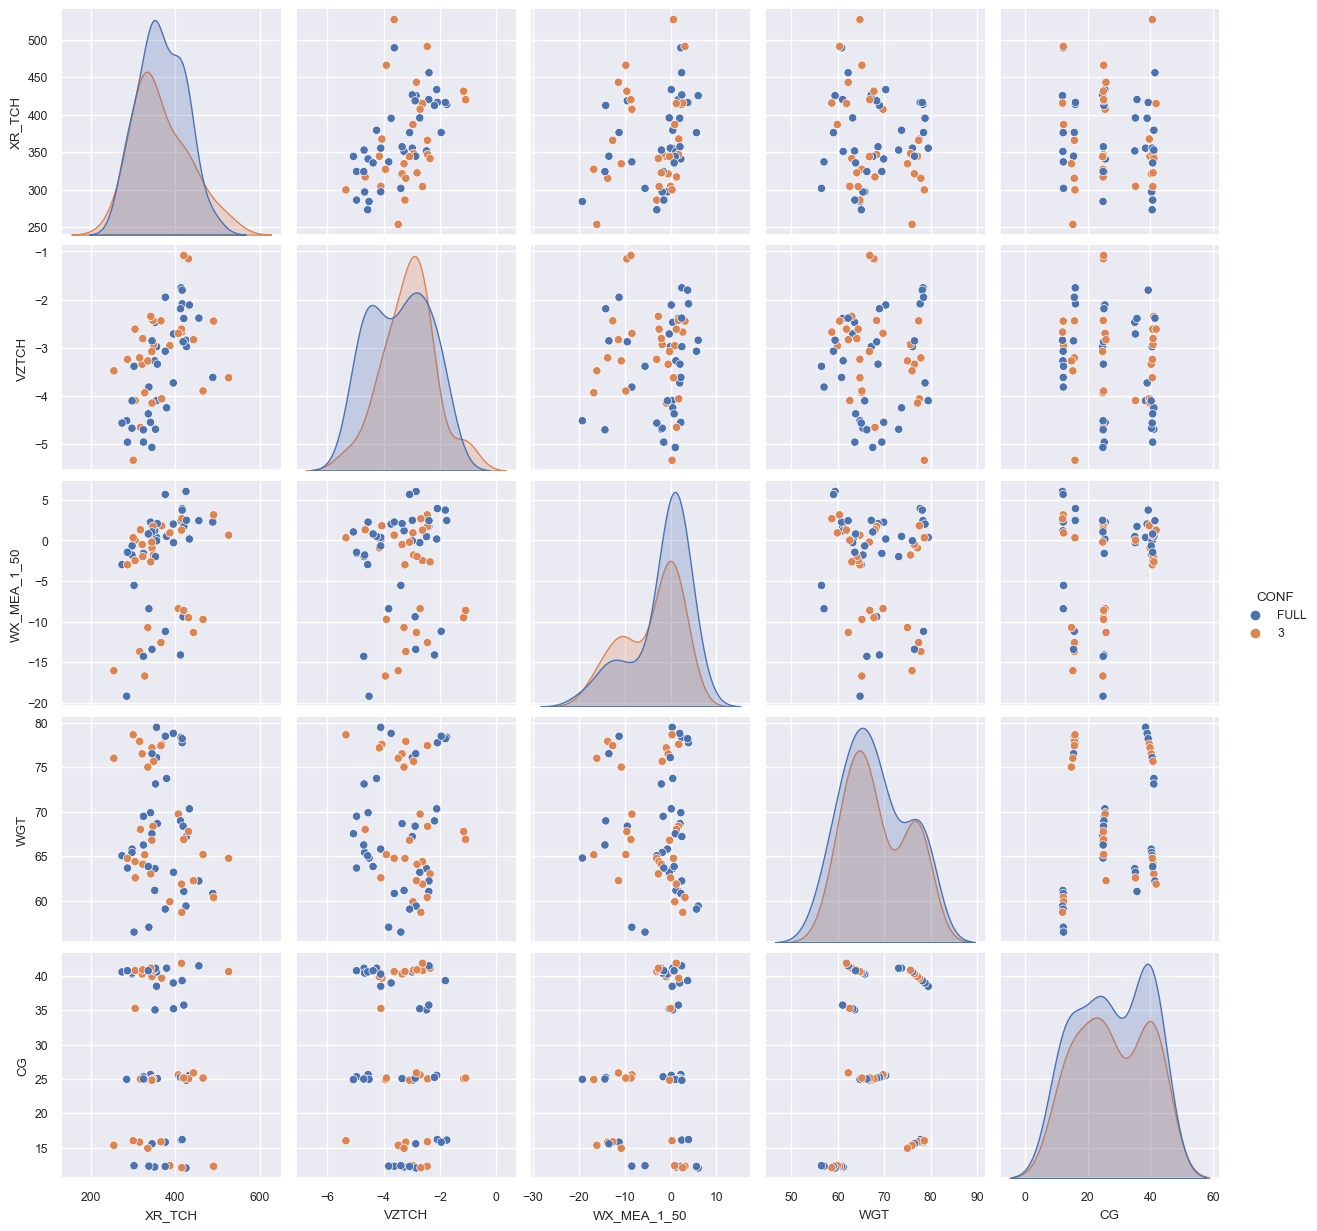

In [219]:
sns.pairplot(dataset_flare, hue="CONF")
plt.show()

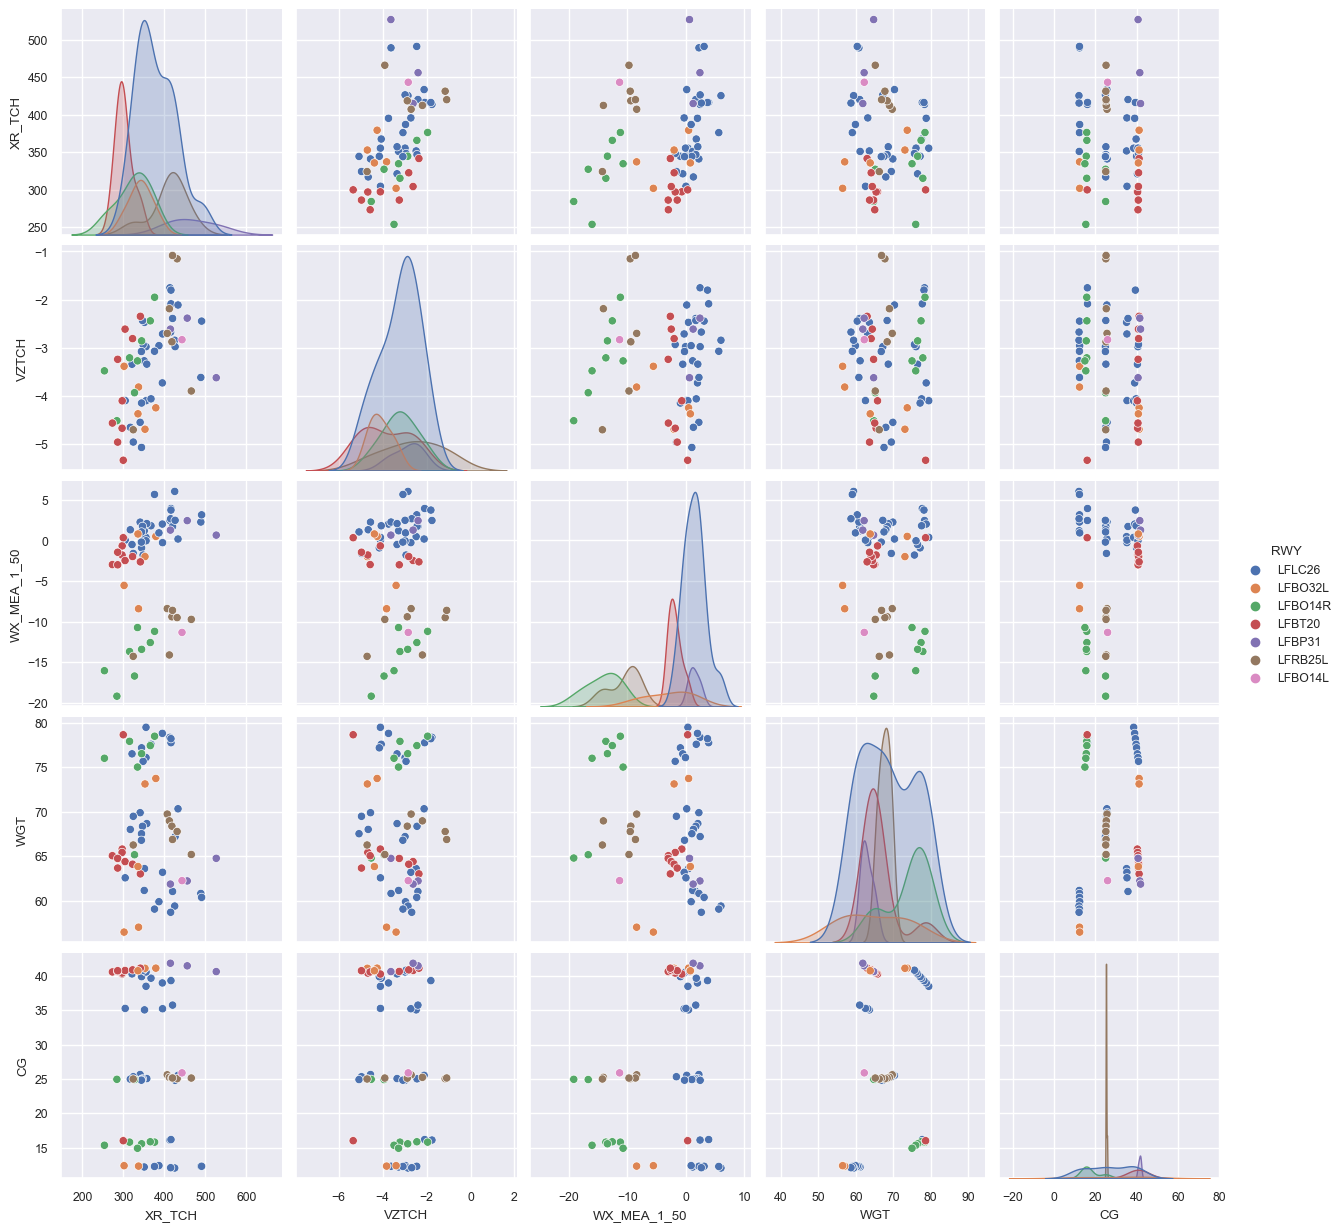

In [220]:
sns.pairplot(dataset_flare, hue="RWY")
plt.show()

In [233]:
dataset_flare_flat=dataset_flare[(dataset_flare["RWY"]!='LFBT20')&((dataset_flare["RWY"]!='LFBP31'))]
dataset_flare_uphill=dataset_flare[dataset_flare["RWY"]=="LFBT20"]
dataset_flare_downhill=dataset_flare[dataset_flare["RWY"]=="LFBP31"]
#dataset_locstar_conf3orF=dataset_locstar[(dataset_locstar["CONF_LOCSTAR"]=="3+S")| (dataset_locstar["CONF_LOCSTAR"]=='FULL')]

In [244]:
sns.set_theme(font_scale=1.2)

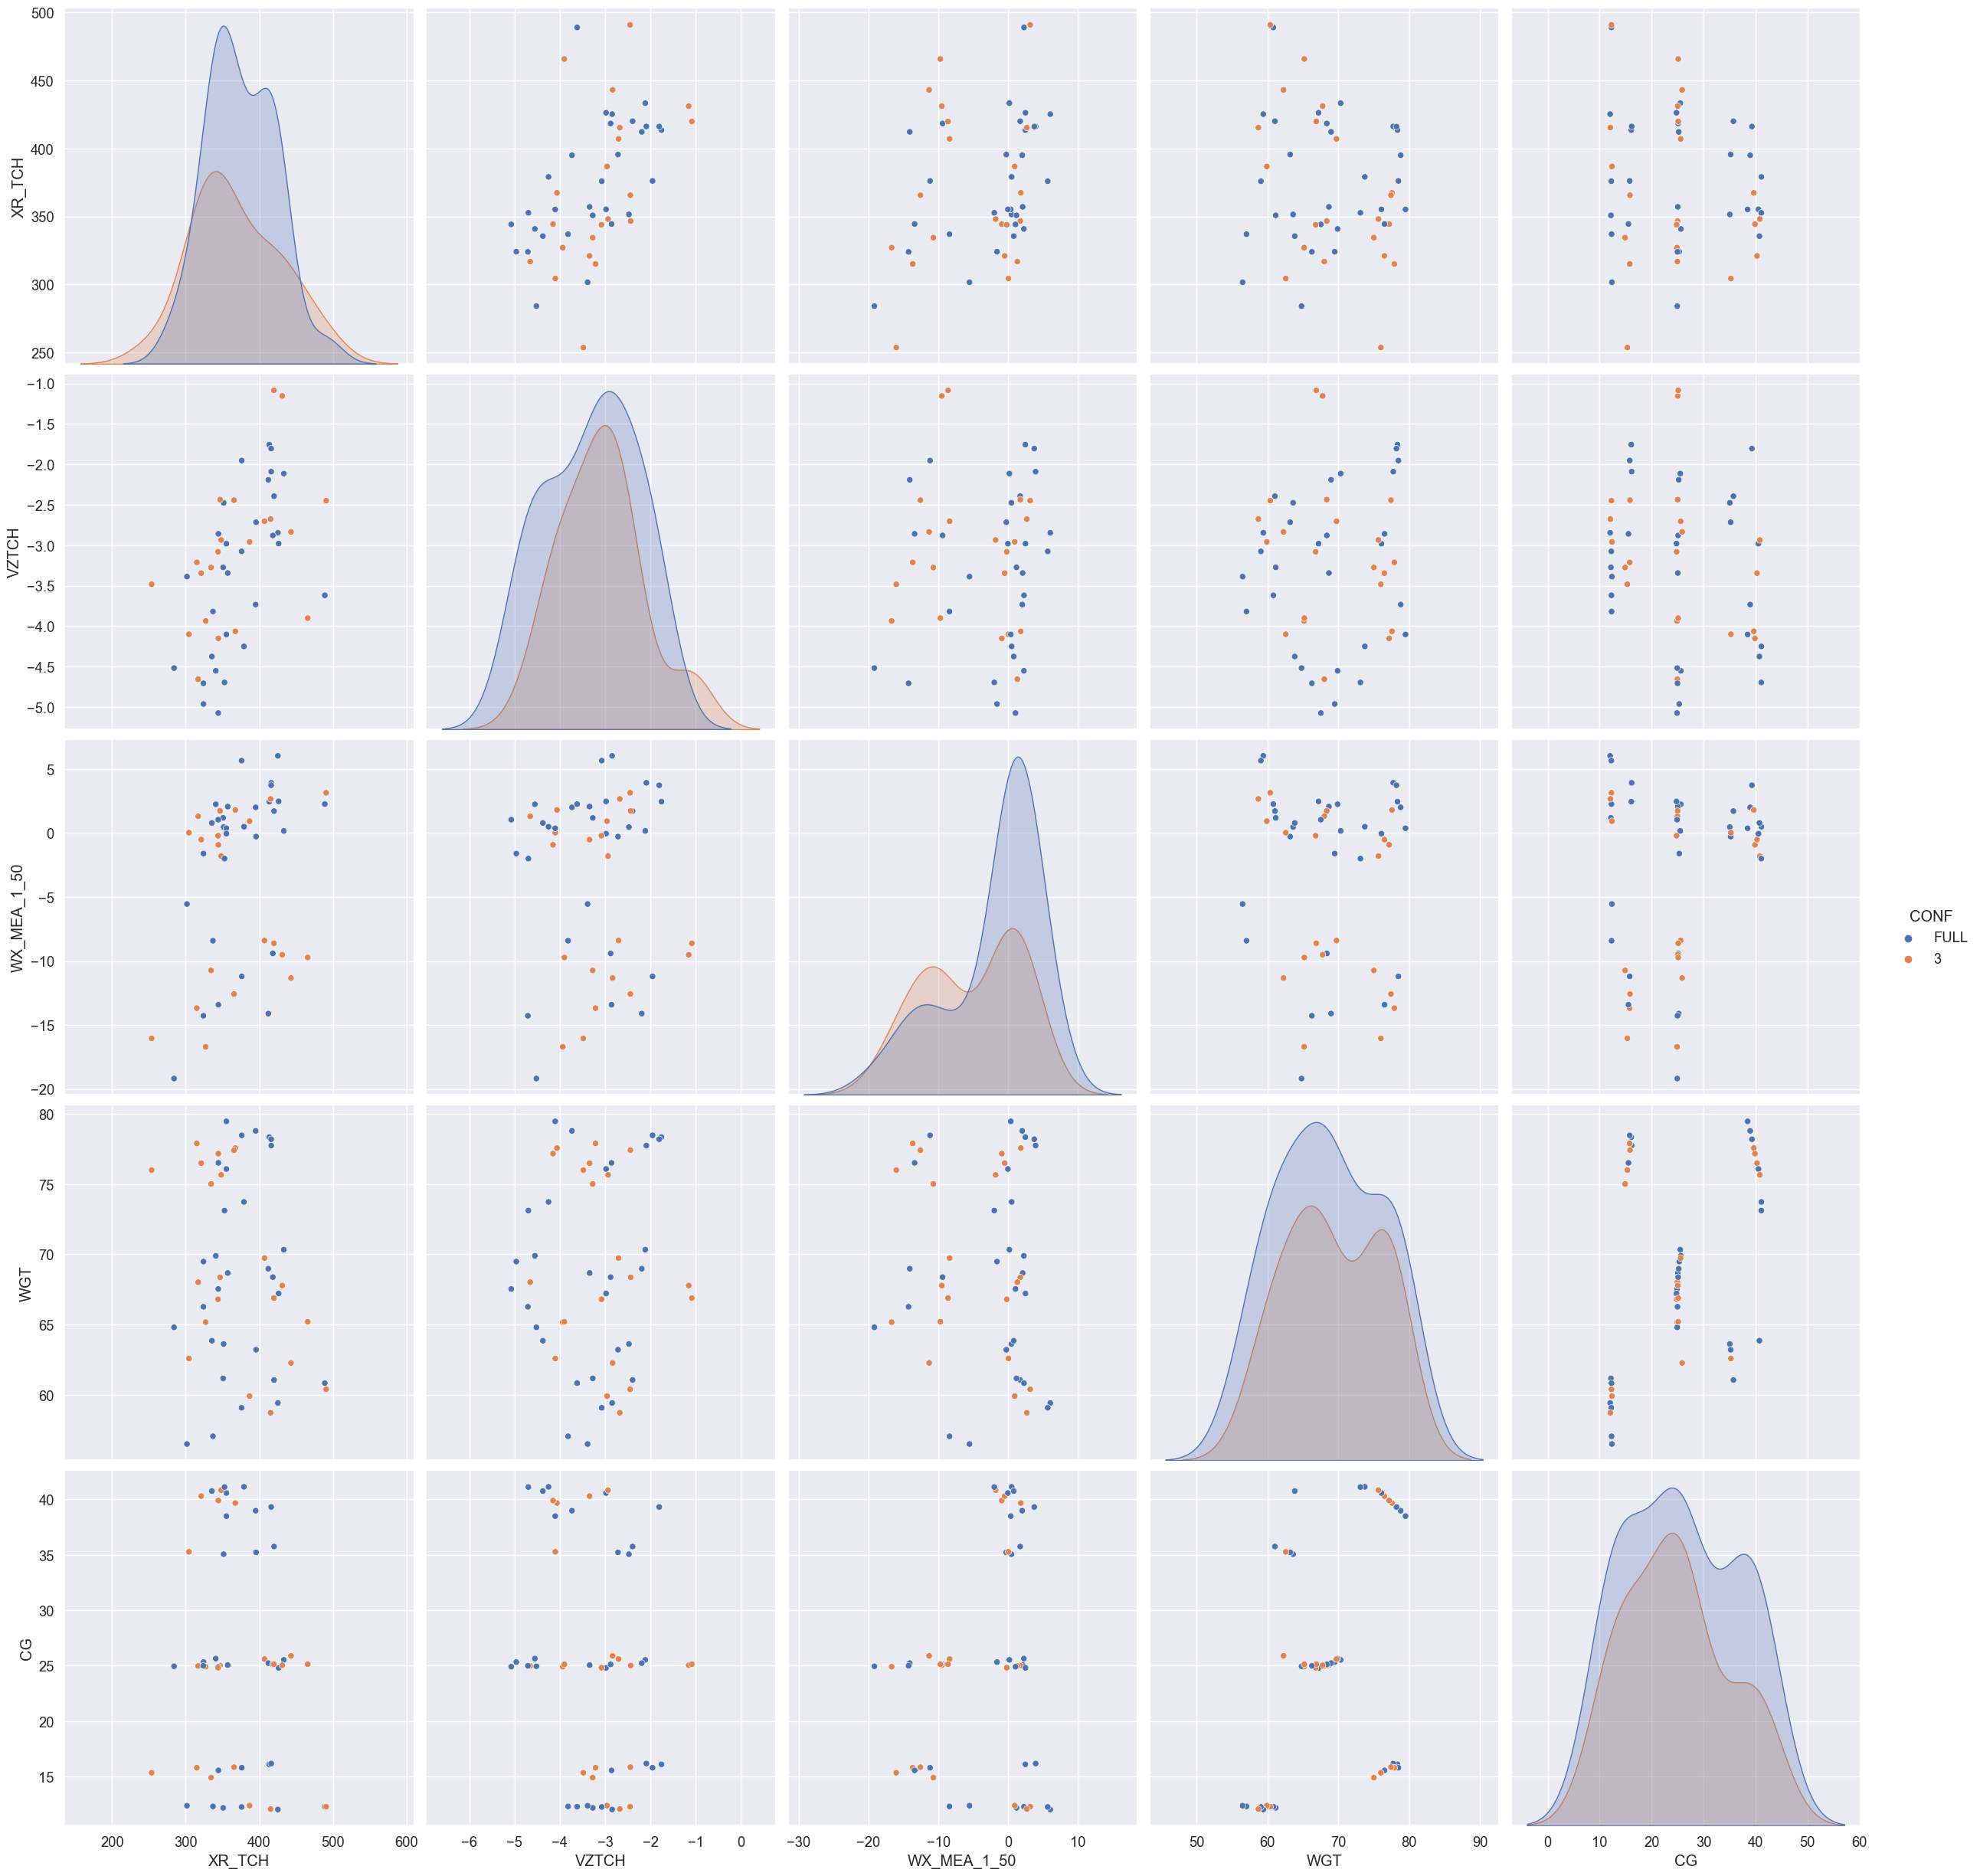

In [245]:
sns.pairplot(dataset_flare_flat, hue="CONF",height=5)
plt.show()

conf full a bit firmer than conf 3 with no correlation with wind / wgt / Cg

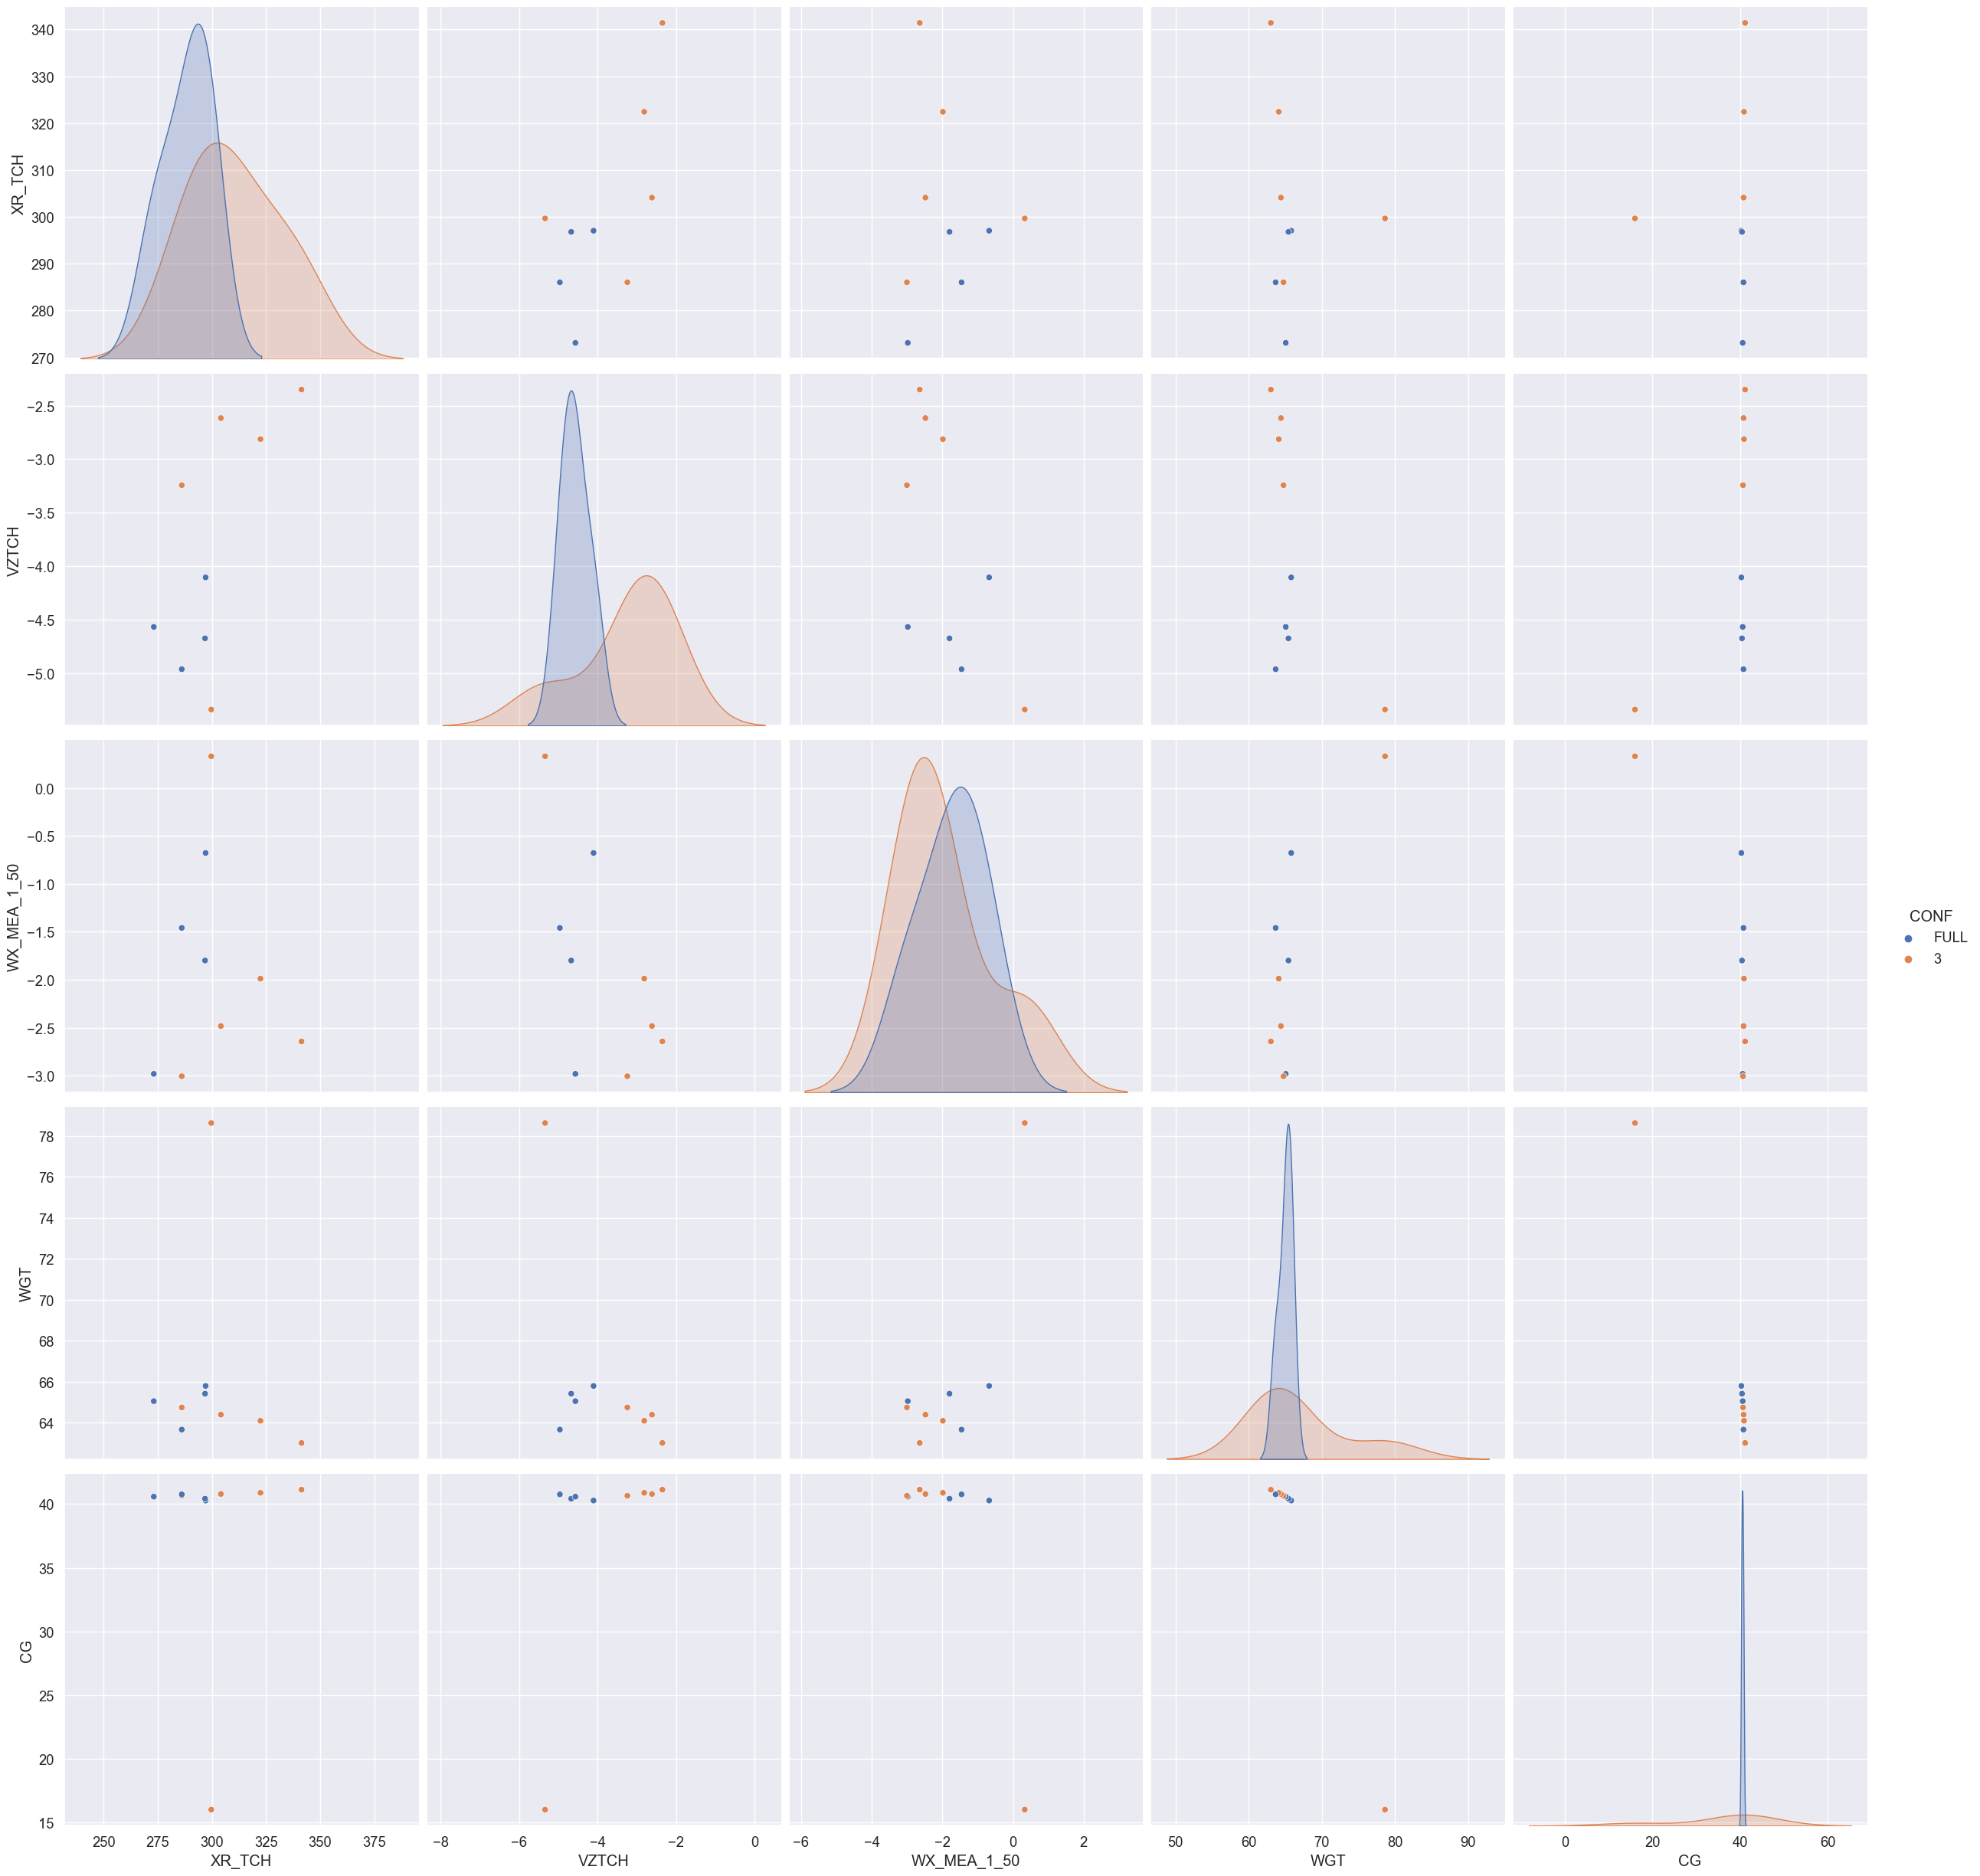

In [246]:
sns.pairplot(dataset_flare_uphill, hue="CONF",height=5)
plt.show()

on uphill runway, there is a configuration effect whereas conf full is shorter / firmer than conf 3; especially the VZ criterion to not exceed firm landing in more than 10% of the cases is not met for conf full (all tests below -4 ft/s)

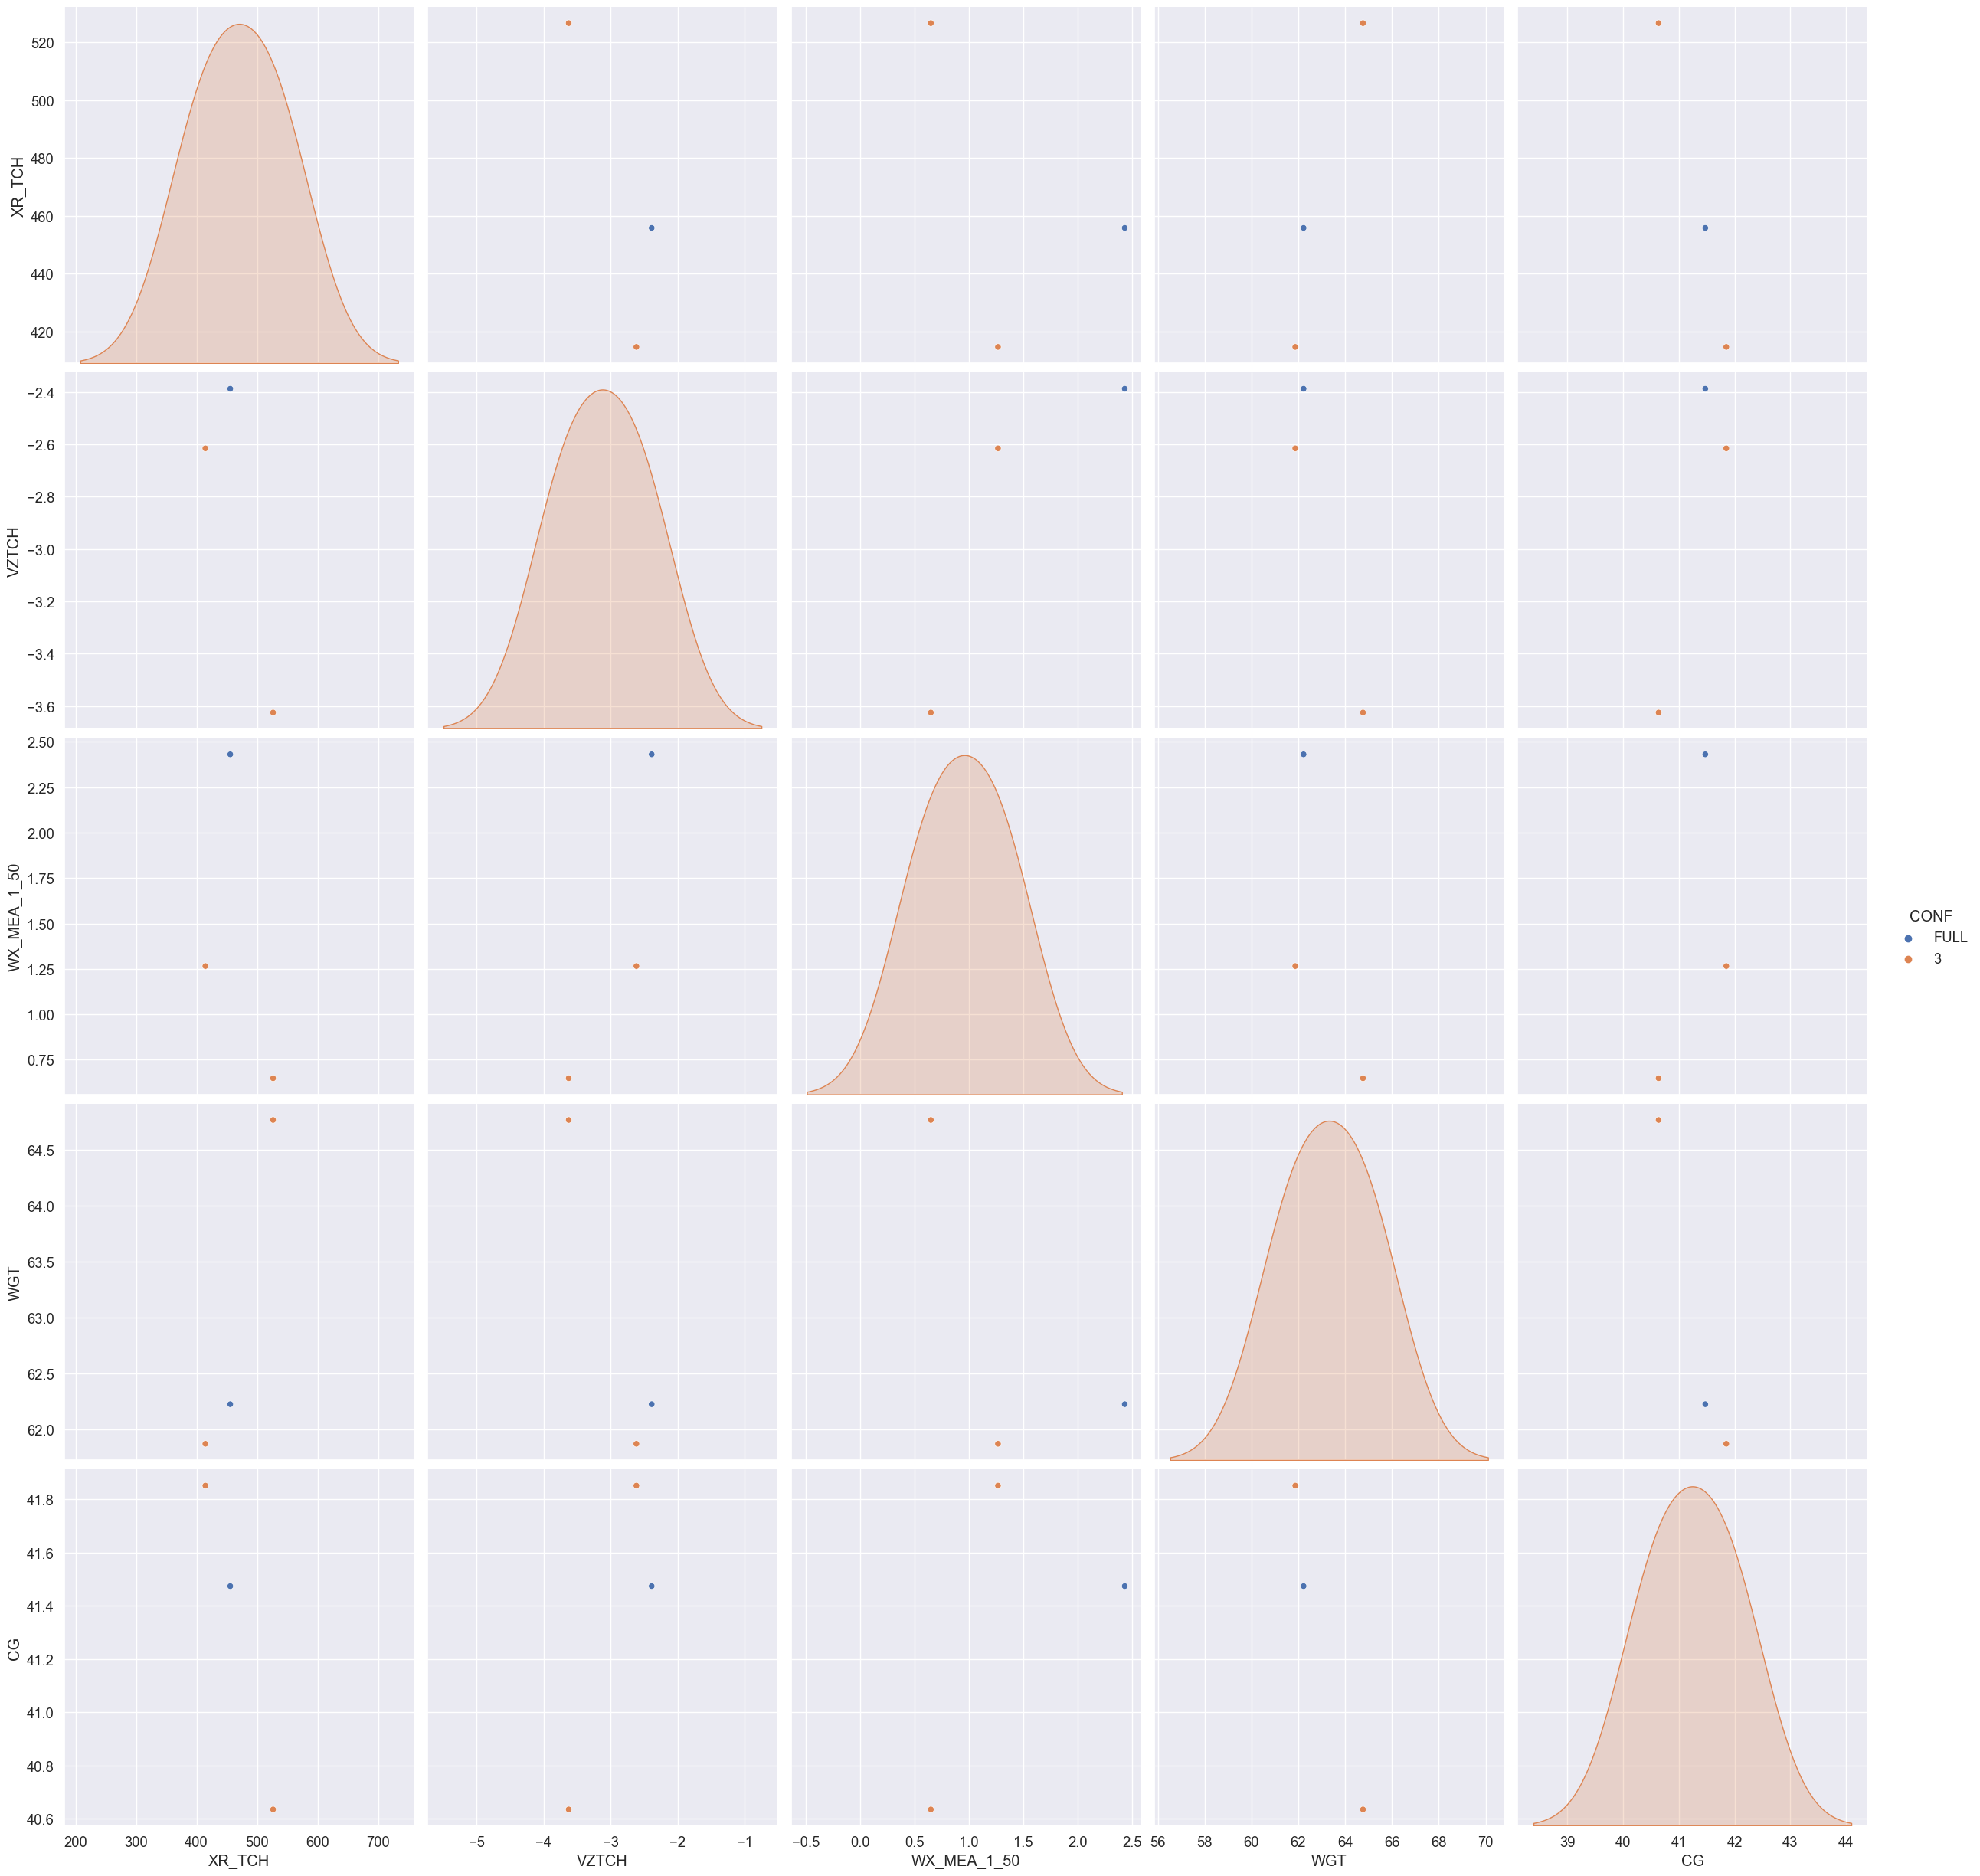

In [247]:
sns.pairplot(dataset_flare_downhill, hue="CONF",height=5)
plt.show()

In [248]:
result_XRTCH = dataset_flare_flat.groupby('CONF').agg({'XR_TCH': ['min', 'max','count','mean','std']}) 
print (result_XRTCH)
result_VZTCH = dataset_flare_flat.groupby('CONF').agg({'VZTCH': ['min', 'max','count','mean','std']}) 
print (result_VZTCH)

        XR_TCH                                       
           min       max count        mean        std
CONF                                                 
3     253.7021  490.7987    21  368.969695  59.385701
FULL  284.1517  488.9229    30  375.010843  45.525789
       VZTCH                                  
         min     max count      mean       std
CONF                                          
3    -4.6560 -1.0850    21 -3.089552  0.912254
FULL -5.0746 -1.7561    30 -3.317603  1.006426


In [249]:
result_XRTCH = dataset_flare_uphill.groupby('CONF').agg({'XR_TCH': ['min', 'max','count','mean','std']}) 
print (result_XRTCH)
result_VZTCH = dataset_flare_uphill.groupby('CONF').agg({'VZTCH': ['min', 'max','count','mean','std']}) 
print (result_VZTCH)

        XR_TCH                                       
           min       max count        mean        std
CONF                                                 
3     286.0507  341.3912     5  310.729840  21.516899
FULL  273.1220  297.0536     4  288.253975  11.319550
       VZTCH                                 
         min     max count     mean       std
CONF                                         
3    -5.3407 -2.3492     5 -3.27218  1.201463
FULL -4.9637 -4.1051     4 -4.57790  0.356797


In [250]:
result_XRTCH = dataset_flare_downhill.groupby('CONF').agg({'XR_TCH': ['min', 'max','count','mean','std']}) 
print (result_XRTCH)
result_VZTCH = dataset_flare_downhill.groupby('CONF').agg({'VZTCH': ['min', 'max','count','mean','std']}) 
print (result_VZTCH)

        XR_TCH                                     
           min       max count      mean        std
CONF                                               
3     414.6720  526.5628     2  470.6174  79.118743
FULL  455.7953  455.7953     1  455.7953        NaN
       VZTCH                                
         min     max count    mean       std
CONF                                        
3    -3.6252 -2.6152     2 -3.1202  0.714178
FULL -2.3873 -2.3873     1 -2.3873       NaN


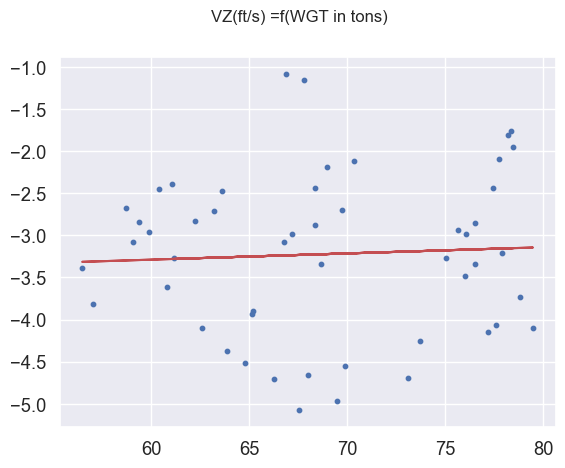

In [280]:
from sklearn.linear_model import LinearRegression


# transforming the data to include another axis
x = dataset_flare_flat['WGT'].values.reshape(-1, 1)
y = dataset_flare_flat['VZTCH'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.suptitle('VZ(ft/s) =f(WGT in tons)')
plt.show()

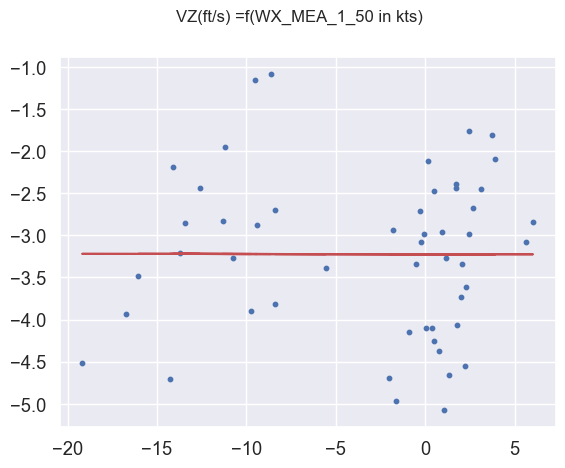

In [281]:
from sklearn.linear_model import LinearRegression


# transforming the data to include another axis
x = dataset_flare_flat['WX_MEA_1_50'].values.reshape(-1, 1)
y = dataset_flare_flat['VZTCH'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.suptitle('VZ(ft/s) =f(WX_MEA_1_50 in kts)')
plt.show()

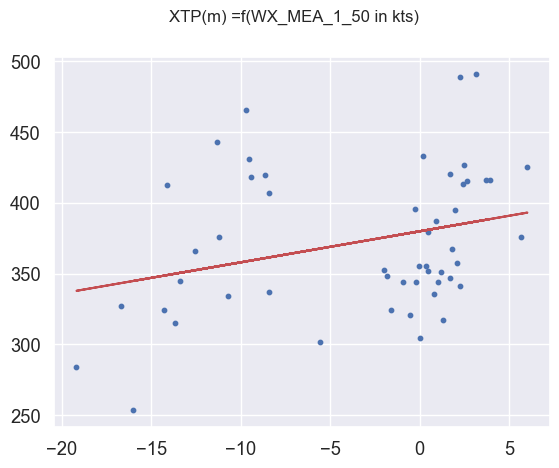

In [282]:
from sklearn.linear_model import LinearRegression


# transforming the data to include another axis
x = dataset_flare_flat['WX_MEA_1_50'].values.reshape(-1, 1)
y = dataset_flare_flat['XR_TCH'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.suptitle('XTP(m) =f(WX_MEA_1_50 in kts)')
plt.show()

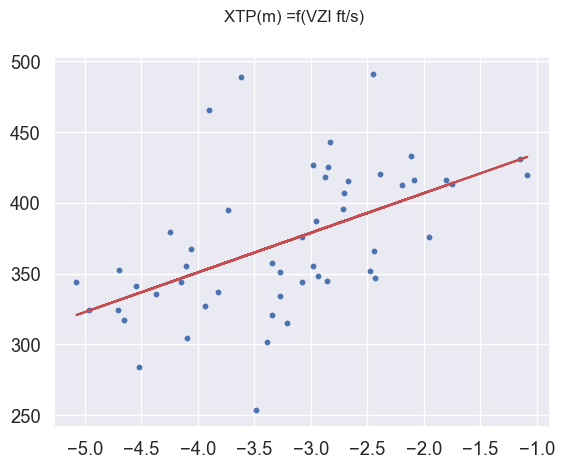

In [283]:
from sklearn.linear_model import LinearRegression


# transforming the data to include another axis
x = dataset_flare_flat['VZTCH'].values.reshape(-1, 1)
y = dataset_flare_flat['XR_TCH'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.suptitle('XTP(m) =f(VZI ft/s)')
plt.show()

In [288]:
def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return p

#use custom function to calculate p-values


In [285]:
print (list(dataset_flare_flat))

['XR_TCH', 'VZTCH', 'WX_MEA_1_50', 'RWY', 'ETAT_SPAT', 'WGT', 'CG', 'CONF']


In [286]:
df=dataset_flare_flat[['XR_TCH', 'VZTCH', 'WX_MEA_1_50','WGT', 'CG']]

In [287]:
r_pvalues(df)

XR_TCH   VZTCH WX_MEA_1_50     WGT      CG
XR_TCH          1.0  0.5277      0.2918 -0.1807 -0.1272
VZTCH        0.5277     1.0     -0.0015  0.0526 -0.2413
WX_MEA_1_50  0.2918 -0.0015         1.0 -0.1131   0.202
WGT         -0.1807  0.0526     -0.1131     1.0  0.3749
CG          -0.1272 -0.2413       0.202  0.3749     1.0

In [826]:
#landing_perfo=dataset[["AC_NB","FLT","TEST_NB","TEST","RWY","W_HDG","W_SPD","W_GUST","W_AXIS","W_LAT","WGT","CG","CONF","AP","ATHR","VSEL","ENG_CND","XR_TCH","VZTCH","YR_TCH","VY_TCH","PHI_TCH","CREW","COMMENTS"]]
landing_perfo=dataset[["AC_NB","FLT","TEST_NB","GMT_REF","RWY","WX_MEA_1_50","WY_MEA_1_50","WGT","CG","CONF","AP","ATHR","VSEL","ENG_CND","XR_TCH","VZTCH","YR_TCH","VY_TCH","PHI_TCH","DPSI_TCH","COMMENTS"]].round(1)

In [827]:
s = landing_perfo.style.set_table_styles([
                            {
                                "selector":"thead",
                                "props": [("background-color", "grey"), ("color", "white"),
                                          ("border", "3px solid black"),
                                          ("font-size", "6pt"), ("font-style", "italic")]
                            },
                            {
                                'selector': 'th', 
                                'props': [("border", "3px solid black")]
                            },
                            {
                                "selector":"th.row_heading",
                                "props": [("background-color", "white"), ("color", "BLACK"),
                                          ("border", "2px solid black"),
                                          ("font-size", "6pt"), ("font-style", "italic")]
                            },
                            {
                                            "selector" :"td",
                                            "props": [("border","1px solid black"),
                                                      ("color", "blue"),
                                                      ("background-color", "white"),('text-align','center')]
                                        }
                        ]).set_properties(color="black", border="1px solid black").format(precision=1, na_rep="")


In [828]:
s

In [832]:
stat_landing=landing_perfo[["XR_TCH","YR_TCH","VZTCH","PHI_TCH","VY_TCH","DPSI_TCH"]]


In [844]:
stat_landing.describe(percentiles=[])

XR_TCH      YR_TCH       VZTCH     PHI_TCH      VY_TCH    DPSI_TCH
count  105.000000  105.000000  105.000000  105.000000  105.000000  105.000000
mean   384.745714   -0.800952   -2.735238   -0.525714   -0.040000   -0.622857
std     66.294486    1.244719    1.074618    1.317123    0.353717    1.252479
min    205.800000   -3.700000   -5.500000   -4.900000   -0.800000   -3.400000
50%    382.500000   -0.900000   -2.800000   -0.300000   -0.100000   -0.500000
max    543.000000    4.600000    0.000000    2.600000    1.100000    2.800000